## python library

In [1]:
import pandas as pd
from skbio.diversity import beta_diversity
from skbio import DistanceMatrix
from scipy.special import factorial
from scipy.spatial.distance import pdist, squareform
import numpy as np
from scipy.optimize import fmin
from scipy.spatial.distance import canberra
from scipy.spatial.distance import dice
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import alpha_diversity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import data_processing
from sklearn.model_selection import cross_val_score,StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from skbio import DistanceMatrix
from scipy.spatial.distance import squareform, pdist
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from scipy.stats import ttest_ind
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import joblib
import torch
import torch.nn as nn
import torch.nn.functional as F

## FMT 2000

#### Donor Process

In [10]:
file_path4=r'/home/tingzhi/mingkang/donor_abundance_results2000.csv'
donor_2000=data_processing.data_process(file_path4,"donor",std=True,taxonomy=False,threshold=0.90)
donor_2000.data_proces()
donor_2000_otu=donor_2000.otu_table
donor_2000_otu.shape

(351, 53)

In [11]:
donor_2000_feature=donor_2000.features_table()
donor_2000_feature.head()

donor otu 1  donor otu 2   donor otu 3  donor otu 4  donor otu 5  \
483320  9.887141e-03     0.037142  3.628694e-03     0.000000     0.051823   
293601  5.665318e-08     0.023871  9.013006e-15     0.026022     0.000000   
793040  4.736752e-07     0.000000  1.401894e-03     0.000000     0.039163   
939462  3.088679e-02     0.000000  0.000000e+00     0.140673     0.000000   
72222   3.314077e-06     0.020649  0.000000e+00     0.023975     0.025939   

         donor otu 6  donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
483320  3.135590e-07     0.000000     0.062352  4.251648e-25  2.615523e-14   
293601  3.693821e-02     0.000000     0.025193  1.840160e-02  3.753560e-04   
793040  0.000000e+00     0.000000     0.000000  0.000000e+00  2.251651e-06   
939462  9.473091e-03     0.040619     0.063657  0.000000e+00  1.060294e-16   
72222   1.004819e-10     0.000015     0.024780  8.732793e-18  1.242322e-11   

        ...  donor menhinick  donor pielou_e  donor renyi  donor shannon  \
483320  ...        -0.520539        0.324872     0.550836       0.813217   
293601  ...        -0.676638        1.400576     1.725903       1.762942   
793040  ...         0.268739       -0.175240    -0.065257      -0.431705   
939462  ...         0.342309       -1.155099    -1.220446      -1.244387   
72222   ...        -0.508493       -0.685443    -0.062688      -0.086396   

        donor simpson  donor simpson_d  donor simpson_e  donor sobs  \
483320       0.586485        -0.586485        -0.147014    1.470067   
293601       1.499129        -1.499129         1.340666    1.147369   
793040       0.025235        -0.025235         0.193255   -0.788816   
939462      -1.210151         1.210151        -1.055146   -0.466119   
72222        0.027706        -0.027706        -0.847244    1.792764   

        donor strong  donor tsallis  
483320     -0.206968       0.586485  
293601     -1.766015       1.499129  
793040      0.481635       0.025235  
939462      0.830130      -1.210151  
72222       0.652904       0.027706  

[5 rows x 76 columns]

In [12]:
inf=donor_2000_feature.describe()
inf.head()

donor otu 1   donor otu 2   donor otu 3   donor otu 4   donor otu 5  \
count  3.510000e+02  3.510000e+02  3.510000e+02  3.510000e+02  3.510000e+02   
mean   1.083415e-02  2.068886e-02  1.696140e-02  4.600307e-02  1.828315e-02   
std    2.300602e-02  3.126209e-02  2.854813e-02  4.581121e-02  2.342225e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.050621e-19  3.265818e-57  2.786625e-12  1.387766e-07  7.970415e-16   

        donor otu 6   donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
count  3.510000e+02  3.510000e+02   351.000000  3.510000e+02  3.510000e+02   
mean   1.013768e-02  1.263228e-02     0.028148  3.973768e-03  4.200166e-03   
std    2.340170e-02  2.270054e-02     0.027369  1.335674e-02  1.241927e-02   
min    0.000000e+00  0.000000e+00     0.000000  0.000000e+00  0.000000e+00   
25%    1.166656e-26  7.824054e-25     0.000003  1.755808e-32  4.728730e-28   

       ...  donor menhinick  donor pielou_e   donor renyi  donor shannon  \
count  ...     3.510000e+02    3.510000e+02  3.510000e+02   3.510000e+02   
mean   ...     1.619471e-16   -1.518254e-16  8.097353e-17  -5.718756e-16   
std    ...     1.001428e+00    1.001428e+00  1.001428e+00   1.001428e+00   
min    ...    -3.371521e+00   -2.987612e+00 -2.896470e+00  -3.130480e+00   
25%    ...    -6.412412e-01   -6.625093e-01 -6.530404e-01  -6.532613e-01   

       donor simpson  donor simpson_d  donor simpson_e    donor sobs  \
count   3.510000e+02     3.510000e+02     3.510000e+02  3.510000e+02   
mean    5.162063e-16     5.566930e-16     3.238941e-16  4.959629e-16   
std     1.001428e+00     1.001428e+00     1.001428e+00  1.001428e+00   
min    -3.525991e+00    -1.757156e+00    -2.403438e+00 -1.434211e+00   
25%    -5.713363e-01    -7.122998e-01    -6.701487e-01 -7.888162e-01   

       donor strong  donor tsallis  
count  3.510000e+02   3.510000e+02  
mean  -5.870581e-16   5.162063e-16  
std    1.001428e+00   1.001428e+00  
min   -2.958859e+00  -3.525991e+00  
25%   -6.604829e-01  -5.713363e-01  

[5 rows x 76 columns]

In [13]:
top_10_values=inf.loc['mean',:].nlargest(10)
print(top_10_values)

donor otu 26    0.067963
donor otu 43    0.052007
donor otu 16    0.049650
donor otu 19    0.048071
donor otu 40    0.046440
donor otu 4     0.046003
donor otu 51    0.042188
donor otu 32    0.041314
donor otu 38    0.039216
donor otu 36    0.038426
Name: mean, dtype: float64


In [14]:
min_10_values=inf.loc['mean',"donor otu 1":"donor otu 53"].nsmallest(10)
print(min_10_values)

donor otu 12    0.000000
donor otu 50    0.000071
donor otu 35    0.000387
donor otu 22    0.000704
donor otu 15    0.000794
donor otu 28    0.001399
donor otu 44    0.001659
donor otu 23    0.002145
donor otu 45    0.002217
donor otu 27    0.003364
Name: mean, dtype: float64


In [15]:
donor_columns = [f'donor otu {i}' for i in range(1, 54)]
donor_2000_feature[donor_columns]*=10
donor_2000_feature.head()

donor otu 1  donor otu 2   donor otu 3  donor otu 4  donor otu 5  \
483320  9.887141e-02     0.371420  3.628694e-02     0.000000     0.518235   
293601  5.665318e-07     0.238708  9.013006e-14     0.260215     0.000000   
793040  4.736752e-06     0.000000  1.401894e-02     0.000000     0.391628   
939462  3.088679e-01     0.000000  0.000000e+00     1.406735     0.000000   
72222   3.314077e-05     0.206486  0.000000e+00     0.239752     0.259387   

         donor otu 6  donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
483320  3.135590e-06     0.000000     0.623519  4.251648e-24  2.615523e-13   
293601  3.693821e-01     0.000000     0.251927  1.840160e-01  3.753560e-03   
793040  0.000000e+00     0.000000     0.000000  0.000000e+00  2.251651e-05   
939462  9.473091e-02     0.406186     0.636565  0.000000e+00  1.060294e-15   
72222   1.004819e-09     0.000148     0.247800  8.732793e-17  1.242322e-10   

        ...  donor menhinick  donor pielou_e  donor renyi  donor shannon  \
483320  ...        -0.520539        0.324872     0.550836       0.813217   
293601  ...        -0.676638        1.400576     1.725903       1.762942   
793040  ...         0.268739       -0.175240    -0.065257      -0.431705   
939462  ...         0.342309       -1.155099    -1.220446      -1.244387   
72222   ...        -0.508493       -0.685443    -0.062688      -0.086396   

        donor simpson  donor simpson_d  donor simpson_e  donor sobs  \
483320       0.586485        -0.586485        -0.147014    1.470067   
293601       1.499129        -1.499129         1.340666    1.147369   
793040       0.025235        -0.025235         0.193255   -0.788816   
939462      -1.210151         1.210151        -1.055146   -0.466119   
72222        0.027706        -0.027706        -0.847244    1.792764   

        donor strong  donor tsallis  
483320     -0.206968       0.586485  
293601     -1.766015       1.499129  
793040      0.481635       0.025235  
939462      0.830130      -1.210151  
72222       0.652904       0.027706  

[5 rows x 76 columns]

#### Donor PCA

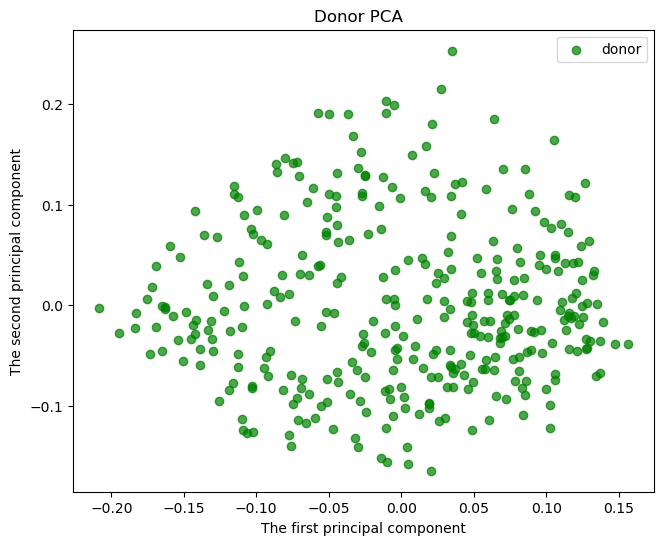

In [16]:
pca_donor_2000=PCA(n_components=2)
pca_donor_2000_re=pca_donor_2000.fit_transform(donor_2000_otu)
plt.figure(figsize=(7.5,6))
plt.scatter(pca_donor_2000_re[:,0],pca_donor_2000_re[:,1],color="green",alpha=0.7,label="donor")
plt.title("Donor PCA  ")
plt.legend(loc="best")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid(False)
plt.show()

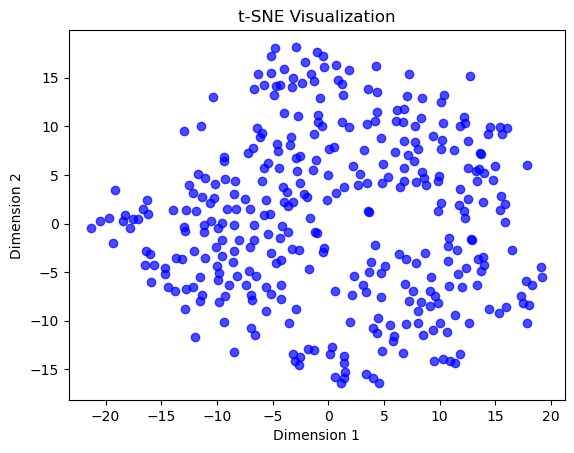

In [17]:
from sklearn.manifold import TSNE


tsne=TSNE(n_components=2,perplexity=28,learning_rate=600,random_state=42)
X_embedded=tsne.fit_transform(donor_2000_otu)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c="blue",alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


#### Recipient data process

In [18]:
file_path5=r'/home/tingzhi/mingkang/recipient_disease_state_results2000.csv'
recipient_2000=data_processing.data_process(file_path5,"recipient",taxonomy=False,threshold=0.9,frac=0.2)
recipient_2000.data_proces()
recipient_2000_otu=recipient_2000.otu_table
recipient_2000_otu.shape

(208, 53)

In [19]:
recipient_2000_feature=recipient_2000.features_table()
recipient_2000_feature.shape

(208, 76)

In [20]:
recipient_columns = [f'recipient otu {i}' for i in range(1, 54)]
recipient_2000_feature[recipient_columns]*=10
recipient_2000_feature.head()

recipient otu 1  recipient otu 2  recipient otu 3  recipient otu 4  \
509743         0.000000              0.0         0.000000              0.0   
203139         1.498096              0.0         0.000000              0.0   
654117         1.252354              0.0         0.432639              0.0   
962892         0.000000              0.0         0.000000              0.0   
373220         0.000000              0.0         0.000000              0.0   

        recipient otu 5  recipient otu 6  recipient otu 7  recipient otu 8  \
509743         0.000000         0.000000              0.0         0.000000   
203139         0.000000         0.000000              0.0         0.000000   
654117         1.803152         0.000000              0.0         1.340041   
962892         0.000000         0.000000              0.0         0.000000   
373220         0.000000         1.646625              0.0         0.000000   

        recipient otu 9  recipient otu 10  ...  recipient menhinick  \
509743     0.000000e+00          2.038202  ...            -0.871004   
203139     0.000000e+00          0.000000  ...             0.979705   
654117     4.364622e-11          0.000000  ...             1.391004   
962892     0.000000e+00          1.211594  ...            -1.127669   
373220     0.000000e+00          0.000000  ...            -0.360443   

        recipient pielou_e  recipient renyi  recipient shannon  \
509743            0.758973        -1.026841          -1.028729   
203139           -0.391373         0.513754           0.444366   
654117           -0.749494         0.561696           0.606733   
962892            0.952844         1.508202           1.556094   
373220            1.554904        -0.365301          -0.427329   

        recipient simpson  recipient simpson_d  recipient simpson_e  \
509743          -0.869863             0.869863             1.001774   
203139           0.579012            -0.579012            -0.453270   
654117           0.610323            -0.610323            -0.990000   
962892           1.111638            -1.111638             0.219523   
373220          -0.127825             0.127825             1.540808   

        recipient sobs  recipient strong  recipient tsallis  
509743       -1.229155         -1.134207          -0.869863  
203139        0.375432          0.473199           0.579012  
654117        0.910295          1.084564           0.610323  
962892        1.088582         -0.334420           1.111638  
373220       -1.050868         -1.517896          -0.127825  

[5 rows x 76 columns]

#### Recipient PCA

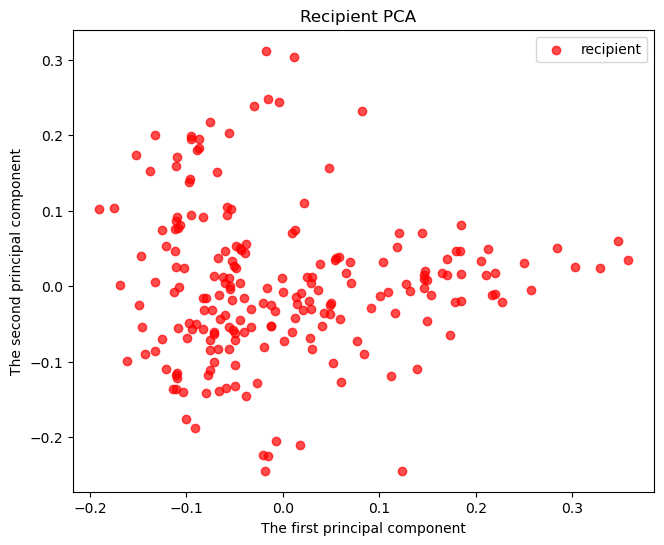

In [21]:
pca_recipient_2000=PCA(n_components=2)
pca_recipient_2000_re=pca_recipient_2000.fit_transform(recipient_2000_otu)
plt.figure(figsize=(7.5,6))
plt.scatter(pca_recipient_2000_re[:,0],pca_recipient_2000_re[:,1],color="red",alpha=0.7,label="recipient")
plt.title("Recipient PCA  ")
plt.legend(loc="best")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid(False)
plt.show()

In [22]:
recipient_2000_feature.head()

recipient otu 1  recipient otu 2  recipient otu 3  recipient otu 4  \
509743         0.000000              0.0         0.000000              0.0   
203139         1.498096              0.0         0.000000              0.0   
654117         1.252354              0.0         0.432639              0.0   
962892         0.000000              0.0         0.000000              0.0   
373220         0.000000              0.0         0.000000              0.0   

        recipient otu 5  recipient otu 6  recipient otu 7  recipient otu 8  \
509743         0.000000         0.000000              0.0         0.000000   
203139         0.000000         0.000000              0.0         0.000000   
654117         1.803152         0.000000              0.0         1.340041   
962892         0.000000         0.000000              0.0         0.000000   
373220         0.000000         1.646625              0.0         0.000000   

        recipient otu 9  recipient otu 10  ...  recipient menhinick  \
509743     0.000000e+00          2.038202  ...            -0.871004   
203139     0.000000e+00          0.000000  ...             0.979705   
654117     4.364622e-11          0.000000  ...             1.391004   
962892     0.000000e+00          1.211594  ...            -1.127669   
373220     0.000000e+00          0.000000  ...            -0.360443   

        recipient pielou_e  recipient renyi  recipient shannon  \
509743            0.758973        -1.026841          -1.028729   
203139           -0.391373         0.513754           0.444366   
654117           -0.749494         0.561696           0.606733   
962892            0.952844         1.508202           1.556094   
373220            1.554904        -0.365301          -0.427329   

        recipient simpson  recipient simpson_d  recipient simpson_e  \
509743          -0.869863             0.869863             1.001774   
203139           0.579012            -0.579012            -0.453270   
654117           0.610323            -0.610323            -0.990000   
962892           1.111638            -1.111638             0.219523   
373220          -0.127825             0.127825             1.540808   

        recipient sobs  recipient strong  recipient tsallis  
509743       -1.229155         -1.134207          -0.869863  
203139        0.375432          0.473199           0.579012  
654117        0.910295          1.084564           0.610323  
962892        1.088582         -0.334420           1.111638  
373220       -1.050868         -1.517896          -0.127825  

[5 rows x 76 columns]

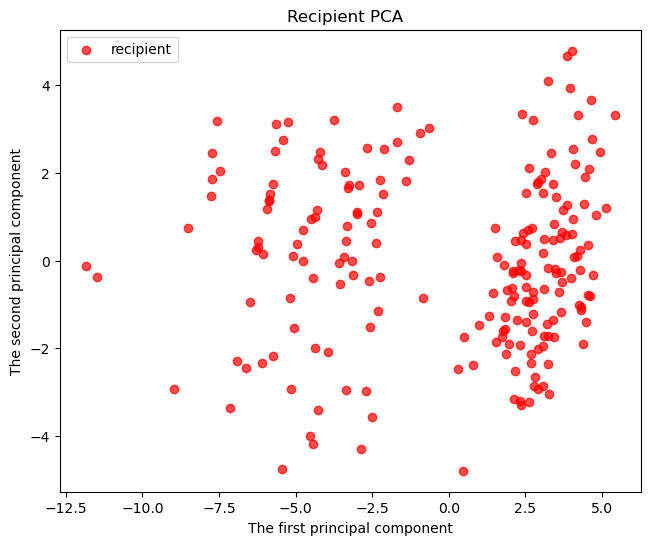

In [23]:
pca_recipient_2000=PCA(n_components=2)
pca_recipient_2000_re=pca_recipient_2000.fit_transform(recipient_2000_feature)
plt.figure(figsize=(7.5,6))
plt.scatter(pca_recipient_2000_re[:,0],pca_recipient_2000_re[:,1],color="red",alpha=0.7,label="recipient")
plt.title("Recipient PCA  ")
plt.legend(loc="best")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid(False)
plt.show()

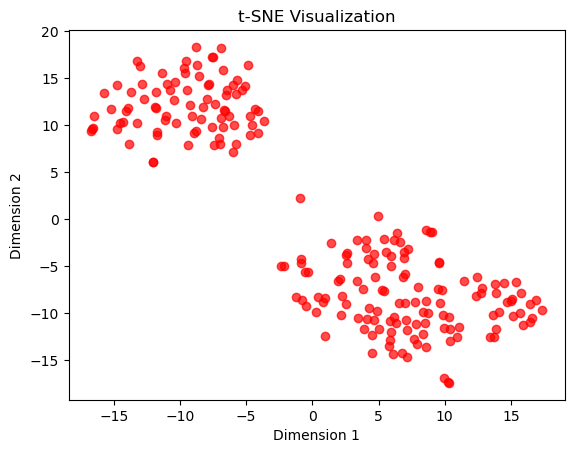

In [24]:
tsne=TSNE(n_components=2,perplexity=30,learning_rate=350,random_state=42)
X_embedded=tsne.fit_transform(recipient_2000_feature)
plt.scatter(X_embedded[:,0],X_embedded[:,1],c="red",alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [25]:
X_embedded

array([[ -5.9919105 ,  14.246704  ],
       [  5.4176073 ,  -7.67202   ],
       [  5.044356  , -11.684024  ],
       [ 15.684744  , -10.04416   ],
       [ -4.0968103 ,  11.527505  ],
       [  5.947352  ,  -5.000107  ],
       [ 14.472856  ,  -6.8115077 ],
       [  9.583148  ,  -4.666953  ],
       [  4.074988  ,  -2.2781377 ],
       [  6.907195  ,  -4.165159  ],
       [ -2.1738248 ,  -4.9523544 ],
       [ -8.7006645 ,  16.331772  ],
       [  7.9448905 ,  -7.225106  ],
       [ 13.84765   , -11.742529  ],
       [  9.011259  ,  -1.363048  ],
       [-10.73226   ,  13.752141  ],
       [ 10.947205  , -12.5338125 ],
       [  6.5885906 ,  -2.4717224 ],
       [-11.096106  ,  10.5523    ],
       [  0.9860831 , -12.407023  ],
       [ -1.2701797 ,  -8.318645  ],
       [-16.519514  ,  10.972429  ],
       [ -8.754533  ,   9.38055   ],
       [ -5.6642604 ,  14.832342  ],
       [  3.3713691 ,  -6.627993  ],
       [ -0.44768777,  -9.290662  ],
       [  2.5393074 ,  -3.8676805 ],
 

#### Beta Diversity

In [26]:
donor_2000_otu.shape

(351, 53)

In [27]:
recipient_2000_otu.shape

(208, 53)

In [28]:
import numpy as np
from skbio.diversity import beta_diversity

def calculate_all_donor_recipient_bray_curtis(donor_data, recipient_data):
    """
    计算所有 donor 样本与所有 recipient 样本的 Bray-Curtis dissimilarity。
    返回每个 donor 样本与所有 recipient 样本的 dissimilarity 的第一行。
    
    参数：
    donor_data (numpy.ndarray): donor 样本的计数数据（二维数组，行表示样本，列表示特征）。
    recipient_data (numpy.ndarray): recipient 样本的计数数据（二维数组，行表示样本，列表示特征）。
    
    返回：
    numpy.ndarray: 一个二维数组，表示所有 donor 样本与所有 recipient 样本之间的 Bray-Curtis dissimilarity（第一行）。
    """
    # 初始化一个空列表，用于存储所有 donor 与 recipient 的 Bray-Curtis dissimilarity 第一行
    all_dissimilarities = []

    # 遍历每个 donor 样本
    for donor_index in range(donor_data.shape[0]):
        # 提取当前的 donor 样本
        selected_donor = donor_data[donor_index, :]

        # 计算该 donor 样本与所有 recipient 样本之间的 Bray-Curtis dissimilarity
        donor_vs_recipient = np.array([beta_diversity('braycurtis', np.vstack([selected_donor, recipient]), ids=[f"donor_{donor_index}", f"recipient_{i}"])[0, 1] for i, recipient in enumerate(recipient_data)])

        # 提取当前 donor 的 dissimilarity 第一行
        all_dissimilarities.append(donor_vs_recipient)

    # 将所有 donor 样本与 recipient 样本的 dissimilarities 转换为 numpy 数组
    all_dissimilarities = np.array(all_dissimilarities)

    return all_dissimilarities


#### Add label

In [29]:
file_path6=r'/home/tingzhi/mingkang/FMT_Cdiff_abundance_results2000.csv'
label_2000=data_processing.label_table(file_path6,thres=0.001)
label_2000.label_process()
label_table_2000=label_2000.get_label()

In [30]:
label_table_2000.shape

(2000, 1731)

#### Modify Recipient

In [31]:
recipient_sum=label_table_2000[label_table_2000>0].sum(axis=1)
recipient_sum=recipient_sum.reset_index()

In [32]:
recipient_sum.columns=['index','sum']

In [33]:
recipient_sum.head(5)

index    sum
0  712716  600.0
1  644425  612.0
2  847552  603.0
3  453853  610.0
4  588988    1.0

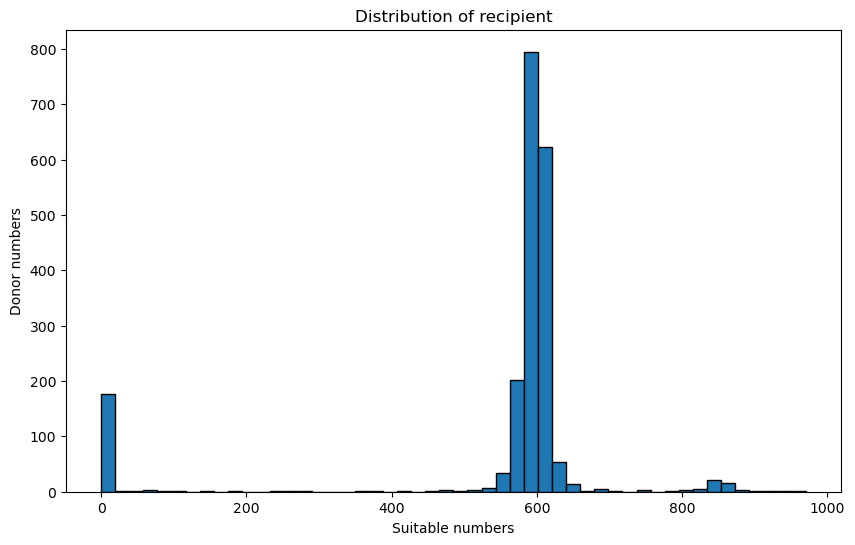

In [34]:
plt.figure(figsize=(10,6))
plt.hist(recipient_sum['sum'],bins=50,edgecolor="black")
plt.title("Distribution of recipient")
plt.xlabel("Suitable numbers")
plt.ylabel("Donor numbers")
plt.show()

#### Modify Donor

In [35]:
donor_sum=label_table_2000[label_table_2000>0].sum()
donor_sum=donor_sum.reset_index()
donor_sum.columns=['index','sum']
donor_sum.set_index("index",inplace=True)
donor_sum.head()

sum
index         
650607    54.0
483320     0.0
293601     0.0
793040  1811.0
939462  1810.0

In [36]:
donor_sum=donor_sum.loc[donor_sum.index.intersection(donor_2000_otu.index)]
donor_sum.head()

sum
483320     0.0
293601     0.0
793040  1811.0
939462  1810.0
72222      0.0

In [37]:
def donor_label_2000(label):
    if label>1000:
        return "super donor"
    if label<800:
        return "low donor"
    else:
        return "moderate donor"

donor_sum["size"]=donor_sum['sum'].map(donor_label_2000)
donor_sum["size"].value_counts()


size
low donor         230
super donor       120
moderate donor      1
Name: count, dtype: int64

In [38]:
donor_sum['size'].value_counts()


size
low donor         230
super donor       120
moderate donor      1
Name: count, dtype: int64

In [39]:
# donor_moderate=donor_sum[donor_sum['size']=='moderate donor']

# 假设 df 是你的 DataFrame
low_donor_samples = donor_sum[donor_sum['size'] == 'low donor'].sample(frac=0.4, random_state=42)
super_donor_samples = donor_sum[donor_sum['size'] == 'super donor'].sample(frac=0.80, random_state=42)

# 合并两个抽样数据
donor_moderate = pd.concat([low_donor_samples, super_donor_samples])

# 查看结果

donor_moderate.head()


sum       size
973794   1.0  low donor
983373   0.0  low donor
255516  18.0  low donor
980669   0.0  low donor
771032  27.0  low donor

In [40]:
moderate_index=donor_moderate.index
moderate_index
moderate_donor=donor_2000_otu.loc[moderate_index,:]
print(moderate_donor.shape)
moderate_donor.head()

(188, 53)


donor otu 1  donor otu 2   donor otu 3  donor otu 4  donor otu 5  \
973794  0.000000e+00     0.022652  0.000000e+00     0.064186     0.000000   
983373  9.958410e-07     0.033925  3.680706e-10     0.012166     0.000000   
255516  1.105738e-23     0.012825  0.000000e+00     0.027686     0.015491   
980669  3.235293e-03     0.044009  2.314650e-08     0.061145     0.000000   
771032  1.122476e-08     0.060111  9.707900e-08     0.010374     0.036947   

         donor otu 6   donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
973794  1.408854e-34  0.000000e+00     0.000000  1.477025e-10  7.422995e-19   
983373  0.000000e+00  1.415101e-02     0.018268  5.486889e-07  2.196708e-12   
255516  1.180699e-02  1.247360e-17     0.013213  9.586695e-08  7.571309e-03   
980669  4.187098e-09  3.323845e-02     0.054489  1.001863e-11  0.000000e+00   
771032  2.827426e-10  2.094916e-05     0.032077  2.275289e-13  1.389443e-17   

        ...  donor otu 44  donor otu 45  donor otu 46  donor otu 47  \
973794  ...  6.551930e-23  3.730434e-21  4.393201e-30  1.764855e-21   
983373  ...  5.980307e-03  1.168380e-02  0.000000e+00  2.676501e-03   
255516  ...  5.882744e-26  1.388981e-14  1.834739e-02  1.381534e-02   
980669  ...  0.000000e+00  0.000000e+00  2.074796e-02  1.001863e-07   
771032  ...  2.451245e-15  3.664732e-21  1.359106e-06  4.103362e-03   

        donor otu 48  donor otu 49  donor otu 50  donor otu 51  donor otu 52  \
973794      0.000000  2.995709e-20  1.526259e-41      0.007898  1.139960e-09   
983373      0.047144  2.436109e-02  1.161815e-12      0.000000  4.735126e-12   
255516      0.018759  2.799714e-02  3.524200e-36      0.075132  1.514262e-12   
980669      0.027152  0.000000e+00  0.000000e+00      0.000000  4.850400e-17   
771032      0.031648  7.960781e-05  1.304499e-38      0.001534  8.373063e-20   

        donor otu 53  
973794      0.000467  
983373      0.017259  
255516      0.000226  
980669      0.041092  
771032      0.000146  

[5 rows x 53 columns]

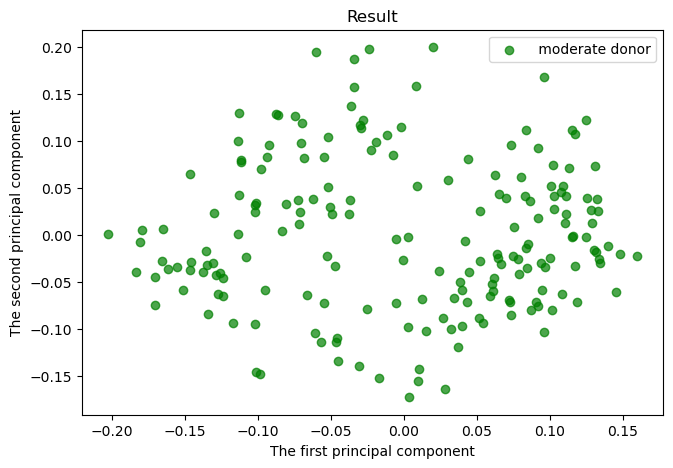

In [41]:
##### Moderate Donor PCA
pca_moderate_donor_2000=PCA(n_components=2)
pca_moderate_2000_re=pca_donor_2000.fit_transform(moderate_donor)
plt.figure(figsize=(7.5,5))
plt.scatter(pca_moderate_2000_re[:,0],pca_moderate_2000_re[:,1],color="green",alpha=0.7,label=" moderate donor")
plt.title("Result")
plt.legend(loc="best")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid(False)
plt.show()


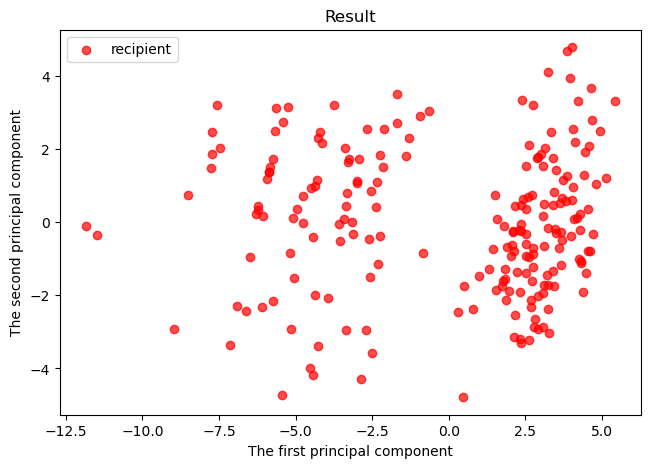

In [42]:

plt.figure(figsize=(7.5,5))

plt.scatter(pca_recipient_2000_re[:,0],pca_recipient_2000_re[:,1],color="red",alpha=0.7,label="recipient")
plt.title("Result")
plt.legend(loc="best")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid(False)
plt.show()


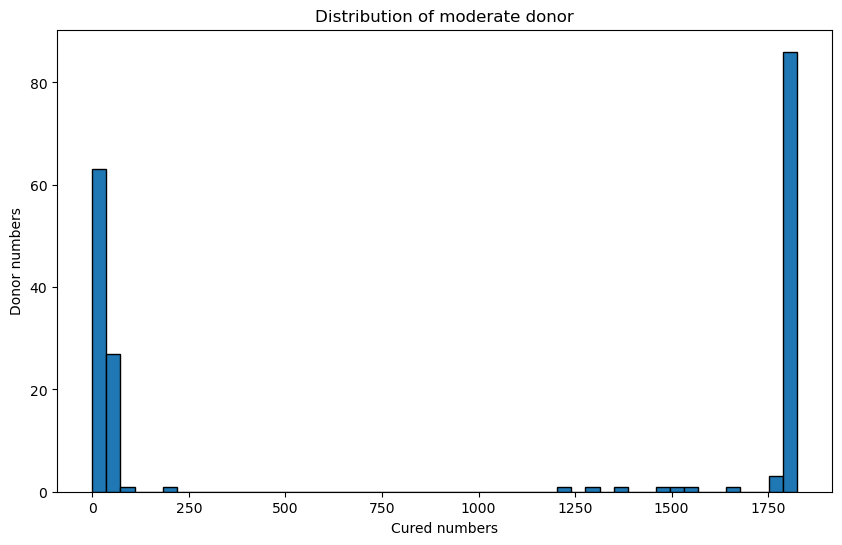

In [43]:
plt.figure(figsize=(10,6))
plt.hist(donor_moderate['sum'],bins=50,edgecolor="black")
plt.title("Distribution of moderate donor")
plt.xlabel("Cured numbers")
plt.ylabel("Donor numbers")
plt.show()


In [44]:
donor_moderate.shape
train_donor_2000=donor_moderate.sample(frac=0.8,random_state=42)

In [45]:
train_donor_2000.head()

sum         size
711396  1812.0  super donor
133477  1800.0  super donor
834983    57.0    low donor
182218    58.0    low donor
40948      0.0    low donor

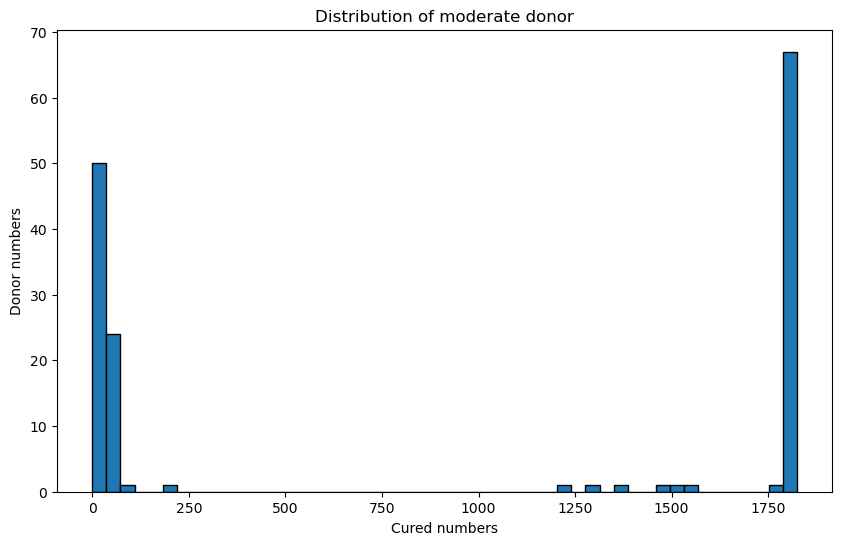

In [46]:
plt.figure(figsize=(10,6))
plt.hist(train_donor_2000['sum'],bins=50,edgecolor="black")
plt.title("Distribution of moderate donor")
plt.xlabel("Cured numbers")
plt.ylabel("Donor numbers")
plt.show()


In [47]:
test_donor_2000=donor_moderate.drop(train_donor_2000.index)
test_donor_2000.head()

sum       size
983373   0.0  low donor
72261    1.0  low donor
793818   1.0  low donor
190709  61.0  low donor
77126    0.0  low donor

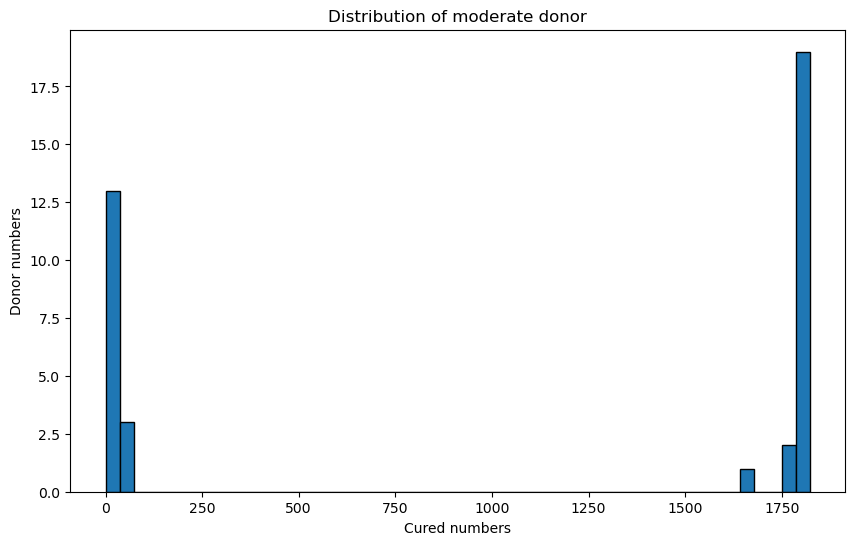

In [48]:
plt.figure(figsize=(10,6))
plt.hist(test_donor_2000['sum'],bins=50,edgecolor="black")
plt.title("Distribution of moderate donor")
plt.xlabel("Cured numbers")
plt.ylabel("Donor numbers")
plt.show()

In [49]:
donor_sum=label_table_2000[label_table_2000>0].sum()
donor_sum=donor_sum.reset_index()

In [50]:
donor_sum.columns=['index','sum']
donor_sum

index     sum
0     650607    54.0
1     483320     0.0
2     293601     0.0
3     793040  1811.0
4     939462  1810.0
...      ...     ...
1726   44125     0.0
1727  880722  1811.0
1728  253713  1809.0
1729  955912    72.0
1730  808128  1796.0

[1731 rows x 2 columns]

In [51]:
# moderate_donor=donor_2000_otu.sample(frac=0.12,random_state=42)
# moderate_donor.shape

#### Moderate Donor vs Recipient

In [52]:
keep_donor_tr=donor_2000_feature.loc[donor_2000_feature.index.intersection(train_donor_2000.index)]
keep_donor_tr.shape

(150, 76)

In [53]:
keep_donor_tr.head()

donor otu 1  donor otu 2   donor otu 3  donor otu 4  donor otu 5  \
793040  4.736752e-06     0.000000  1.401894e-02     0.000000     0.391628   
142943  9.418640e-01     0.002124  6.867434e-01     0.000000     0.133736   
255516  1.105738e-22     0.128248  0.000000e+00     0.276856     0.154914   
139775  3.733956e-02     0.000000  7.121504e-01     0.829114     0.116434   
771032  1.122476e-07     0.601111  9.707900e-07     0.103740     0.369473   

         donor otu 6   donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
793040  0.000000e+00  0.000000e+00     0.000000  0.000000e+00  2.251651e-05   
142943  0.000000e+00  0.000000e+00     1.135481  1.574797e-15  2.184718e-20   
255516  1.180699e-01  1.247360e-16     0.132128  9.586695e-07  7.571309e-02   
139775  0.000000e+00  2.809695e-01     0.531208  7.248065e-27  3.240920e-31   
771032  2.827426e-09  2.094916e-04     0.320769  2.275289e-12  1.389443e-16   

        ...  donor menhinick  donor pielou_e  donor renyi  donor shannon  \
793040  ...         0.268739       -0.175240    -0.065257      -0.431705   
142943  ...        -0.436841        0.943107     0.673314       0.863450   
255516  ...         0.858897        0.516578     1.196209       1.489775   
139775  ...        -0.625931        0.031794     0.808048       0.623724   
771032  ...         0.932130       -0.923227    -0.222096      -0.140606   

        donor simpson  donor simpson_d  donor simpson_e  donor sobs  \
793040       0.025235        -0.025235         0.193255   -0.788816   
142943       0.690850        -0.690850         0.701469   -0.143421   
255516       1.111469        -1.111469        -0.087021    3.083554   
139775       0.803036        -0.803036        -0.008374    1.792764   
771032      -0.127840         0.127840        -1.187762    2.438159   

        donor strong  donor tsallis  
793040      0.481635       0.025235  
142943     -0.712197       0.690850  
255516     -0.354087       1.111469  
139775      0.396839       0.803036  
771032      1.140095      -0.127840  

[5 rows x 76 columns]

In [54]:
keep_donor_te=donor_2000_feature.loc[donor_2000_feature.index.intersection(test_donor_2000.index)]
keep_donor_te.shape

(38, 76)

In [55]:
keep_donor_te.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4   donor otu 5  \
249291  0.000000e+00     0.420684     0.000000     0.772294  0.000000e+00   
68316   0.000000e+00     0.000257     0.001170     0.289793  6.203640e-02   
793307  1.635292e-01     0.760412     0.178354     0.701921  2.477500e-09   
94617   0.000000e+00     0.000000     0.000590     0.290963  5.218883e-05   
169399  3.515643e-09     1.429246     0.587533     0.640723  5.108301e-09   

         donor otu 6   donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
249291  1.357879e-04  1.559497e-11     0.776906  0.000000e+00  2.279151e-01   
68316   4.475798e-05  0.000000e+00     0.411502  0.000000e+00  4.410115e-10   
793307  1.026668e-29  3.484127e-01     0.000000  4.342399e-02  2.072617e-30   
94617   0.000000e+00  8.281200e-02     0.005283  2.740910e-16  9.401958e-10   
169399  4.730782e-17  6.193204e-01     0.339842  0.000000e+00  0.000000e+00   

        ...  donor menhinick  donor pielou_e  donor renyi  donor shannon  \
249291  ...         0.437553        0.615598     0.459160       0.433151   
68316   ...         1.281866       -0.264876    -0.049007      -0.179547   
793307  ...        -0.618153        0.139368     0.038021      -0.018023   
94617   ...         1.081525       -1.586845    -1.162692      -1.254439   
169399  ...         1.679454       -1.735013    -1.427025      -1.793791   

        donor simpson  donor simpson_d  donor simpson_e  donor sobs  \
249291       0.506851        -0.506851         0.616528   -0.466119   
68316        0.040849        -0.040849        -0.229235    0.179276   
793307       0.123704        -0.123704         0.148891   -0.466119   
94617       -1.142113         1.142113        -1.451886    0.824671   
169399      -1.459376         1.459376        -1.228067   -0.466119   

        donor strong  donor tsallis  
249291     -0.449735       0.506851  
68316       0.321404       0.040849  
793307     -0.077221       0.123704  
94617       1.540708      -1.142113  
169399      1.835893      -1.459376  

[5 rows x 76 columns]

In [56]:
donor_2000.feature=keep_donor_tr
train_donor=donor_2000.combined_table(recipient_2000_feature)
train_donor=label_2000.add_label(train_donor)

In [57]:
train_donor.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   recipient shannon  recipient simpson  recipient simpson_d  \
0          -1.028729          -0.869863             0.869863   
1           0.444366           0.579012            -0.579012   
2           0.606733           0.610323            -0.610323   
3           1.556094           1.111638            -1.111638   
4          -0.427329          -0.127825             0.127825   

   recipient simpson_e  recipient sobs  recipient strong  recipient tsallis  \
0             1.001774       -1.229155         -1.134207          -0.869863   
1            -0.453270        0.375432          0.473199           0.579012   
2            -0.990000        0.910295          1.084564           0.610323   
3             0.219523        1.088582         -0.334420           1.111638   
4             1.540808       -1.050868         -1.517896          -0.127825   

    donor  recipient  label  
0  793040     509743    1.0  
1  793040     203139    1.0  
2  793040     654117    1.0  
3  793040     962892    1.0  
4  793040     373220    1.0  

[5 rows x 155 columns]

In [58]:
train_donor=train_donor.dropna()
train_donor.shape

(31146, 155)

In [59]:
train_donor=train_donor.reset_index(drop=True)
train_donor.index

RangeIndex(start=0, stop=31146, step=1)

In [60]:
train_donor.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   recipient shannon  recipient simpson  recipient simpson_d  \
0          -1.028729          -0.869863             0.869863   
1           0.444366           0.579012            -0.579012   
2           0.606733           0.610323            -0.610323   
3           1.556094           1.111638            -1.111638   
4          -0.427329          -0.127825             0.127825   

   recipient simpson_e  recipient sobs  recipient strong  recipient tsallis  \
0             1.001774       -1.229155         -1.134207          -0.869863   
1            -0.453270        0.375432          0.473199           0.579012   
2            -0.990000        0.910295          1.084564           0.610323   
3             0.219523        1.088582         -0.334420           1.111638   
4             1.540808       -1.050868         -1.517896          -0.127825   

    donor  recipient  label  
0  793040     509743    1.0  
1  793040     203139    1.0  
2  793040     654117    1.0  
3  793040     962892    1.0  
4  793040     373220    1.0  

[5 rows x 155 columns]

In [61]:
recipient_name=train_donor['recipient'].drop_duplicates().reset_index()
recipient_name=recipient_name.drop(columns="index")
recipient_name.shape

(208, 1)

In [62]:
donor_name=train_donor['donor'].drop_duplicates().reset_index()
donor_name=donor_name.drop(columns='index')
donor_name.shape

(150, 1)

In [63]:
donor_name.head()

donor
0  793040
1  142943
2  255516
3  139775
4  771032

In [64]:
moderate_donor_train=donor_2000_otu.loc[donor_name['donor'],:]
moderate_donor_train.shape

(150, 53)

In [65]:
from beta_diversity_s import BetaDiversityCalculus
train_beta_matrix=BetaDiversityCalculus(moderate_donor_train,recipient_2000_otu,train_donor)
train_beta_matrix.calculate_beta_diversity()
train_donor=train_beta_matrix.getData()

In [66]:
train_donor.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   correlation  chebyshev  canberra  cityblock   jaccard  bray curtis  \
0     1.039291   1.164905 -0.328769   1.327210  1.410540     1.327210   
1     0.951577  -0.513765 -1.044067   0.639282 -1.074461     0.639282   
2    -0.991449  -1.011177 -0.418188  -0.736802 -0.867424    -0.736802   
3     0.425011  -1.045227 -1.744732  -0.507343 -2.063636    -0.507343   
4     0.018392   0.142048 -1.135278   0.024597  0.903890     0.024597   

   euclidean   donor  recipient  label  
0   1.188756  793040     509743    1.0  
1  -0.189828  793040     203139    1.0  
2  -0.862476  793040     654117    1.0  
3  -0.971492  793040     962892    1.0  
4   0.201991  793040     373220    1.0  

[5 rows x 174 columns]

In [67]:
train_donor.shape

(31146, 174)

##### TEST

In [68]:
donor_2000.feature=keep_donor_te
test_donor=donor_2000.combined_table(recipient_2000_feature)
test_donor=label_2000.add_label(test_donor)
test_donor.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0          0.0     0.420684          0.0     0.772294          0.0   
1          0.0     0.420684          0.0     0.772294          0.0   
2          0.0     0.420684          0.0     0.772294          0.0   
3          0.0     0.420684          0.0     0.772294          0.0   
4          0.0     0.420684          0.0     0.772294          0.0   

   donor otu 6   donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
1     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
2     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
3     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
4     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   

   recipient shannon  recipient simpson  recipient simpson_d  \
0          -1.028729          -0.869863             0.869863   
1           0.444366           0.579012            -0.579012   
2           0.606733           0.610323            -0.610323   
3           1.556094           1.111638            -1.111638   
4          -0.427329          -0.127825             0.127825   

   recipient simpson_e  recipient sobs  recipient strong  recipient tsallis  \
0             1.001774       -1.229155         -1.134207          -0.869863   
1            -0.453270        0.375432          0.473199           0.579012   
2            -0.990000        0.910295          1.084564           0.610323   
3             0.219523        1.088582         -0.334420           1.111638   
4             1.540808       -1.050868         -1.517896          -0.127825   

    donor  recipient  label  
0  249291     509743    0.0  
1  249291     203139    0.0  
2  249291     654117    0.0  
3  249291     962892    0.0  
4  249291     373220    0.0  

[5 rows x 155 columns]

In [69]:
test_donor.shape

(7894, 155)

In [70]:
donor_name_t=test_donor['donor'].drop_duplicates().reset_index()
donor_name_t=donor_name_t.drop(columns='index')
donor_name_t.head()

donor
0  249291
1   68316
2  793307
3   94617
4  169399

In [71]:
moderate_donor_test=donor_2000_otu.loc[donor_name_t['donor'],:]
moderate_donor_test.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4   donor otu 5  \
249291  0.000000e+00     0.042068     0.000000     0.077229  0.000000e+00   
68316   0.000000e+00     0.000026     0.000117     0.028979  6.203640e-03   
793307  1.635292e-02     0.076041     0.017835     0.070192  2.477500e-10   
94617   0.000000e+00     0.000000     0.000059     0.029096  5.218883e-06   
169399  3.515643e-10     0.142925     0.058753     0.064072  5.108301e-10   

         donor otu 6   donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
249291  1.357879e-05  1.559497e-12     0.077691  0.000000e+00  2.279151e-02   
68316   4.475798e-06  0.000000e+00     0.041150  0.000000e+00  4.410115e-11   
793307  1.026668e-30  3.484127e-02     0.000000  4.342399e-03  2.072617e-31   
94617   0.000000e+00  8.281200e-03     0.000528  2.740910e-17  9.401958e-11   
169399  4.730782e-18  6.193204e-02     0.033984  0.000000e+00  0.000000e+00   

        ...  donor otu 44  donor otu 45  donor otu 46  donor otu 47  \
249291  ...  1.398961e-20  0.000000e+00      0.000000      0.013912   
68316   ...  7.694244e-18  4.091086e-19      0.037511      0.065715   
793307  ...  4.656157e-14  2.458220e-18      0.000000      0.000000   
94617   ...  2.095521e-25  1.179229e-21      0.079873      0.000054   
169399  ...  1.060592e-10  5.591997e-15      0.000000      0.000000   

        donor otu 48  donor otu 49  donor otu 50  donor otu 51  donor otu 52  \
249291  1.849992e-08      0.013076  5.657001e-32      0.071033  1.742968e-07   
68316   5.620551e-06      0.030195  1.585765e-30      0.117276  2.805584e-20   
793307  0.000000e+00      0.000000  6.892655e-37      0.000019  2.559441e-15   
94617   4.031687e-06      0.081500  1.003938e-40      0.179460  6.772597e-25   
169399  0.000000e+00      0.000053  0.000000e+00      0.076739  6.936907e-10   

        donor otu 53  
249291  1.273837e-02  
68316   2.436045e-05  
793307  8.015821e-06  
94617   1.394358e-06  
169399  1.403898e-10  

[5 rows x 53 columns]

In [72]:
test_beta_matrix=BetaDiversityCalculus(moderate_donor_test,recipient_2000_otu,test_donor)
test_beta_matrix.calculate_beta_diversity()
test_donor=test_beta_matrix.getData()

In [73]:
test_donor.shape

(7894, 174)

In [74]:
file_to=pd.concat([train_donor,test_donor])

#### split data 

In [75]:
train_reci_name=recipient_name.sample(frac=0.8,random_state=42)
train_reci_name.head()

recipient
161    189301
15      36408
73     819786
96     952508
166    436336

In [76]:
test_reci_name=recipient_name.drop(index=train_reci_name.index)
test_reci_name.shape

(42, 1)

In [77]:
recipient_2000_split=recipient_2000_feature.loc[train_reci_name['recipient'],:]
recipient_2000_surplus=recipient_2000_feature.loc[test_reci_name['recipient'],:]
recipient_2000_split.head()

recipient otu 1  recipient otu 2  recipient otu 3  recipient otu 4  \
189301         0.443612              0.0         0.000104              0.0   
36408          0.000000              0.0         0.000000              0.0   
819786         0.000000              0.0         0.000000              0.0   
952508         0.000000              0.0         0.000000              0.0   
436336         0.000000              0.0         0.000000              0.0   

        recipient otu 5  recipient otu 6  recipient otu 7  recipient otu 8  \
189301              0.0         0.000000         1.053043         0.610457   
36408               0.0         0.000000         0.000000         0.000000   
819786              0.0         0.143463         0.000000         0.000000   
952508              0.0         0.000000         0.000000         0.000000   
436336              0.0         0.742196         0.000000         0.000000   

        recipient otu 9  recipient otu 10  ...  recipient menhinick  \
189301         0.000000          0.464033  ...             1.233118   
36408          0.000000          2.375729  ...            -1.169577   
819786         0.000000          1.670359  ...            -1.206219   
952508         0.000000          0.000000  ...            -0.528603   
436336         1.797699          0.000000  ...            -0.946674   

        recipient pielou_e  recipient renyi  recipient shannon  \
189301           -0.307726         0.853398           0.924225   
36408             1.937684        -1.083032          -1.178706   
819786            0.795468         1.010787           0.987551   
952508            0.279832        -0.775567          -0.823535   
436336            0.868918        -0.227768          -0.338179   

        recipient simpson  recipient simpson_d  recipient simpson_e  \
189301           0.787367            -0.787367            -0.784604   
36408           -0.943303             0.943303             2.063020   
819786           0.873950            -0.873950             0.362206   
952508          -0.562581             0.562581             0.662403   
436336           0.001374            -0.001374             1.058029   

        recipient sobs  recipient strong  recipient tsallis  
189301        1.088582          0.503099           0.787367  
36408        -1.407443         -2.037194          -0.943303  
819786        0.375432         -0.536021           0.873950  
952508       -1.050868         -0.632523          -0.562581  
436336       -0.872580         -1.088736           0.001374  

[5 rows x 76 columns]

In [78]:
recipient_2000_surplus.shape

(42, 76)

In [79]:
moderate_donor_feature=pd.concat([keep_donor_tr,keep_donor_te])
print(moderate_donor_feature.shape)
moderate_donor_feature.head()

(188, 76)


donor otu 1  donor otu 2   donor otu 3  donor otu 4  donor otu 5  \
793040  4.736752e-06     0.000000  1.401894e-02     0.000000     0.391628   
142943  9.418640e-01     0.002124  6.867434e-01     0.000000     0.133736   
255516  1.105738e-22     0.128248  0.000000e+00     0.276856     0.154914   
139775  3.733956e-02     0.000000  7.121504e-01     0.829114     0.116434   
771032  1.122476e-07     0.601111  9.707900e-07     0.103740     0.369473   

         donor otu 6   donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
793040  0.000000e+00  0.000000e+00     0.000000  0.000000e+00  2.251651e-05   
142943  0.000000e+00  0.000000e+00     1.135481  1.574797e-15  2.184718e-20   
255516  1.180699e-01  1.247360e-16     0.132128  9.586695e-07  7.571309e-02   
139775  0.000000e+00  2.809695e-01     0.531208  7.248065e-27  3.240920e-31   
771032  2.827426e-09  2.094916e-04     0.320769  2.275289e-12  1.389443e-16   

        ...  donor menhinick  donor pielou_e  donor renyi  donor shannon  \
793040  ...         0.268739       -0.175240    -0.065257      -0.431705   
142943  ...        -0.436841        0.943107     0.673314       0.863450   
255516  ...         0.858897        0.516578     1.196209       1.489775   
139775  ...        -0.625931        0.031794     0.808048       0.623724   
771032  ...         0.932130       -0.923227    -0.222096      -0.140606   

        donor simpson  donor simpson_d  donor simpson_e  donor sobs  \
793040       0.025235        -0.025235         0.193255   -0.788816   
142943       0.690850        -0.690850         0.701469   -0.143421   
255516       1.111469        -1.111469        -0.087021    3.083554   
139775       0.803036        -0.803036        -0.008374    1.792764   
771032      -0.127840         0.127840        -1.187762    2.438159   

        donor strong  donor tsallis  
793040      0.481635       0.025235  
142943     -0.712197       0.690850  
255516     -0.354087       1.111469  
139775      0.396839       0.803036  
771032      1.140095      -0.127840  

[5 rows x 76 columns]

##### split donor and recipient part

In [80]:
donor_2000.feature=keep_donor_tr
train_reci_don=donor_2000.combined_table(recipient_2000_split)
train_reci_don=label_2000.add_label(train_reci_don)

In [81]:
train_reci_don.shape

(24852, 155)

In [82]:
train_beta_matrix_reci_don=BetaDiversityCalculus(moderate_donor_train,recipient_2000_otu,train_reci_don)
train_beta_matrix_reci_don.calculate_beta_diversity()
train_reci_don=train_beta_matrix_reci_don.getData()
train_reci_don.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   correlation  chebyshev  canberra  cityblock   jaccard  bray curtis  \
0    -0.414688  -0.636493 -0.227920  -0.824428 -0.804686    -0.824428   
1     0.117039   1.043434 -0.901291   0.305013  1.398477     0.305013   
2     0.962072  -0.746729 -0.548042   0.796111 -0.760820     0.796111   
3    -1.360202  -0.365347 -1.329730  -0.299048  0.624891    -0.299048   
4     1.239854   0.071991 -0.329537   1.325527  0.928016     1.325527   

   euclidean   donor  recipient  label  
0  -0.850701  793040     189301    1.0  
1   0.925479  793040      36408    1.0  
2  -0.523632  793040     819786    1.0  
3   0.061699  793040     952508    1.0  
4   0.489328  793040     436336    1.0  

[5 rows x 174 columns]

In [83]:
train_reci_don.shape
name_reci_don_tr=train_reci_don['donor'].unique()
name_reci_don_tr

array(['793040', '142943', '255516', '139775', '771032', '82134',
       '563605', '316742', '30450', '51996', '593744', '169515', '825970',
       '136258', '639324', '310568', '168003', '989341', '75798',
       '313024', '10767', '28103', '418963', '365708', '495617', '305501',
       '365835', '754407', '686929', '637710', '392195', '34552',
       '477663', '242417', '808738', '703837', '895067', '34399',
       '711396', '688626', '551759', '729151', '57493', '519056',
       '576327', '347727', '133477', '212566', '122831', '868391',
       '458197', '40948', '902583', '639027', '614098', '41988', '925864',
       '46893', '652245', '544417', '593306', '628165', '624018',
       '735763', '594109', '879787', '20252', '127929', '629890',
       '122471', '949032', '594838', '794650', '691869', '303704',
       '145384', '907676', '454836', '794916', '963899', '329517',
       '862073', '477710', '661660', '110736', '911725', '753720',
       '131216', '764962', '73019', '732759',

In [84]:
donor_2000.feature=keep_donor_te
test_reci_don=donor_2000.combined_table(recipient_2000_surplus)
test_reci_don=label_2000.add_label(test_reci_don)
test_reci_don.shape

(1595, 155)

In [85]:
test_reci_don.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0          0.0     0.420684          0.0     0.772294          0.0   
1          0.0     0.420684          0.0     0.772294          0.0   
2          0.0     0.420684          0.0     0.772294          0.0   
3          0.0     0.420684          0.0     0.772294          0.0   
4          0.0     0.420684          0.0     0.772294          0.0   

   donor otu 6   donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
1     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
2     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
3     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
4     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   

   recipient shannon  recipient simpson  recipient simpson_d  \
0           0.444366           0.579012            -0.579012   
1           0.370849           0.327909            -0.327909   
2           0.323627           0.402054            -0.402054   
3          -2.203485          -2.992889             2.992889   
4           0.975866           0.862449            -0.862449   

   recipient simpson_e  recipient sobs  recipient strong  recipient tsallis  \
0            -0.453270        0.375432          0.473199           0.579012   
1            -1.125843        0.553720          0.681471           0.327909   
2            -1.477396        1.088582          1.544341           0.402054   
3             0.862210       -1.585730         -0.660847          -2.992889   
4            -0.769031        1.266870          0.771883           0.862449   

    donor  recipient  label  
0  249291     203139    0.0  
1  249291     267160    0.0  
2  249291     273979    0.0  
3  249291     403347    0.0  
4  249291     172679    0.0  

[5 rows x 155 columns]

In [86]:
name_reci_don_test=test_reci_don['donor'].unique()
name_reci_don_test

array(['249291', '68316', '793307', '94617', '169399', '421347', '446897',
       '818406', '983373', '666683', '755083', '792349', '892961',
       '468621', '713808', '727485', '793818', '569563', '529735',
       '187341', '599604', '77126', '424335', '218003', '501780',
       '472060', '309527', '67480', '190709', '89568', '65869', '743976',
       '443292', '690427', '145119', '372877', '72261', '123632'],
      dtype=object)

In [87]:
donor_moderate_train_part=donor_moderate.loc[name_reci_don_tr]
donor_moderate_train_part.head()

sum         size
793040  1811.0  super donor
142943    57.0    low donor
255516    18.0    low donor
139775     0.0    low donor
771032    27.0    low donor

In [88]:
donor_moderate_test_part=donor_moderate.loc[name_reci_don_test]
donor_moderate_test_part.head()

sum         size
249291     0.0    low donor
68316   1782.0  super donor
793307  1798.0  super donor
94617   1804.0  super donor
169399  1812.0  super donor

In [89]:
test_beta_matrix_reci_don=BetaDiversityCalculus(moderate_donor_test,recipient_2000_otu,test_reci_don)
test_beta_matrix_reci_don.calculate_beta_diversity()
test_reci_don=test_beta_matrix_reci_don.getData()
test_reci_don.shape

(1595, 174)

##### spilt donor or recipient part

In [90]:
donor_2000.feature=moderate_donor_feature
train_reci=donor_2000.combined_table(recipient_2000_split)
train_reci=label_2000.add_label(train_reci)

In [91]:
train_beta_matrix_reci=BetaDiversityCalculus(moderate_donor,recipient_2000_otu,train_reci)
train_beta_matrix_reci.calculate_beta_diversity()
train_reci=train_beta_matrix_reci.getData()
train_reci.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   correlation  chebyshev  canberra  cityblock   jaccard  bray curtis  \
0    -0.411095  -0.636726 -0.204666  -0.820720 -0.808620    -0.820720   
1     0.118234   1.043110 -0.899182   0.305766  1.397302     0.305766   
2     0.959458  -0.746957 -0.534840   0.795580 -0.764699     0.795580   
3    -1.352345  -0.365595 -1.341074  -0.296714  0.622748    -0.296714   
4     1.235987   0.071719 -0.309473   1.323611  0.926252     1.323611   

   euclidean   donor  recipient  label  
0  -0.847325  793040     189301    1.0  
1   0.928761  793040      36408    1.0  
2  -0.520274  793040     819786    1.0  
3   0.065027  793040     952508    1.0  
4   0.492634  793040     436336    1.0  

[5 rows x 174 columns]

In [92]:
train_reci.shape

(31151, 174)

In [93]:
donor_2000.feature=moderate_donor_feature
test_reci=donor_2000.combined_table(recipient_2000_surplus)
test_reci=label_2000.add_label(test_reci)

In [94]:
test_reci.shape

(7889, 155)

In [95]:
test_beta_matrix_reci=BetaDiversityCalculus(moderate_donor,recipient_2000_otu,test_reci)
test_beta_matrix_reci.calculate_beta_diversity()
test_reci=test_beta_matrix_reci.getData()

In [96]:
test_reci.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   correlation  chebyshev  canberra  cityblock   jaccard  bray curtis  \
0     0.949010  -0.514005 -1.046441   0.639161 -1.078732     0.639161   
1     1.211770   0.176707 -0.482567   1.102714 -1.006263     1.102714   
2    -3.533203  -1.145257 -1.305763  -2.909445 -1.408870    -2.909445   
3    -0.900569   1.907586 -1.076945   0.484511  1.384605     0.484511   
4    -1.509935  -1.187758 -0.300170  -1.487134 -0.748595    -1.487134   

   euclidean   donor  recipient  label  
0  -0.186487  793040     203139    1.0  
1   0.161104  793040     267160    1.0  
2  -1.732557  793040     273979    1.0  
3   1.969745  793040     403347    1.0  
4  -1.308272  793040     172679    1.0  

[5 rows x 174 columns]

In [97]:
train_donor.shape

(31146, 174)

In [98]:
train_donor.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   correlation  chebyshev  canberra  cityblock   jaccard  bray curtis  \
0     1.039291   1.164905 -0.328769   1.327210  1.410540     1.327210   
1     0.951577  -0.513765 -1.044067   0.639282 -1.074461     0.639282   
2    -0.991449  -1.011177 -0.418188  -0.736802 -0.867424    -0.736802   
3     0.425011  -1.045227 -1.744732  -0.507343 -2.063636    -0.507343   
4     0.018392   0.142048 -1.135278   0.024597  0.903890     0.024597   

   euclidean   donor  recipient  label  
0   1.188756  793040     509743    1.0  
1  -0.189828  793040     203139    1.0  
2  -0.862476  793040     654117    1.0  
3  -0.971492  793040     962892    1.0  
4   0.201991  793040     373220    1.0  

[5 rows x 174 columns]

In [99]:
test_donor['key']=test_donor.loc[:,['donor','recipient']].astype(str).agg('_'.join, axis=1)
test_donor.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0          0.0     0.420684          0.0     0.772294          0.0   
1          0.0     0.420684          0.0     0.772294          0.0   
2          0.0     0.420684          0.0     0.772294          0.0   
3          0.0     0.420684          0.0     0.772294          0.0   
4          0.0     0.420684          0.0     0.772294          0.0   

   donor otu 6   donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
1     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
2     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
3     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
4     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   

   chebyshev  canberra  cityblock   jaccard  bray curtis  euclidean   donor  \
0   1.163270 -0.692641   1.099247  0.895058     1.099247   1.063226  249291   
1  -0.513456  0.749025   0.491812  0.120832     0.491812  -0.235328  249291   
2  -0.612185  0.520512  -0.390356 -0.542790    -0.390356  -0.635642  249291   
3  -1.111013 -1.773210  -1.528956 -1.350455    -1.528956  -1.307357  249291   
4   0.140686 -0.806131   0.364647  0.919337     0.364647   0.345289  249291   

   recipient  label            key  
0     509743    0.0  249291_509743  
1     203139    0.0  249291_203139  
2     654117    0.0  249291_654117  
3     962892    0.0  249291_962892  
4     373220    0.0  249291_373220  

[5 rows x 175 columns]

In [100]:
test_reci['key']=test_reci.loc[:,['donor','recipient']].astype(str).agg('_'.join, axis=1)
test_reci.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   chebyshev  canberra  cityblock   jaccard  bray curtis  euclidean   donor  \
0  -0.514005 -1.046441   0.639161 -1.078732     0.639161  -0.186487  793040   
1   0.176707 -0.482567   1.102714 -1.006263     1.102714   0.161104  793040   
2  -1.145257 -1.305763  -2.909445 -1.408870    -2.909445  -1.732557  793040   
3   1.907586 -1.076945   0.484511  1.384605     0.484511   1.969745  793040   
4  -1.187758 -0.300170  -1.487134 -0.748595    -1.487134  -1.308272  793040   

   recipient  label            key  
0     203139    1.0  793040_203139  
1     267160    1.0  793040_267160  
2     273979    1.0  793040_273979  
3     403347    1.0  793040_403347  
4     172679    1.0  793040_172679  

[5 rows x 175 columns]

In [101]:
test_reci_don['key']=test_reci_don.loc[:,['donor','recipient']].astype(str).agg('_'.join,axis=1)
excluded_keys=test_reci_don['key'].unique()
test_reci_don.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0          0.0     0.420684          0.0     0.772294          0.0   
1          0.0     0.420684          0.0     0.772294          0.0   
2          0.0     0.420684          0.0     0.772294          0.0   
3          0.0     0.420684          0.0     0.772294          0.0   
4          0.0     0.420684          0.0     0.772294          0.0   

   donor otu 6   donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
1     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
2     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
3     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
4     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   

   chebyshev  canberra  cityblock   jaccard  bray curtis  euclidean   donor  \
0  -0.513456  0.749025   0.491812  0.120832     0.491812  -0.235328  249291   
1  -0.092209 -0.575730  -0.189985 -0.655966    -0.189985  -0.353416  249291   
2  -0.408276  0.069820  -1.914518 -0.763998    -1.914518  -1.211626  249291   
3   2.018430 -0.321726   0.591151  1.647703     0.591151   2.016025  249291   
4  -0.788515 -0.652541  -1.361085 -1.276797    -1.361085  -1.082803  249291   

   recipient  label            key  
0     203139    0.0  249291_203139  
1     267160    0.0  249291_267160  
2     273979    0.0  249291_273979  
3     403347    0.0  249291_403347  
4     172679    0.0  249291_172679  

[5 rows x 175 columns]

In [102]:
excluded_keys

array(['249291_203139', '249291_267160', '249291_273979', ...,
       '123632_913849', '123632_750504', '123632_774600'], dtype=object)

In [103]:
test_reci_final = test_reci[~test_reci['key'].isin(excluded_keys)].drop('key', axis=1)
test_donor_final=test_donor[~test_donor['key'].isin(excluded_keys)].drop('key',axis=1)

In [104]:
test_reci_don.shape

(1595, 175)

In [105]:
print(f"Test donor shape: {test_reci_final.shape}")
print(f"Test recipient shape:{test_donor_final.shape}")

Test donor shape: (6294, 174)
Test recipient shape:(6299, 174)


In [106]:
X_train_don=train_donor.loc[:,"donor otu 1":"bray curtis"]
X_test_don=test_donor.loc[:,"donor otu 1":"bray curtis"]
y_train_don=train_donor['label']
y_test_don=test_donor['label']
X_train_don.shape

(31146, 170)

In [107]:
X_test_don_final=test_donor_final.loc[:,"donor otu 1":"bray curtis"]
y_test_don_final=test_donor_final['label']
X_test_reci_final=test_reci_final.loc[:,"donor otu 1":"bray curtis"]
y_test_reci_final=test_reci_final['label']

In [108]:
X_test_don.shape

(7894, 170)

In [109]:
X_train_reci_don=train_reci_don.loc[:,"donor otu 1":"bray curtis"]
X_test_reci_don=test_reci_don.loc[:,"donor otu 1":"bray curtis"]
y_train_reci_don=train_reci_don['label']
y_test_reci_don=test_reci_don['label']

In [110]:
test_reci_don.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0          0.0     0.420684          0.0     0.772294          0.0   
1          0.0     0.420684          0.0     0.772294          0.0   
2          0.0     0.420684          0.0     0.772294          0.0   
3          0.0     0.420684          0.0     0.772294          0.0   
4          0.0     0.420684          0.0     0.772294          0.0   

   donor otu 6   donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
1     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
2     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
3     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   
4     0.000136  1.559497e-11     0.776906          0.0      0.227915  ...   

   chebyshev  canberra  cityblock   jaccard  bray curtis  euclidean   donor  \
0  -0.513456  0.749025   0.491812  0.120832     0.491812  -0.235328  249291   
1  -0.092209 -0.575730  -0.189985 -0.655966    -0.189985  -0.353416  249291   
2  -0.408276  0.069820  -1.914518 -0.763998    -1.914518  -1.211626  249291   
3   2.018430 -0.321726   0.591151  1.647703     0.591151   2.016025  249291   
4  -0.788515 -0.652541  -1.361085 -1.276797    -1.361085  -1.082803  249291   

   recipient  label            key  
0     203139    0.0  249291_203139  
1     267160    0.0  249291_267160  
2     273979    0.0  249291_273979  
3     403347    0.0  249291_403347  
4     172679    0.0  249291_172679  

[5 rows x 175 columns]

In [111]:
X_train_reci=train_reci.loc[:,"donor otu 1":"bray curtis"]
X_test_reci=test_reci.loc[:,"donor otu 1":"bray curtis"]
y_train_reci=train_reci['label']
y_test_reci=test_reci['label']

In [112]:
recipient_2000_otu.head()

recipient otu 1  recipient otu 2  recipient otu 3  recipient otu 4  \
509743         0.000000              0.0         0.000000              0.0   
203139         0.149810              0.0         0.000000              0.0   
654117         0.125235              0.0         0.043264              0.0   
962892         0.000000              0.0         0.000000              0.0   
373220         0.000000              0.0         0.000000              0.0   

        recipient otu 5  recipient otu 6  recipient otu 7  recipient otu 8  \
509743         0.000000         0.000000              0.0         0.000000   
203139         0.000000         0.000000              0.0         0.000000   
654117         0.180315         0.000000              0.0         0.134004   
962892         0.000000         0.000000              0.0         0.000000   
373220         0.000000         0.164663              0.0         0.000000   

        recipient otu 9  recipient otu 10  ...  recipient otu 44  \
509743     0.000000e+00          0.203820  ...      0.000000e+00   
203139     0.000000e+00          0.000000  ...      6.565136e-08   
654117     4.364622e-12          0.000000  ...      0.000000e+00   
962892     0.000000e+00          0.121159  ...      0.000000e+00   
373220     0.000000e+00          0.000000  ...      0.000000e+00   

        recipient otu 45  recipient otu 46  recipient otu 47  \
509743               0.0          0.000000      0.000000e+00   
203139               0.0          0.154901      2.869286e-07   
654117               0.0          0.000000      0.000000e+00   
962892               0.0          0.000000      0.000000e+00   
373220               0.0          0.236843      0.000000e+00   

        recipient otu 48  recipient otu 49  recipient otu 50  \
509743          0.000000               0.0      0.000000e+00   
203139          0.000000               0.0      0.000000e+00   
654117          0.000000               0.0      4.873830e-09   
962892          0.009461               0.0      5.953966e-02   
373220          0.000000               0.0      0.000000e+00   

        recipient otu 51  recipient otu 52  recipient otu 53  
509743      0.000000e+00               0.0          0.000000  
203139      0.000000e+00               0.0          0.000000  
654117      0.000000e+00               0.0          0.000271  
962892      1.801229e-28               0.0          0.000000  
373220      0.000000e+00               0.0          0.000000  

[5 rows x 53 columns]

In [113]:
moderate_donor_feature.head()

donor otu 1  donor otu 2   donor otu 3  donor otu 4  donor otu 5  \
793040  4.736752e-06     0.000000  1.401894e-02     0.000000     0.391628   
142943  9.418640e-01     0.002124  6.867434e-01     0.000000     0.133736   
255516  1.105738e-22     0.128248  0.000000e+00     0.276856     0.154914   
139775  3.733956e-02     0.000000  7.121504e-01     0.829114     0.116434   
771032  1.122476e-07     0.601111  9.707900e-07     0.103740     0.369473   

         donor otu 6   donor otu 7  donor otu 8   donor otu 9  donor otu 10  \
793040  0.000000e+00  0.000000e+00     0.000000  0.000000e+00  2.251651e-05   
142943  0.000000e+00  0.000000e+00     1.135481  1.574797e-15  2.184718e-20   
255516  1.180699e-01  1.247360e-16     0.132128  9.586695e-07  7.571309e-02   
139775  0.000000e+00  2.809695e-01     0.531208  7.248065e-27  3.240920e-31   
771032  2.827426e-09  2.094916e-04     0.320769  2.275289e-12  1.389443e-16   

        ...  donor menhinick  donor pielou_e  donor renyi  donor shannon  \
793040  ...         0.268739       -0.175240    -0.065257      -0.431705   
142943  ...        -0.436841        0.943107     0.673314       0.863450   
255516  ...         0.858897        0.516578     1.196209       1.489775   
139775  ...        -0.625931        0.031794     0.808048       0.623724   
771032  ...         0.932130       -0.923227    -0.222096      -0.140606   

        donor simpson  donor simpson_d  donor simpson_e  donor sobs  \
793040       0.025235        -0.025235         0.193255   -0.788816   
142943       0.690850        -0.690850         0.701469   -0.143421   
255516       1.111469        -1.111469        -0.087021    3.083554   
139775       0.803036        -0.803036        -0.008374    1.792764   
771032      -0.127840         0.127840        -1.187762    2.438159   

        donor strong  donor tsallis  
793040      0.481635       0.025235  
142943     -0.712197       0.690850  
255516     -0.354087       1.111469  
139775      0.396839       0.803036  
771032      1.140095      -0.127840  

[5 rows x 76 columns]

#### Recipient Clustering (K-Means)

In [114]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster import cluster_visualizer
from sklearn.metrics import silhouette_score
best_score = -1
best_n_clusters = None
scores = []

for n_clusters in range(2, 20):  # 尝试不同簇数
    kmedoids = KMedoids(n_clusters=n_clusters, metric='braycurtis', random_state=42)
    labels = kmedoids.fit_predict(recipient_2000_feature)
    score = silhouette_score(recipient_2000_feature, labels, metric='braycurtis')
    scores.append(score)
    
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print(f"最佳簇数: {best_n_clusters}, 轮廓系数: {best_score}")

最佳簇数: 2, 轮廓系数: 0.5998976001862434


In [115]:

n_clusters =2
kmedoids = KMedoids(n_clusters=n_clusters, metric='braycurtis', random_state=42)
labels = kmedoids.fit_predict(recipient_2000_feature)
score = silhouette_score(recipient_2000_feature, labels, metric='braycurtis')
print(f"轮廓系数: {score}")

轮廓系数: 0.5998976001862434


In [116]:
recipient_2000_feature.shape

(208, 76)

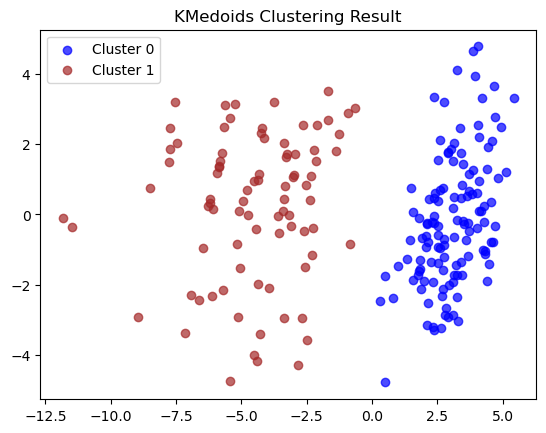

In [117]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(recipient_2000_feature)
pca_result_0=pca_result[labels==1]
pca_result_1=pca_result[labels==0]
# 可视化聚类结果
plt.scatter(pca_result_0[:,0],pca_result_0[:,1],c="blue",label="Cluster 0",alpha=0.7)

            
plt.scatter(pca_result_1[:, 0], pca_result_1[:, 1], c="brown", label="Cluster 1",alpha=0.7)
plt.title('KMedoids Clustering Result')
plt.legend()
plt.show()


In [118]:
best_score=-1
best_n_clusters=0
scores_don=[]
for n_clusters in range(2, 20):  # 尝试不同簇数
    kmedoids = KMedoids(n_clusters=n_clusters, metric='braycurtis', random_state=42)
    labels_donor = kmedoids.fit_predict(moderate_donor_feature)
    score = silhouette_score(moderate_donor_feature, labels_donor, metric='braycurtis')
    scores_don.append(score)
    
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
print(f"最佳簇数: {best_n_clusters}, 轮廓系数: {best_score}")
print(f"scores: {scores_don}")

最佳簇数: 2, 轮廓系数: 0.423911285025923
scores: [0.423911285025923, 0.28818851951048274, 0.17165635453296807, 0.1669525470561618, 0.15633092840212415, 0.14045164019360065, 0.12904380495259138, 0.0931973431991474, 0.09726814422027422, 0.09088537122548004, 0.09734260633119567, 0.07690283411278931, 0.06354468886441782, 0.06877676486662318, 0.0780058055388759, 0.07810811884755912, 0.06414763363314606, 0.07115711677892558]


In [119]:
n_clusters =2
kmedoids = KMedoids(n_clusters=n_clusters, metric='braycurtis', random_state=42)
labels_donors = kmedoids.fit_predict(moderate_donor_feature)
score = silhouette_score(moderate_donor_feature, labels_donors, metric='braycurtis')
print(f"轮廓系数: {score}")

轮廓系数: 0.423911285025923


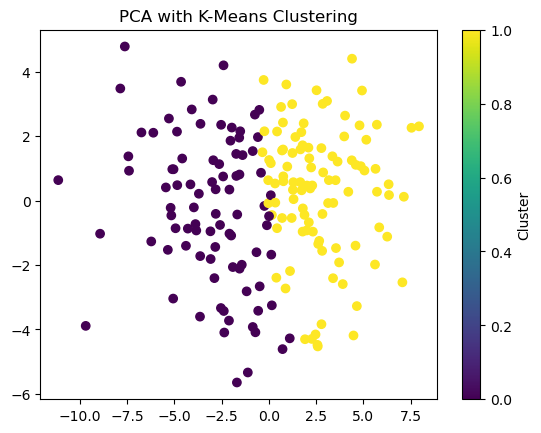

In [120]:
from sklearn.cluster import KMeans
# Use t-sne to lower the dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(moderate_donor_feature)
kmeans = KMeans(n_clusters=2, random_state=42)  
labels = kmeans.fit_predict(pca_result)
# Visulaziation
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_donors, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('PCA with K-Means Clustering')
plt.show()

In [121]:
tsne = TSNE(n_components=2, perplexity=19, learning_rate=85, n_iter=1000, early_exaggeration=12, random_state=42,metric="braycurtis")
tsne_result = tsne.fit_transform(moderate_donor_feature)
for n_clusters in range(2, 20):  # 尝试不同簇数
    kmedoids = KMedoids(n_clusters=n_clusters, metric='braycurtis', random_state=42)
    labels = kmedoids.fit_predict(tsne_result)
    score = silhouette_score(tsne_result, labels, metric='braycurtis')
    scores.append(score)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print(f"最佳簇数: {best_n_clusters}, 轮廓系数: {best_score}")


/miniconda/envs/pytorch/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


最佳簇数: 2, 轮廓系数: 0.7830463698483904


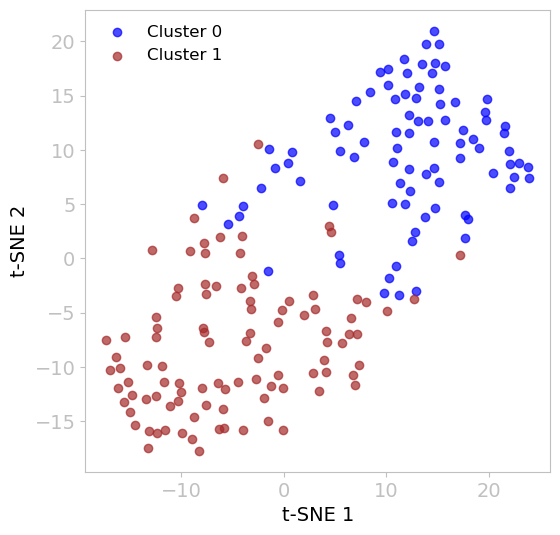

In [122]:
kmeans = KMeans(n_clusters=2, random_state=42)  
labels = kmeans.fit_predict(tsne_result)
tsne_result_0=tsne_result[labels_donors==0]
tsne_result_1=tsne_result[labels_donors==1]
plt.rcParams["svg.fonttype"] = "none"  
plt.figure(figsize=(6,6))
plt.scatter(tsne_result_0[:,0],tsne_result_0[:,1],c="blue",label="Cluster 0",alpha=0.7)
plt.scatter(tsne_result_1[:,0],tsne_result_1[:,1],c="brown",label="Cluster 1",alpha=0.7)

plt.legend(frameon=False,loc='upper left',fontsize=12)
plt.xlabel("t-SNE 1",fontsize=14,c='black')
plt.ylabel("t-SNE 2",fontsize=14,c='black')
ax=plt.gca()
ax.spines['top'].set_color('silver')
ax.spines['right'].set_color('silver')
ax.spines['left'].set_color('silver')
ax.spines['bottom'].set_color('silver')
ax.tick_params(axis='both',colors='silver',labelsize=14)
plt.savefig("t-sne_donor.svg", format="svg", bbox_inches="tight")
plt.show()
kmeans = KMeans(n_clusters=2, random_state=42)  
labels = kmeans.fit_predict(tsne_result)

/miniconda/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/miniconda/envs/pytorch/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


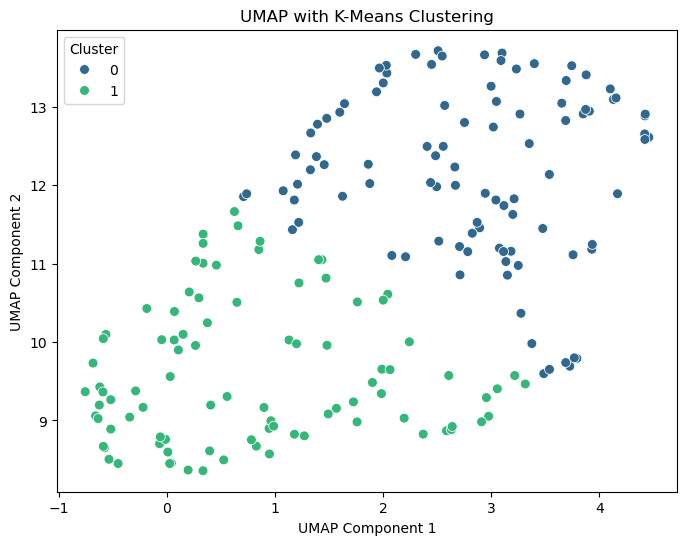

In [123]:
import umap.umap_ as umap  # 使用 umap.umap_ 访问 UMAP

umap_model = umap.UMAP(n_components=2, n_neighbors=15,min_dist=0.01,random_state=42)
data_umap = umap_model.fit_transform(moderate_donor_feature)

# 3. K-Means 聚类
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_umap)

# 4. 结果可视化
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_umap[:, 0], y=data_umap[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("UMAP with K-Means Clustering")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Cluster")
plt.show()

In [124]:
recipient_2000_feature.shape

(208, 76)

/miniconda/envs/pytorch/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


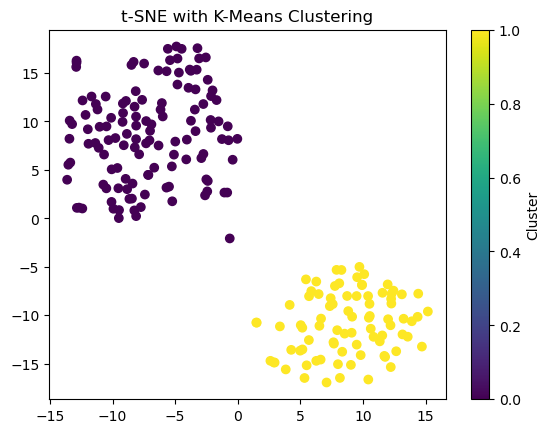

In [125]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Use t-sne to lower the dimensions
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, early_exaggeration=12, random_state=42)
tsne_result = tsne.fit_transform(recipient_2000_feature)
kmeans = KMeans(n_clusters=2, random_state=42)  
labels = kmeans.fit_predict(tsne_result)
# Visulaziation
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('t-SNE with K-Means Clustering')
plt.show()

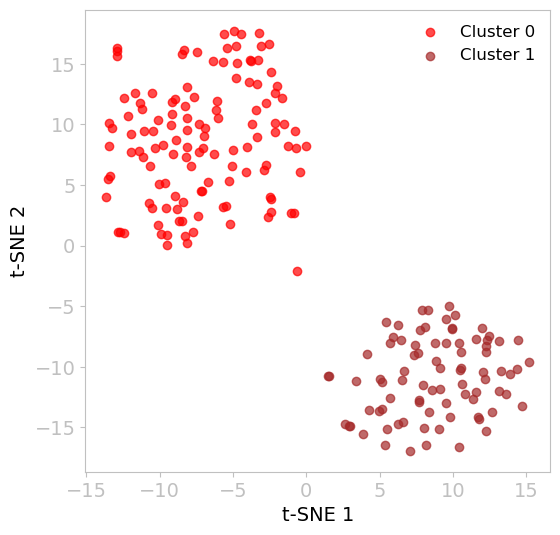

In [126]:
kmeans = KMeans(n_clusters=2, random_state=42)  
labels = kmeans.fit_predict(tsne_result)
tsne_result_0=tsne_result[labels==0]
tsne_result_1=tsne_result[labels==1]
plt.rcParams["svg.fonttype"] = "none"  
plt.figure(figsize=(6,6))
plt.scatter(tsne_result_0[:,0],tsne_result_0[:,1],c="red",label="Cluster 0",alpha=0.7)
plt.scatter(tsne_result_1[:,0],tsne_result_1[:,1],c="brown",label="Cluster 1",alpha=0.7)
plt.xlabel("t-SNE 1",fontsize=14,c='black')
plt.ylabel("t-SNE 2",fontsize=14,c='black')
ax=plt.gca()
plt.legend(frameon=False,loc='upper right',fontsize=12)
ax.spines['top'].set_color('silver')
ax.spines['right'].set_color('silver')
ax.spines['left'].set_color('silver')
ax.spines['bottom'].set_color('silver')
ax.tick_params(axis='both',colors='silver',labelsize=14)
plt.savefig("t-sne_reci.svg", format="svg", bbox_inches="tight")
plt.show()

In [127]:
tsne_result

array([[ 13.105916  ,  -7.8362617 ],
       [ -5.69589   ,   3.17483   ],
       [ -7.005185  ,   9.035482  ],
       [ -4.8132477 ,  16.493416  ],
       [  7.582839  ,  -8.843788  ],
       [ -7.4174657 ,   2.4597054 ],
       [ -3.935783  ,  13.474077  ],
       [-13.531403  ,   5.534898  ],
       [-10.495102  ,   3.1000128 ],
       [ -7.7407756 ,   1.1649356 ],
       [ -1.069103  ,   2.6639197 ],
       [ 14.4117365 ,  -7.766217  ],
       [ -3.7390046 ,  10.071927  ],
       [ -7.4807796 ,  15.974364  ],
       [-12.849736  ,   1.0864273 ],
       [ 13.242828  , -10.353056  ],
       [-11.677059  ,  12.575581  ],
       [ -9.929425  ,   0.9925551 ],
       [  8.532895  , -11.891556  ],
       [ -0.40868464,   6.0519586 ],
       [ -0.03408039,   8.207149  ],
       [  3.8313768 , -15.581871  ],
       [ 13.153889  , -11.969502  ],
       [ 12.264731  ,  -8.788264  ],
       [ -4.1145525 ,   6.086062  ],
       [ -1.2635853 ,   8.18315   ],
       [ -7.1361957 ,   4.4881325 ],
 

In [128]:
recipient_2000_clu_0=recipient_2000_feature[labels==0]
recipient_2000_clu_0.shape

(125, 76)

In [129]:
recipient_2000_clu_1=recipient_2000_feature[labels==1]
recipient_2000_clu_1.shape

(83, 76)

In [130]:
recipient_2000_clu_0_name=pd.DataFrame(data=recipient_2000_clu_0.index,columns=["recipient"])
recipient_2000_clu_1_name=pd.DataFrame(data=recipient_2000_clu_1.index,columns=['recipient'])



In [131]:
recipient_2000_clu_0_train_ini,recipient_2000_clu_0_test_ini=train_test_split(recipient_2000_clu_0
                                                                                , test_size=0.2,random_state=42)
recipient_2000_clu_1_train_ini,recipient_2000_clu_1_test_ini=train_test_split(recipient_2000_clu_1
                                                                                , test_size=0.2,random_state=42)


In [132]:
recipient_2000_clu_0_train_ini.shape

(100, 76)

In [133]:
moderate_donor.shape

(188, 53)

In [134]:
recipient_sum.head()

index    sum
0  712716  600.0
1  644425  612.0
2  847552  603.0
3  453853  610.0
4  588988    1.0

In [135]:

recipient_sum.head()

index    sum
0  712716  600.0
1  644425  612.0
2  847552  603.0
3  453853  610.0
4  588988    1.0

In [136]:
recipient_sum.index=recipient_sum.index.astype(str)

### MOE

#### Dataset

In [137]:
import torch
"unseen recipients"
X_test_reci_new_f=torch.tensor(X_test_reci_final.values,dtype=torch.float32)
y_test_reci_new_f=torch.tensor(y_test_reci_final.values,dtype=torch.long)

"unseen donors"
X_test_don_new_torch=torch.tensor(X_test_don_final.values,dtype=torch.float32)
y_test_don_new_torch=torch.tensor(y_test_don_final.values,dtype=torch.float32)

"unseen donors and recipients"
X_train_reci_don_torch=torch.tensor(X_train_reci_don.values,dtype=torch.float32)
y_train_reci_don_torch=torch.tensor(y_train_reci_don.values,dtype=torch.float32)
X_test_reci_don_torch=torch.tensor(X_test_reci_don.values,dtype=torch.float32)
y_test_reci_don_torch=torch.tensor(y_test_reci_don.values,dtype=torch.float32)

In [138]:
from torch.utils.data import TensorDataset, DataLoader

seed=42
g = torch.Generator()
g.manual_seed(seed)

# 创建 DataLoader
batch_size = 64

In [139]:
"unseen recipients"
test_dataset_moe = TensorDataset(X_test_reci_new_f, y_test_reci_new_f)
test_loader_moe = DataLoader(test_dataset_moe, batch_size=batch_size,generator=g)

"unseen donors"
test_dataset_moe_don=TensorDataset(X_test_don_new_torch,y_test_don_new_torch)
test_loader_moe_don=DataLoader(test_dataset_moe_don,batch_size=batch_size,generator=g)

"unseen donors and recipients"
train_dataset_moe_don_reci=TensorDataset(X_train_reci_don_torch,y_train_reci_don_torch)
test_dataset_moe_don_reci=TensorDataset(X_test_reci_don_torch,y_test_reci_don_torch)
train_loader_moe_don_reci=DataLoader(train_dataset_moe_don_reci,batch_size=batch_size,shuffle=True,generator=g)
test_loader_moe_don_reci=DataLoader(test_dataset_moe_don_reci,batch_size=batch_size,generator=g)

#### Model

In [140]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        """
        alpha: 控制正负样本的权重，通常设为 0.25~0.5
        gamma: 控制困难样本的关注度，通常设为 2
        reduction: 'mean' 或 'sum'
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)  # 计算正确类别的概率
        loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.0001):
        """
        早停类：当验证损失在 patience 轮内未改善时，停止训练。
        - patience: 容忍多少个 epoch 没有改进
        - min_delta: 变化小于该值不认为是改进
        """
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True



# 定义多层专家网络
class Expert(nn.Module):
    def __init__(self, input_dim, hidden_sizes=[128], output_dim=1):
        super(Expert, self).__init__()
        layers = []
        current_dim = input_dim

        # 动态添加隐藏层
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(current_dim, hidden_size))
            nn.BatchNorm1d(hidden_size)
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.7))
            current_dim = hidden_size

        # 输出层
        layers.append(nn.Linear(current_dim, output_dim))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# 动态路由模块（支持动态层数）
class DynamicRouter(nn.Module):
    def __init__(self, n_embed, num_experts, hidden_sizes=[64]):
        super(DynamicRouter, self).__init__()
        layers = []
        current_dim = n_embed

        # 动态添加隐藏层
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(current_dim, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.7))
            current_dim = hidden_size

        # 输出层 (路由到不同的专家)
        layers.append(nn.Linear(current_dim, num_experts))
        layers.append(nn.Softmax(dim=-1))

        self.router = nn.Sequential(*layers)

    
    def forward(self, x):
        gating_output = self.router(x)
        return gating_output

# SparseMoE 模型 (使用动态路由 + 残差连接)
class SparseMoE(nn.Module):
    def __init__(self, n_embed, num_experts, expert_hidden_sizes, router_hidden_sizes=[64]):
        super(SparseMoE, self).__init__()
        # 动态路由层

        self.router = DynamicRouter(n_embed, num_experts, hidden_sizes=router_hidden_sizes)
        
        # 多专家网络
        self.experts = nn.ModuleList([
            Expert(n_embed, hidden_sizes=expert_hidden_sizes) for _ in range(num_experts)
        ])

    

    def forward(self, x):

        
        gating_output = self.router(x)
        final_output = torch.zeros(x.size(0), 1, device=x.device)

        for i, expert in enumerate(self.experts):
            expert_output = expert(x)
            gating_scores = gating_output[:, i].unsqueeze(1)
            final_output += expert_output * gating_scores



        return final_output


In [141]:
import matplotlib.pyplot as plt
import time
def add_white_noise(data, noise_level=0.01):
    noise = torch.randn_like(data) * noise_level
    return data + noise

def train_model(model,train_loader, test_loader,optimizer,criterion = nn.BCEWithLogitsLoss(),noise_level=0,epochs=20,printwhe=True):
    train_losses = []
    test_losses=[]
    test_accuracies = []
    early_stopping = EarlyStopping(patience=5, min_delta=0.0001)

    total_training_time = 0
    total_inference_time = 0

    # record the start time
    total_start_time = time.time()

    for epoch in range(epochs):
        model.train()
        train_loss = 0

        epoch_train_start_time = time.time()
        for data, labels in train_loader:
            data, labels = data.to('cuda'), labels.to('cuda')
            data=add_white_noise(data,noise_level)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        epoch_train_time = time.time() - epoch_train_start_time 
        total_training_time += epoch_train_time

        avg_loss = train_loss / len(train_loader)
        train_losses.append(avg_loss)

        # 测试集评估
        model.eval()
        correct, total = 0, 0
        test_loss=0

        epoch_inference_start_time = time.time() 
        with torch.no_grad():
            for data, labels in test_loader:
                data, labels = data.to('cuda'), labels.to('cuda')
                data=add_white_noise(data,noise_level) ## add noise
                outputs = model(data)
                predictions = (torch.sigmoid(outputs) > 0.5).int()
                loss=criterion(outputs,labels.float().unsqueeze(1))
                test_loss+=loss.item()
                correct += (predictions.squeeze() == labels).sum().item()
                total += labels.size(0)

        epoch_inference_time = time.time() - epoch_inference_start_time
        total_inference_time += epoch_inference_time

        early_stopping(test_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break  # 终止训练
        avg_test_loss=test_loss/len(test_loader)
        test_losses.append(avg_test_loss)
        accuracy = correct / total
        test_accuracies.append(accuracy)
        if printwhe:
            print(f'Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {accuracy:.4f}')
            print(f"Training Time for this epoch: {epoch_train_time:.4f} seconds")
            print(f"Inference Time for this epoch: {epoch_inference_time:.4f} seconds")

    total_training_time = time.time() - total_start_time  # 计算总训练时间
    
    print(f"Total training time: {total_training_time:.4f} seconds")
    print(f"Total inference time: {total_inference_time:.4f} seconds")


    return train_losses, test_accuracies,test_losses,total_training_time,total_inference_time


#### Stragety 1

In [142]:
import numpy as np
import torch
import time
from scipy import stats

def confidence_interval(model_class, model_args, train_loader, test_loader, optimizer_class, optimizer_args, train_times=10,noise_level=0):
    """
    计算模型多次训练的平均准确率和95%置信区间

    参数:
    - model_class: 模型类，如 MyModel
    - model_args: 传递给模型的参数（dict）
    - train_loader: 训练数据集
    - test_loader: 测试数据集
    - optimizer_class: 优化器类，如 torch.optim.Adam
    - optimizer_args: 传递给优化器的参数（dict）
    - train_times: 训练的次数（默认10次）

    返回:
    - confidence_interval: 置信区间 (low, high)
    """
    accuracy_list = []
    start_time=time.time()
    for _ in range(train_times):
        # 重新创建新的模型
        model = model_class(**model_args).to('cuda')

        # 重新创建优化器
        optimizer = optimizer_class(model.parameters(), **optimizer_args)

        # 训练模型并获取最后一个epoch的测试集准确率
        _, test_accuracies, _ = train_model(
            model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, 
            epochs=60,printwhe=False,noise_level=noise_level)
        
        accuracy_list.append(test_accuracies[-1])
    end_time=time.time()
    total_time=end_time-start_time

    # 计算均值和标准差
    mean_acc = np.mean(accuracy_list)
    std_acc = np.std(accuracy_list, ddof=1)  # ddof=1 计算样本标准差

    # 计算 95% 置信区间
    N = len(accuracy_list)
    confidence_interval = stats.t.interval(0.95, df=N-1, loc=mean_acc, scale=std_acc / np.sqrt(N))

    # 输出结果
    print(f"平均准确率: {mean_acc:.4f}")
    print(f"标准差: {std_acc:.4f}")
    print(f"95% 置信区间: ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")

    return confidence_interval,total_time,accuracy_list


from scipy import stats
import numpy as np
import time

def confidence_interval_final(model_class, model_args, train_loader, test_loader, optimizer_class, optimizer_args, train_times=5, noise_level=0):
    """
    多次训练模型，计算平均准确率和训练/推理时间，并返回 95% 置信区间。

    返回:
    - confidence_interval: 准确率置信区间 (low, high)
    - total_time: 总实验时间
    - accuracy_list: 每次准确率列表
    - train_time_list: 每次训练时间列表
    - inference_time_list: 每次推理时间列表
    """
    accuracy_list = []
    train_time_list = []
    inference_time_list = []

    total_start = time.time()

    for _ in range(train_times):
        # 创建新模型和优化器
        model = model_class(**model_args).to('cuda')
        optimizer = optimizer_class(model.parameters(), **optimizer_args)

        # 训练模型并获取准确率和时间
        _, test_accuracies, _, train_time, inference_time = train_model(
            model=model,
            train_loader=train_loader,
            test_loader=test_loader,
            optimizer=optimizer,
            epochs=60,
            printwhe=False,
            noise_level=noise_level
        )

        accuracy_list.append(test_accuracies[-1])
        train_time_list.append(train_time)
        inference_time_list.append(inference_time)

    total_end = time.time()
    total_time = total_end - total_start

    # 计算准确率统计数据
    mean_acc = np.mean(accuracy_list)
    std_acc = np.std(accuracy_list, ddof=1)
    N = len(accuracy_list)
    confidence = stats.t.interval(0.95, df=N-1, loc=mean_acc, scale=std_acc / np.sqrt(N))

    # 平均时间统计
    mean_train_time = np.mean(train_time_list)
    std_train_time = np.std(train_time_list, ddof=1)

    mean_infer_time = np.mean(inference_time_list)
    std_infer_time = np.std(inference_time_list, ddof=1)

    # 输出结果
    print(f"平均准确率: {mean_acc:.4f}")
    print(f"标准差: {std_acc:.4f}")
    print(f"95% 置信区间: ({confidence[0]:.4f}, {confidence[1]:.4f})")
    print(f"平均训练时间: {mean_train_time:.2f} ± {std_train_time:.2f} 秒")
    print(f"平均推理时间: {mean_infer_time:.2f} ± {std_infer_time:.2f} 秒")
    print(f"总运行时间: {total_time:.2f} 秒")

    return confidence, total_time, accuracy_list


#### Model donor best

In [144]:
model_don_reci_best=SparseMoE(n_embed=X_test_don_final.shape[1],num_experts=4,expert_hidden_sizes=[16,8],router_hidden_sizes=[32]).to('cuda')
optimizer = torch.optim.Adam(model_don_reci_best.parameters(), lr=0.0001)
train_losses_don_reci,test_accuracies_don_reci,test_losses_don_reci,_,_=train_model(model_don_reci_best, train_loader_moe_don_reci, test_loader_moe_don_reci, optimizer,epochs=100)

Epoch 1, Train Loss: 0.6797, Test Loss: 0.6841, Test Accuracy: 0.5060
Training Time for this epoch: 2.3945 seconds
Inference Time for this epoch: 0.0563 seconds
Epoch 2, Train Loss: 0.6672, Test Loss: 0.6727, Test Accuracy: 0.5574
Training Time for this epoch: 2.2607 seconds
Inference Time for this epoch: 0.0514 seconds
Epoch 3, Train Loss: 0.6568, Test Loss: 0.6564, Test Accuracy: 0.6157
Training Time for this epoch: 2.1577 seconds
Inference Time for this epoch: 0.0627 seconds
Epoch 4, Train Loss: 0.6429, Test Loss: 0.6329, Test Accuracy: 0.6809
Training Time for this epoch: 2.2103 seconds
Inference Time for this epoch: 0.0524 seconds
Epoch 5, Train Loss: 0.6243, Test Loss: 0.6006, Test Accuracy: 0.7411
Training Time for this epoch: 2.3975 seconds
Inference Time for this epoch: 0.0510 seconds
Epoch 6, Train Loss: 0.6035, Test Loss: 0.5701, Test Accuracy: 0.7624
Training Time for this epoch: 2.1648 seconds
Inference Time for this epoch: 0.0508 seconds
Epoch 7, Train Loss: 0.5782, Test 

In [ ]:
import torch
import optuna
from torch.utils.data import DataLoader
# 目标函数
def objective_don_reci(trial):
    # 采样超参数
    num_experts = trial.suggest_int('num_experts', 3, 5)
    expert_hidden_sizes = trial.suggest_categorical('expert_hidden_sizes', [[8],[16],[32],[32,16],[32,8],[16,8]] )
    router_hidden_sizes = trial.suggest_categorical('router_hidden_sizes', [[8],[16],[32]])
    learning_rate = 0.0001  # 固定学习率

    # 创建模型
    model = SparseMoE(n_embed=X_test_don_final.shape[1],num_experts=num_experts, expert_hidden_sizes=expert_hidden_sizes, router_hidden_sizes=router_hidden_sizes).to('cuda')
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion=nn.BCEWithLogitsLoss()

    # 早停机制
    patience = 5 # 允许 5 轮无提升
    best_accuracy = 0
    wait = 0

    # 训练模型
    for epoch in range(50):  # 最多训练 50 轮
        model.train()
        for data, labels in train_loader_moe_don_reci:
            data, labels = data.to('cuda'), labels.to('cuda')
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels.float().unsqueeze(1))
            loss.backward()
            optimizer.step()

        # 计算测试集准确率
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, labels in test_loader_moe_don_reci:
                data, labels = data.to('cuda'), labels.to('cuda')
                outputs = model(data)
                preds = (outputs > 0.5).float()
                correct += (preds == labels.unsqueeze(1)).sum().item()
                total += labels.size(0)

        accuracy = correct / total

        # 早停判断
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            wait = 0  # 重置等待轮数
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break  # 触发早停

    return best_accuracy  # 目标是最大化测试集准确率

# 运行贝叶斯优化
study = optuna.create_study(direction='maximize')
study.optimize(objective_don_reci, n_trials=20)

# 输出最佳超参数
print("Best hyperparameters:", study.best_params)


[I 2025-02-20 11:40:24,336] A new study created in memory with name: no-name-f87f1919-6ebd-4166-80d1-84a6120b4223
/miniconda/envs/pytorch/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [8] which is of type list.
  warnings.warn(message)
/miniconda/envs/pytorch/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [16] which is of type list.
  warnings.warn(message)
/miniconda/envs/pytorch/lib/python3.12/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [32] which is of type list.
  warnings.warn(message)
/miniconda/envs/pytorch/lib/python3.12/site-packages/optuna/di

Early stopping at epoch 30


[I 2025-02-20 11:42:35,659] Trial 1 finished with value: 0.826332288401254 and parameters: {'num_experts': 3, 'expert_hidden_sizes': [8], 'router_hidden_sizes': [16]}. Best is trial 0 with value: 0.8445141065830721.


Early stopping at epoch 40


[I 2025-02-20 11:44:38,145] Trial 2 finished with value: 0.8595611285266458 and parameters: {'num_experts': 4, 'expert_hidden_sizes': [16, 8], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.
[I 2025-02-20 11:45:59,117] Trial 3 finished with value: 0.8363636363636363 and parameters: {'num_experts': 4, 'expert_hidden_sizes': [16, 8], 'router_hidden_sizes': [16]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 33


[I 2025-02-20 11:47:21,619] Trial 4 finished with value: 0.8200626959247649 and parameters: {'num_experts': 4, 'expert_hidden_sizes': [8], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 40


[I 2025-02-20 11:48:53,906] Trial 5 finished with value: 0.8275862068965517 and parameters: {'num_experts': 5, 'expert_hidden_sizes': [16], 'router_hidden_sizes': [8]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 40


[I 2025-02-20 11:49:53,057] Trial 6 finished with value: 0.8326018808777429 and parameters: {'num_experts': 3, 'expert_hidden_sizes': [32, 8], 'router_hidden_sizes': [16]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 29


[I 2025-02-20 11:51:30,770] Trial 7 finished with value: 0.8357366771159874 and parameters: {'num_experts': 5, 'expert_hidden_sizes': [16, 8], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 34


[I 2025-02-20 11:52:58,772] Trial 8 finished with value: 0.8225705329153605 and parameters: {'num_experts': 4, 'expert_hidden_sizes': [16, 8], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 35


[I 2025-02-20 11:54:21,883] Trial 9 finished with value: 0.8257053291536051 and parameters: {'num_experts': 3, 'expert_hidden_sizes': [8], 'router_hidden_sizes': [16]}. Best is trial 2 with value: 0.8595611285266458.
[I 2025-02-20 11:56:15,227] Trial 10 finished with value: 0.8257053291536051 and parameters: {'num_experts': 5, 'expert_hidden_sizes': [32], 'router_hidden_sizes': [8]}. Best is trial 2 with value: 0.8595611285266458.
[I 2025-02-20 11:57:30,876] Trial 11 finished with value: 0.8269592476489028 and parameters: {'num_experts': 3, 'expert_hidden_sizes': [32, 16], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 35


[I 2025-02-20 11:59:02,864] Trial 12 finished with value: 0.8231974921630094 and parameters: {'num_experts': 4, 'expert_hidden_sizes': [32, 8], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 37


[I 2025-02-20 12:00:07,716] Trial 13 finished with value: 0.8326018808777429 and parameters: {'num_experts': 3, 'expert_hidden_sizes': [32, 8], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 31


[I 2025-02-20 12:01:32,990] Trial 14 finished with value: 0.8401253918495298 and parameters: {'num_experts': 4, 'expert_hidden_sizes': [32], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 43


[I 2025-02-20 12:02:55,664] Trial 15 finished with value: 0.8532915360501567 and parameters: {'num_experts': 3, 'expert_hidden_sizes': [16], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.
[I 2025-02-20 12:04:44,538] Trial 16 finished with value: 0.8200626959247649 and parameters: {'num_experts': 5, 'expert_hidden_sizes': [16], 'router_hidden_sizes': [8]}. Best is trial 2 with value: 0.8595611285266458.
[I 2025-02-20 12:06:07,018] Trial 17 finished with value: 0.8326018808777429 and parameters: {'num_experts': 4, 'expert_hidden_sizes': [16], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 41


[I 2025-02-20 12:07:13,231] Trial 18 finished with value: 0.8275862068965517 and parameters: {'num_experts': 3, 'expert_hidden_sizes': [32, 16], 'router_hidden_sizes': [32]}. Best is trial 2 with value: 0.8595611285266458.


Early stopping at epoch 33


[I 2025-02-20 12:08:51,868] Trial 19 finished with value: 0.8332288401253919 and parameters: {'num_experts': 4, 'expert_hidden_sizes': [16], 'router_hidden_sizes': [8]}. Best is trial 2 with value: 0.8595611285266458.


Best hyperparameters: {'num_experts': 4, 'expert_hidden_sizes': [16, 8], 'router_hidden_sizes': [32]}


#### plot loss and accuracy

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def plot_loss_acc(train_losses, accuracies, test_losses,name):
    plt.style.use("default")  # 确保使用白色背景
    plt.figure(figsize=(12, 5))

    # 平滑曲线
    window_size = min(11, len(train_losses) // 2 * 2 + 1)
    train_losses_smooth = savgol_filter(train_losses, window_size, 3)
    test_losses_smooth = savgol_filter(test_losses, window_size, 3)
    accuracies_smooth = savgol_filter(accuracies, window_size, 3)


    colors = {
            "train_loss": "#4169E1",  # Royal Blue
            "test_loss": "#B22222",   # Firebrick (酒红)
            "accuracy": "#DAA520",    # Goldenrod (暖金)
            "axis": "silver"         # 银色坐标轴
        }
    
    plt.rcParams["svg.fonttype"] = "none"  
    fig,ax1 = plt.subplots(figsize=(6,6))
    ax1.plot(train_losses_smooth, label="Train Loss", color=colors["train_loss"], linewidth=1)
    ax1.plot(test_losses_smooth, label="Test Loss", color=colors["test_loss"], linewidth=1)
    ax1.set_xlabel("Epoch", color='black',fontsize=14)
    ax1.set_ylabel("Loss", color='black',fontsize=14)

    ax1.legend(fontsize=13,frameon=False)
    for spine in ax1.spines.values():
        spine.set_color(colors["axis"])
    ax1.tick_params(axis="both", colors=colors["axis"],labelsize=14)
    plt.savefig(f"{name}_Losses.svg",format='svg',bbox_inches='tight')


    plt.rcParams["svg.fonttype"] = "none"  
    fig,ax2 = plt.subplots(figsize=(6,6))
    ax2.plot(accuracies_smooth, label="Test Accuracy", color=colors["accuracy"], linewidth=1)
    ax2.set_xlabel("Epoch", color='black',fontsize=14)
    ax2.set_ylabel("Accuracy", color='black',fontsize=14)

    ax2.legend(fontsize=13,frameon=False)
    for spine in ax2.spines.values():
        spine.set_color(colors["axis"])
    ax2.tick_params(axis="both", colors=colors["axis"],labelsize=14)
    
    plt.savefig(f"{name}_test_accuracy.svg", format="svg", bbox_inches="tight")

    plt.show()


<Figure size 1200x500 with 0 Axes>

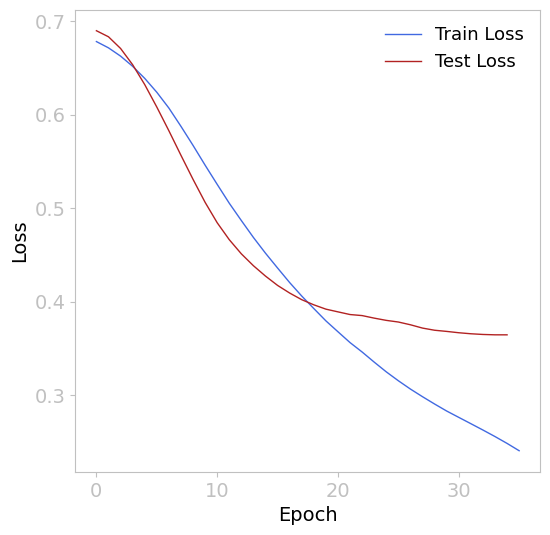

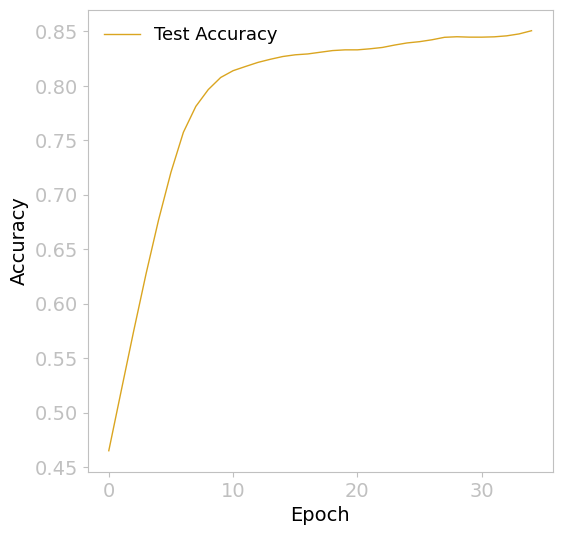

In [ ]:
plot_loss_acc(train_losses_don_reci,test_accuracies_don_reci,test_losses_don_reci,"donor_recipient")

#### plot confusion matrix,ROC and PR  

In [ ]:
from sklearn.metrics import auc, average_precision_score, precision_recall_curve


def compute_confusion_matrix(model, test_loader,name):
    model.eval()
    all_preds, all_labels,all_probs= [], [],[]

    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to('cuda'), labels.to('cuda')
            outputs = model(data)
            probs=torch.sigmoid(outputs).cpu().numpy().flatten()
            predictions = (torch.sigmoid(outputs) > 0.5).int().squeeze(1)
            all_probs.extend(probs)
            all_preds.extend(predictions.cpu().numpy())  # 直接展平
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # 计算混淆矩阵
    cm = confusion_matrix(all_labels, all_preds)

    # ROC曲线
    fpr,tpr,_=roc_curve(all_labels,all_probs)
    roc_auc=auc(fpr,tpr)




    plt.rcParams["svg.fonttype"] = "none"  
    fig, ax = plt.subplots(figsize=(6, 6)) 
    # 绘制 ROC 曲线
    ax.plot(fpr, tpr, color='royalblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    # 添加基线 (随机猜测)
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1.5, label='Chance Level')
    # 坐标轴美化
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=14, color='black')
    ax.set_ylabel('True Positive Rate', fontsize=14, color='black')
    # ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, color='black')
    # 设定刻度颜色
    ax.tick_params(axis='both', colors='silver',labelsize=16)
    # 设定边框颜色
    for spine in ax.spines.values():
        spine.set_color('silver')
    # 添加图例
    ax.legend(loc='lower right', fontsize=14, frameon=False)
    plt.grid(False)
    # 显示
    plt.savefig(f"{name}_ROC.svg", format="svg", bbox_inches="tight")
    plt.show()


    # 可视化
    plt.rcParams["svg.fonttype"] = "none"  
    plt.figure(figsize=(6, 5)) 
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Cured", "Cured"], yticklabels=["Not Cured", "Cured"],
                )
    plt.xlabel("Predicted Label",fontsize=14)
    plt.ylabel("True Label",fontsize=14)
    # plt.title(f"Confusion Matrix")
    plt.savefig(f"{name}_Confusion.svg", format="svg", bbox_inches="tight")
    plt.show()

    print("Classification Report:\n", classification_report(all_labels, all_preds, target_names=["Not Cured", "Cured"]))



    
    plt.rcParams["svg.fonttype"] = "none"  
    # 计算 Precision-Recall 曲线
    precision, recall, _ = precision_recall_curve(all_labels, all_probs)
    pr_auc = auc(recall, precision)  # 计算 AUC

    precision = np.append(precision, 0)
    recall = np.append(recall, 1)
    
    sorted_indices = np.argsort(recall)
    recall = recall[sorted_indices]
    precision = precision[sorted_indices]

    # 绘制 PR 曲线
    fig, ax = plt.subplots(figsize=(6, 6))
    # ax.plot(recall, precision, color='royalblue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax.step(recall, precision, color='royalblue', lw=2, where='post', label=f'PR Curve (AUC = {pr_auc:.2f})')


    # 坐标轴美化
    ax.set_xlim([0.0, 1.05])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall', fontsize=14, color='black')
    ax.set_ylabel('Precision', fontsize=14, color='black')

    # 设置刻度颜色
    ax.tick_params(axis='both', colors='silver', labelsize=16)

    # 设定边框颜色
    for spine in ax.spines.values():
        spine.set_color('silver')

    # 添加图例
    ax.legend(loc='lower left', fontsize=14, frameon=False)
    plt.grid(False)
    # 保存和显示
    plt.savefig(f"{name}_PR.svg", format="svg", bbox_inches="tight")
    plt.show()



    return fpr,tpr,roc_auc,precision, recall, pr_auc


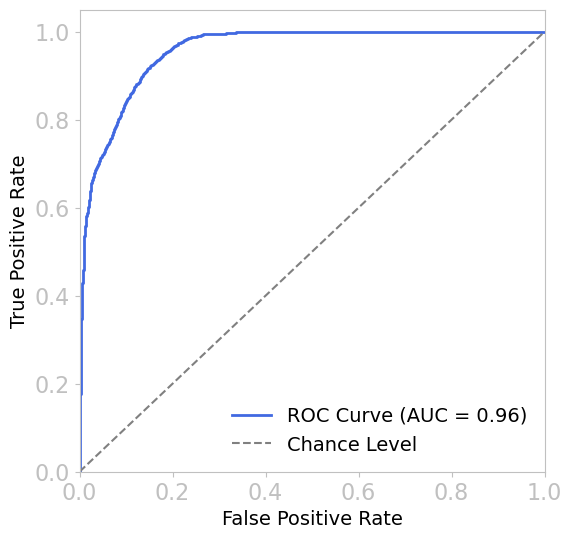

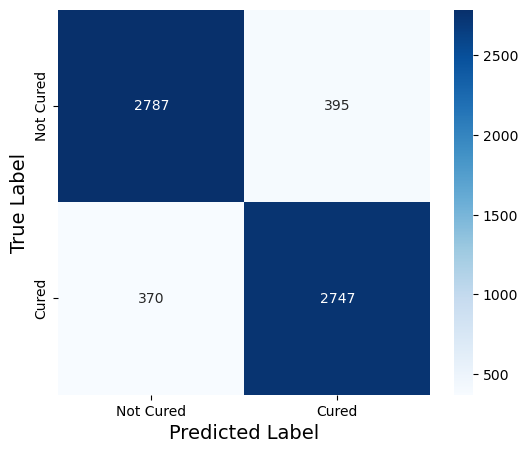

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.88      0.88      0.88      3182
       Cured       0.87      0.88      0.88      3117

    accuracy                           0.88      6299
   macro avg       0.88      0.88      0.88      6299
weighted avg       0.88      0.88      0.88      6299



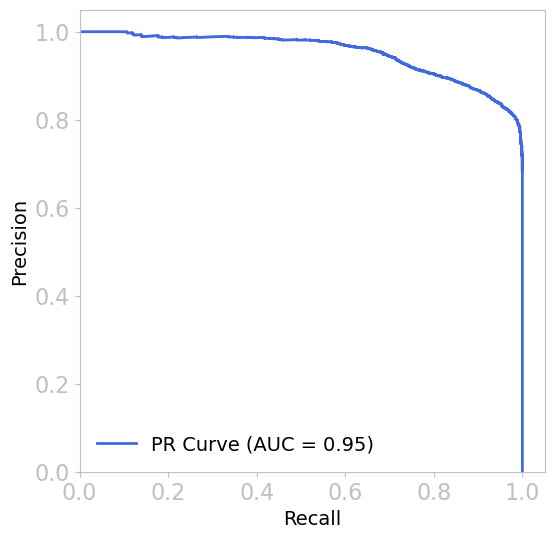

In [ ]:
fpr_don,tpr_don,roc_auc_don,precision_don, recall_don, pr_auc_don=compute_confusion_matrix(model_don_reci_best,test_loader_moe_don,'donor')

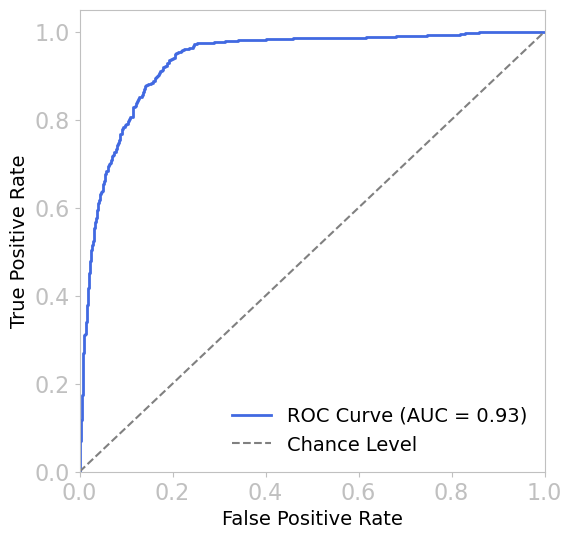

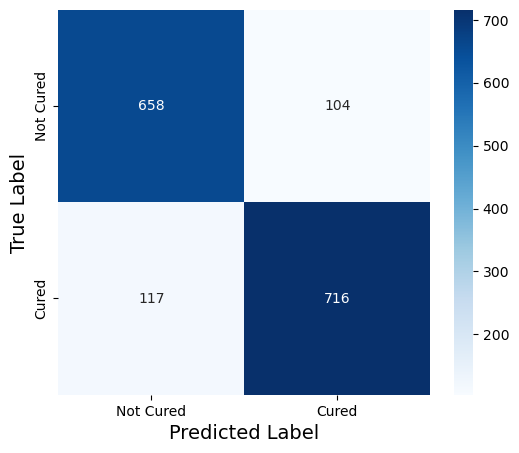

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.85      0.86      0.86       762
       Cured       0.87      0.86      0.87       833

    accuracy                           0.86      1595
   macro avg       0.86      0.86      0.86      1595
weighted avg       0.86      0.86      0.86      1595



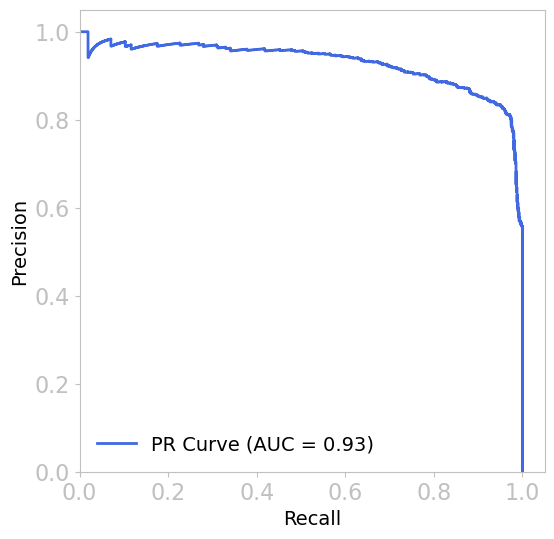

In [ ]:
fpr_reci_don,tpr_reci_don,roc_auc_reci_don,precision_reci_don, recall_reci_don, pr_auc_reci_don=compute_confusion_matrix(model_don_reci_best,test_loader_moe_don_reci,'donor_recipient')

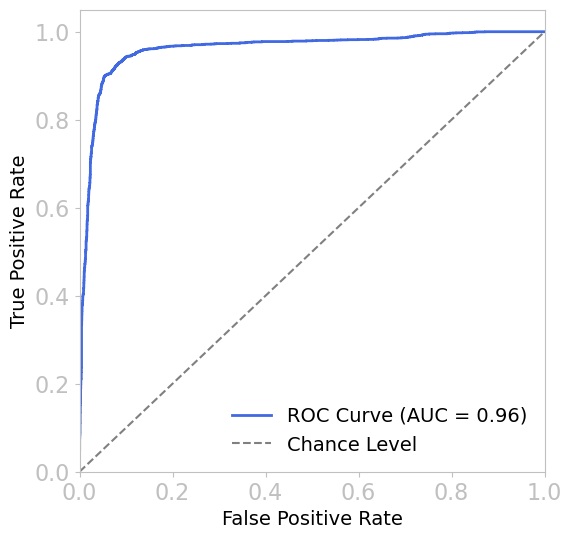

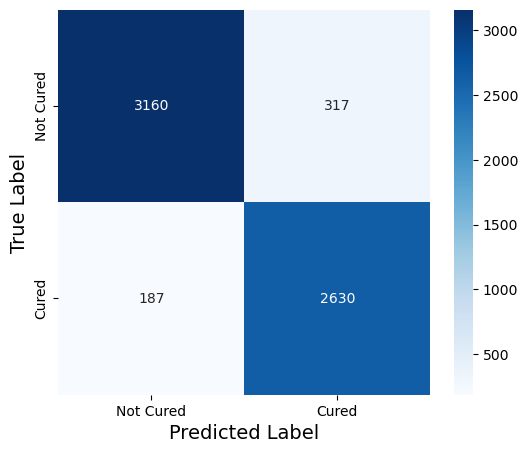

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.94      0.91      0.93      3477
       Cured       0.89      0.93      0.91      2817

    accuracy                           0.92      6294
   macro avg       0.92      0.92      0.92      6294
weighted avg       0.92      0.92      0.92      6294



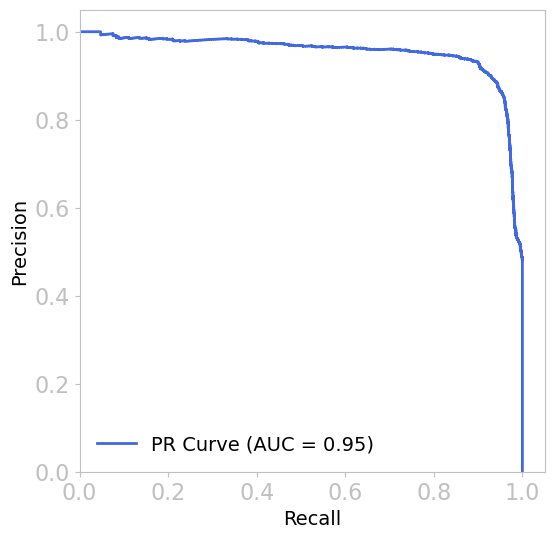

In [ ]:
fpr_reci,tpr_reci,roc_auc_reci,precision_reci, recall_reci, pr_auc_reci=compute_confusion_matrix(model_don_reci_best,test_loader_moe,'recipient')

In [ ]:
import matplotlib.pyplot as plt

def plot_multiple_roc(fpr_list, tpr_list, auc_list, labels, name="multi_roc"):
    """
    在同一张图上绘制多个 ROC 曲线
    
    参数:
    - fpr_list: 假阳性率 (False Positive Rate) 列表，每个元素是一个 fpr 数组
    - tpr_list: 真阳性率 (True Positive Rate) 列表，每个元素是一个 tpr 数组
    - auc_list: AUC 值列表
    - labels: 每条曲线的标签列表
    - name: 保存的文件名
    
    """
    plt.rcParams["svg.fonttype"] = "none"  # 确保字体可编辑
    fig, ax = plt.subplots(figsize=(6, 6))  

    # colors = ['royalblue', 'darkorange', 'seagreen']  # 颜色列表
    colors = ['#0072B2', '#E69F00', '#009E73'] 

    # 绘制每条 ROC 曲线
    for i in range(len(fpr_list)):
        ax.plot(fpr_list[i], tpr_list[i], color=colors[i % len(colors)], lw=2, 
                label=f'{labels[i]} (AUC = {auc_list[i]:.2f})')

    # 添加基线 (随机猜测)
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1.5, label='Chance Level')

    # 坐标轴美化
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=14, color='black')
    ax.set_ylabel('True Positive Rate', fontsize=14, color='black')

    # 设定刻度颜色
    ax.tick_params(axis='both', colors='silver', labelsize=16)

    # 设定边框颜色
    for spine in ax.spines.values():
        spine.set_color('silver')

    # 添加图例
    ax.legend(loc='lower right', fontsize=14, frameon=False)

    # 关闭网格
    plt.grid(False)

    # 保存并显示
    plt.savefig(f"{name}_ROC.svg", format="svg", bbox_inches="tight")
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_pr_curves(pr_data,labels, colors=None, save_path=None):
    """
    绘制 PR 曲线，符合顶刊 SCI 风格。

    参数：
    - pr_data: List[Dict]，包含多个 PR 曲线数据，每个字典需包含 "recall", "precision", "auc" 键
    - colors: List[str]，可选，曲线颜色，默认蓝、橙、绿
    - save_path: str，可选，保存路径，默认不保存
    """
    if colors is None:
        colors = ["#4C72B0", "#DD8452", "#55A868"]  # 默认 SCI 风格配色
    
    plt.rcParams["svg.fonttype"] = "none"  # 确保 SVG 可编辑
    fig, ax = plt.subplots(figsize=(6, 6))

    # 绘制 PR 曲线
    for i, data in enumerate(pr_data):
        ax.step(data["recall"], data["precision"], color=colors[i % len(colors)], lw=2, where='post',
                label=f'{labels[i]} (AUC = {data["auc"]:.2f})')

    # 坐标轴美化
    ax.set_xlim([0.0, 1.05])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall', fontsize=14, color='black')
    ax.set_ylabel('Precision', fontsize=14, color='black')

    ax.tick_params(axis='both', colors='silver', labelsize=16)

    # 设定边框颜色
    for spine in ax.spines.values():
        spine.set_color('silver')

    # 添加图例
    ax.legend(loc='lower left', fontsize=14, frameon=False)

    # 关闭网格
    plt.grid(False)

    # 保存或显示
    if save_path:
        plt.savefig(save_path, format="svg", bbox_inches="tight")
    plt.show()




#### add different level noise

##### Noise with donors and recipients #####

In [ ]:
noise_levels=[0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]


In [ ]:
result_noise_don_reci=[]
for noise_level in noise_levels:
    confidence_interv,total_time,accuracy_list=confidence_interval(
    model_class=SparseMoE,
    model_args={"n_embed": X_test_reci_final.shape[1], 
                "num_experts":4,
               'expert_hidden_sizes':[16,8],
                'router_hidden_sizes':[32]},  # 你的模型参数
    train_loader=train_loader_moe_don_reci,
    test_loader=test_loader_moe_don_reci,
    optimizer_class=torch.optim.Adam,
    optimizer_args={"lr": 0.0001},  # 你的优化器参数
    train_times=10,
    noise_level=noise_level
    )

    result_noise_don_reci.append({
        "noise_level":noise_level,
        "confidence_interval":confidence_interv,
        "mean accuracy":np.mean(confidence_interv),
        "accuracy_list":accuracy_list
    }
    )

Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8465
标准差: 0.0083
95% 置信区间: (0.8405, 0.8524)
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8435
标准差: 0.0076
95% 置信区间: (0.8380, 0.8490)
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8446
标准差: 0.0094
95% 置信区间: (0.8379, 0.8514)
Early stopping triggered.
Early stopping triggered.
Early sto

In [ ]:
df_noise_don_reci=pd.DataFrame(result_noise_don_reci,columns=["noise_level","confidence_interval","mean accuracy","accuracy_list"])
# df_noise_don.iloc[0]=pd.Series({"noise_level":0.000,"confidence_interval":(0.9443833522623449, 0.9498942547369457),"mean_accuracy":0.947139})
df_noise_don_reci['error']=(df_noise_don_reci['confidence_interval'].apply(lambda x:x[1]-x[0]))/2
df_noise_don_reci=df_noise_don_reci.rename(columns={"mean accuracy":"mean_accuracy"})
df_noise_don_reci.head()

noise_level                       confidence_interval  mean_accuracy  \
0        0.000  (0.8405022161359965, 0.8524131443655709)       0.846458   
1        0.001  (0.8380416459671987, 0.8489802976064693)       0.843511   
2        0.010  (0.8379010496132399, 0.8513779472519641)       0.844639   
3        0.100  (0.8109927281815213, 0.8211075852981026)       0.816050   
4        0.200  (0.7849457386076577, 0.7926091203265115)       0.788777   

                                       accuracy_list     error  
0  [0.838871473354232, 0.8344827586206897, 0.8457...  0.005955  
1  [0.8470219435736677, 0.8476489028213167, 0.842...  0.005469  
2  [0.8332288401253919, 0.8470219435736677, 0.828...  0.006738  
3  [0.806269592476489, 0.8050156739811912, 0.8125...  0.005057  
4  [0.7962382445141066, 0.7918495297805642, 0.790...  0.003832

##### plot with noise

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperparam_analysis(df,name,title):
    
    plt.rcParams["svg.fonttype"] = "none"  
    # 旋转 x 轴标签，防止重叠
    # plt.xticks(rotation=30, ha='right')
    
    # 示例数据
    x = df[name].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else str(x))

    y = df['mean_accuracy']

    errors = df['error']  # 误差值
    plt.figure(figsize=(6,5))
    # 画误差棒
    plt.errorbar(x, y, yerr=errors, fmt='s', markersize=10,capsize=5, capthick=1.5, color='black', ecolor='gray', elinewidth=1.5)
    plt.plot(x,y,linestyle="-",color='black',linewidth=2)
    plt.xticks(fontsize=14,fontfamily='serif')
    plt.yticks(fontsize=14,fontfamily='serif')
    plt.xlabel(name, fontsize=14, fontfamily="serif", color="black")
    plt.ylabel("Accuracy", fontsize=14, fontfamily="serif", color="black")
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks(rotation=30, ha='right')
    plt.grid(True, linestyle="--", alpha=0.5)  # 添加网格方便观察
    plt.savefig(f"{title}.svg", format="svg", bbox_inches="tight")

    plt.show()

def plot_total_time(df,name,ten=False):
    x=df[name]
    
    if ten:
        y=df['total_time']/2
    
    plt.figure(figsize=(6,5),dpi=300)
    plt.plot(x,y,color='b',linewidth=2)
    plt.xticks(fontsize=14,fontfamily='serif')
    plt.yticks(fontsize=14,fontfamily='serif')
    
    plt.xlabel("Hyperparameter", fontsize=14, fontfamily="serif", color="black")
    plt.ylabel("Total Time", fontsize=14, fontfamily="serif", color="black")
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # plt.grid(True, linestyle="--", alpha=0.5)  # 添加网格方便观察
    plt.show()

##### conduct with unseen donors and recipients #####

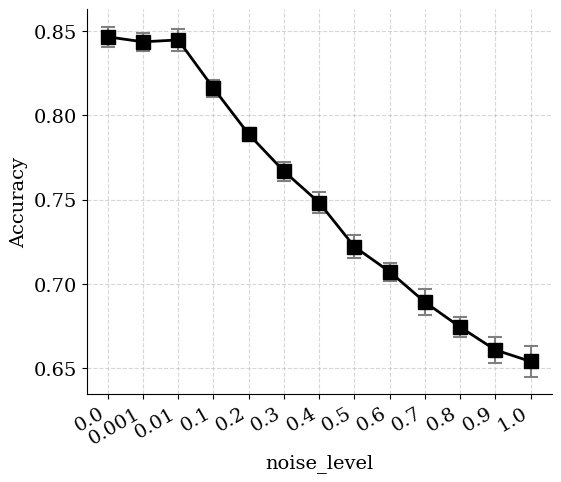

In [ ]:
plot_hyperparam_analysis(df_noise_don_reci,"noise_level","Setting 3 with noise")

#### Ablation experiment

##### model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SparseRoutingMoE(nn.Module):
    def __init__(self, input_dim, num_experts, expert_hidden_dim, top_k=2):
        super(SparseRoutingMoE, self).__init__()
        self.num_experts = num_experts
        self.top_k = top_k  # 选择的专家数量
        
        # 门控网络（用于稀疏路由选择专家）
        self.gate = nn.Linear(input_dim, num_experts)

        self.experts = nn.ModuleList([
            nn.Sequential(*[
                layer for i in range(len(expert_hidden_dim)) 
                for layer in [nn.Linear(expert_hidden_dim[i-1] if i > 0 else input_dim, expert_hidden_dim[i]), nn.ReLU()]
            ] + [nn.Linear(expert_hidden_dim[-1], 1)])  # 输出层
            for _ in range(num_experts)
        ])
    
    def forward(self, x):
        batch_size = x.shape[0]

        # 计算门控得分
        gate_logits = self.gate(x)  # (batch_size, num_experts)
        gate_scores = F.softmax(gate_logits, dim=-1)  # (batch_size, num_experts)

        # 选取 top_k 个专家
        topk_values, topk_indices = torch.topk(gate_scores, self.top_k, dim=-1)  # (batch_size, top_k)

        # 初始化输出
        final_output = torch.zeros(batch_size, self.experts[0][-1].out_features, device=x.device)

        # 计算 top_k 专家的加权输出
        for i in range(self.top_k):
            expert_idx = topk_indices[:, i]  # (batch_size,)
            expert_weight = topk_values[:, i].unsqueeze(-1)  # (batch_size, 1)
            
            # 遍历 batch，每个样本选择对应的专家
            expert_out = torch.zeros_like(final_output)
            for j in range(self.num_experts):
                mask = (expert_idx == j)
                if mask.any():
                    expert_out[mask] = self.experts[j](x[mask])
            
            # 加权求和
            final_output += expert_out * expert_weight
        
        return final_output


##### plot_boxplot

In [ ]:
def plot_boxplot(df,name,title):
    # 设置 Seaborn 主题
    plt.rcParams["svg.fonttype"] = "none"  
    sns.set_theme(style="whitegrid")

    # 颜色方案（清新专业风格）
    # color_palette = ["#4B89DC", "#50C878", "#FFA07A"]  # 深蓝、嫩绿、柔和橙
    
    color_palette = sns.color_palette("muted", n_colors=len(df[name].unique()))
    # 绘制箱线图（不显示离群点，颜色区分）
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(
        x=name, y="accuracy list", data=df,
        width=0.3,  # 让箱体适中
        linewidth=2,  # 线条更粗
        showfliers=False,  # 不显示离群点
        meanline=True, showmeans=True, meanprops={"color": "black", "linewidth": 2},  # 显示均值线
        boxprops={"edgecolor": "black", "linewidth": 2},  # 盒子边框
        whiskerprops={"color": "black", "linewidth": 2},  # 须状线
        capprops={"color": "black", "linewidth": 2},  # 须端横线
        # medianprops={"color": "red", "linewidth": 2},  # 中位数线
        palette=color_palette  # 颜色区分
    )
    min_acc=df['accuracy list'].min()
    max_acc=df['accuracy list'].max()
    ax.set_ylim([min_acc-0.01,max_acc+0.01])
    # 美化
    sns.despine(left=True, bottom=True)  # 去掉右上边框
    ax.set_xlabel("Model", fontsize=14)
    ax.set_ylabel("Accuracy", fontsize=14)
    ax.tick_params(axis='both', labelsize=14,colors='silver')
    
    plt.savefig(f"{title}.svg", format="svg", bbox_inches="tight")
    # 显示图像
    plt.show()
    
def plot_total_time(df_top_k,title):
    color_palette = sns.color_palette("muted", n_colors=len(df_top_k['top_k'].unique()))
    x = np.arange(len(df_top_k)) # X轴位置
    plt.rcParams["svg.fonttype"] = "none"  
    plt.figure(figsize=(8, 5))  # 设置图像大小和分辨率
    plt.barh(x, df_top_k["total time"], color=color_palette, height=0.5)
    plt.yticks(x,df_top_k['top_k'],fontsize=14,c="silver")
    plt.xticks(fontsize=14,c='silver')
    plt.xlabel("Total time",fontsize=16)
    plt.ylabel("Top_k",fontsize=16)
    plt.grid(False)
    # plt.title("Horizontal Bar Chart")
    ax=plt.gca()
    for spine in ax.spines.values():
        spine.set_color('silver')
    ax.tick_params(axis='both',color='silver',labelsize=16)
    plt.gca().invert_yaxis()  # 反转 y 轴，使最高的类别在上方
    plt.savefig(f"{title}.svg",format="svg", bbox_inches="tight")
    plt.show()



In [ ]:
model_time={'Model':['DenseMoe','Mlp','SparseMoE'],"time":[116.402,57.632,419.]}

##### vs top_k(don_reci)

In [ ]:
result_detach_don_reci=[]
accuracy_list=[]
for top_k in range(2,5):

    confidence_interv,total_time,accuracy_list=confidence_interval(
    model_class=SparseRoutingMoE,
    model_args={"input_dim": X_test_reci_final.shape[1], 
                "num_experts":4,
               'expert_hidden_dim':[16,8],
                'top_k':top_k },  # 你的模型参数
    train_loader=train_loader_moe_don_reci,
    test_loader=test_loader_moe_don_reci,
    optimizer_class=torch.optim.Adam,
    optimizer_args={"lr": 0.0001},  # 你的优化器参数
    train_times=5
    )
    result_detach_don_reci.append({
        "top_k":top_k,
        "confidence_interval":confidence_interv,
        "mean accuracy":np.mean(confidence_interv),
        "total time":total_time,
        "accuracy list":accuracy_list
    }
    )

Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8171
标准差: 0.0195
95% 置信区间: (0.7929, 0.8412)
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8138
标准差: 0.0190
95% 置信区间: (0.7903, 0.8373)
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8124
标准差: 0.0168
95% 置信区间: (0.7915, 0.8333)


In [ ]:
confidence_interv,total_time,accuracy_list=confidence_interval(
    model_class=SparseMoE,
    model_args={"n_embed": X_test_reci_final.shape[1], 
                "num_experts":4,
               'expert_hidden_sizes':[16,8],
                'router_hidden_sizes':[32] },  # 你的模型参数
    train_loader=train_loader_moe_don_reci,
    test_loader=test_loader_moe_don_reci,
    optimizer_class=torch.optim.Adam,
    optimizer_args={"lr": 0.0001},  # 你的优化器参数
    train_times=5
    )
result_detach_don_reci.append({
    "top_k":"dynamic",
    "confidence_interval":confidence_interv,
    "mean accuracy":np.mean(confidence_interv),
    "total time":total_time,
    "accuracy list":accuracy_list})

Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8381
标准差: 0.0063
95% 置信区间: (0.8303, 0.8459)


In [ ]:
df_top_k_don_reci=pd.DataFrame(result_detach_don_reci)
df_top_k_don_reci['error']=(df_top_k_don_reci['confidence_interval'].apply(lambda x:x[1]-x[0]))/2
df_top_k_don_reci.head()

top_k                       confidence_interval  mean accuracy  \
0        2  (0.7928679592699072, 0.8412386238021933)       0.817053   
1        3  (0.7902579789783774, 0.8373282279181743)       0.813793   
2        4   (0.791529530140171, 0.8332980560667258)       0.812414   
3  dynamic   (0.8303071959654684, 0.845931048548638)       0.838119   

   total time                                      accuracy list     error  
0  493.787358  [0.8094043887147335, 0.7905956112852665, 0.830...  0.024185  
1  543.059860  [0.8307210031347962, 0.8332288401253919, 0.810...  0.023535  
2  643.805223  [0.7981191222570533, 0.8018808777429467, 0.801...  0.020884  
3  448.680905  [0.8351097178683385, 0.8420062695924765, 0.847...  0.007812

In [ ]:
df_top_k_don_reci.loc[3,'accuracy list']

[0.8351097178683385,
 0.8420062695924765,
 0.8470219435736677,
 0.8313479623824451,
 0.8351097178683385]

In [ ]:
df_exploded_don_reci = df_top_k_don_reci[['top_k', 'accuracy list']].explode('accuracy list', ignore_index=True)
df_exploded_don_reci.head()

top_k accuracy list
0     2      0.809404
1     2      0.790596
2     2      0.830721
3     2      0.840752
4     2      0.813793

/tmp/ipykernel_9105/4032923759.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


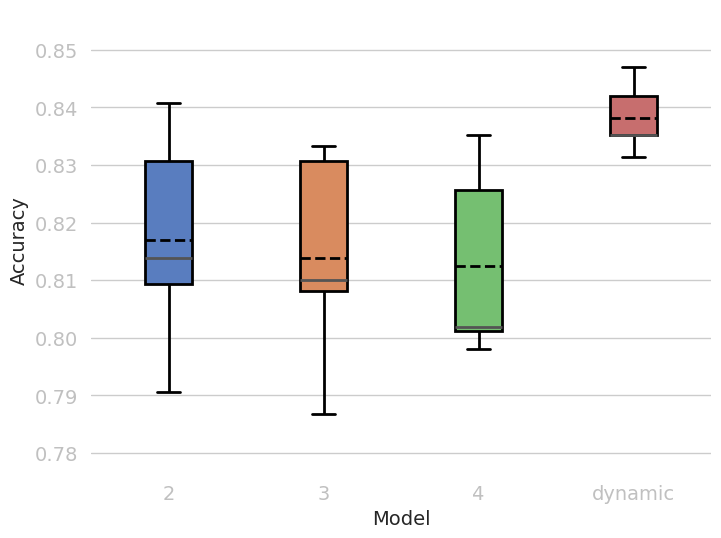

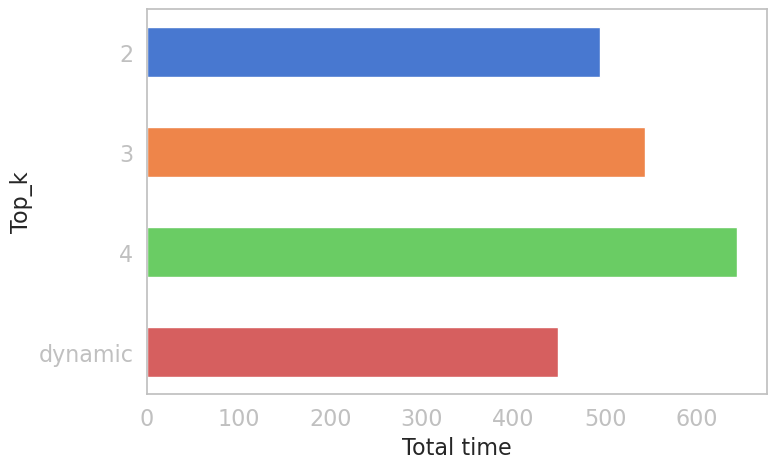

In [ ]:
plot_boxplot(df_exploded_don_reci,"top_k","Sparse_vs_top_k_don_reci")
plot_total_time(df_top_k_don_reci,"total_time_don_reci")

#### VS MLP,Dense MOE

##### Model

In [ ]:
import torch.nn as nn

class CustomMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims, dropout=0):
        """
        input_dim: 输入特征数
        hidden_dims: 一个列表，每个元素代表该层的隐藏单元数
        dropout: dropout 概率
        """
        super(CustomMLP, self).__init__()

        layers = []
        prev_dim = input_dim  # 第一层的输入维度

        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim  # 更新下一层的输入维度

        layers.append(nn.Linear(prev_dim, 1))  # 输出层
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)



class DenseMoE(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_experts=3, dropout_rate=0):
        super(DenseMoE, self).__init__()
        self.num_experts = num_experts

        # 定义多个专家网络
        self.experts = nn.ModuleList([
            nn.Sequential(*[
                layer for i in range(len(hidden_dim))
                for layer in (
                    [nn.Linear(input_dim if i == 0 else hidden_dim[i-1], hidden_dim[i]), 
                     nn.ReLU(), 
                     nn.Dropout(dropout_rate)]
                )
            ])  # 这里不包含最后的输出层
            for _ in range(num_experts)
        ])
        
        # 专家权重层
        self.expert_weights = nn.Linear(input_dim, num_experts)

        # 最终输出层 (用于合并专家的输出)
        self.final_layer = nn.Linear(hidden_dim[-1], 1)  # 你忘了这部分

    def forward(self, x):
        # 计算专家网络的输出 (batch, num_experts, hidden_dim[-1])
        expert_outputs = torch.stack([expert(x) for expert in self.experts], dim=1)

        # 计算专家权重 (batch, num_experts)
        expert_weights = torch.softmax(self.expert_weights(x), dim=-1)

        # 按权重加权专家输出
        combined_output = torch.sum(expert_outputs * expert_weights.unsqueeze(-1), dim=1)  # (batch, hidden_dim[-1])

        # 通过最终全连接层
        output = self.final_layer(combined_output)  # (batch, 1)
        return output

        


##### plot acc noise

In [ ]:
def plot_acc_noise(results_model):

    plt.style.use("default")  # 确保使用白色背景
    colors = {
            "mlp_acc": "#4169E1",  # Royal Blue
            "dense_acc": "#B22222",   # Firebrick (酒红)
            "sparse_acc": "#DAA520",    # Goldenrod (暖金)
            "axis": "#555555"         # 灰色坐标轴
        }
    for entry in results_model:
        noise_level = entry["noise_level"]
        mlp_accuracies = entry["mlp accuracy"]  # 可能是列表
        sparse_accuracies = entry["spare accuracy"]
        dense_accuracies = entry["dense accuracy"]

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.plot(mlp_accuracies, color=colors['mlp_acc'],linewidth=2,alpha=0.8, label="MLP Accuracy")
        ax.plot(sparse_accuracies, color=colors['sparse_acc'],linewidth=2,alpha=0.8, label="Sparse MoE Accuracy")
        ax.plot(dense_accuracies, color=colors['dense_acc'], linewidth=2,alpha=0.8, label="Dense MoE Accuracy")

        ax.set_xlabel("Epoch", color='black',fontsize=14)
        ax.set_ylabel(f"Test Accuracy (noise level:{noise_level})", color='black',fontsize=14)
        # ax2.set_title("Test Accuracy Curve", fontsize=14, fontweight="bold", color=colors["axis"])
        ax.legend(fontsize=13,frameon=False)
        for spine in ax.spines.values():
            spine.set_color(colors["axis"])
        ax.tick_params(axis="both", colors=colors["axis"],labelsize=14)
        
        plt.show()

    

##### (don_reci) vs DenseMOE and MLP

In [ ]:
model_don_reci_mlp=CustomMLP(input_dim=X_test_don_final.shape[1],hidden_dims=[16,8]).to('cuda')
optimizer = torch.optim.Adam(model_don_reci_mlp.parameters(), lr=0.0001)
train_losses_don_reci,test_accuracies_don_reci,test_losses_don_reci=train_model(model_don_reci_mlp, train_loader_moe_don_reci, test_loader_moe_don_reci, optimizer,epochs=100)

Epoch 1,Train Loss: 0.6650, Test Loss:0.6670, Test Accuracy: 0.5730
Epoch 2,Train Loss: 0.6311, Test Loss:0.6210, Test Accuracy: 0.6853
Epoch 3,Train Loss: 0.5805, Test Loss:0.5552, Test Accuracy: 0.7530
Epoch 4,Train Loss: 0.5177, Test Loss:0.4971, Test Accuracy: 0.7856
Epoch 5,Train Loss: 0.4560, Test Loss:0.4500, Test Accuracy: 0.8031
Epoch 6,Train Loss: 0.3985, Test Loss:0.4095, Test Accuracy: 0.8251
Epoch 7,Train Loss: 0.3498, Test Loss:0.3989, Test Accuracy: 0.8201
Epoch 8,Train Loss: 0.3124, Test Loss:0.3764, Test Accuracy: 0.8320
Epoch 9,Train Loss: 0.2819, Test Loss:0.3638, Test Accuracy: 0.8357
Epoch 10,Train Loss: 0.2577, Test Loss:0.3605, Test Accuracy: 0.8339
Epoch 11,Train Loss: 0.2373, Test Loss:0.3632, Test Accuracy: 0.8370
Epoch 12,Train Loss: 0.2214, Test Loss:0.3605, Test Accuracy: 0.8420
Epoch 13,Train Loss: 0.2077, Test Loss:0.3654, Test Accuracy: 0.8408
Epoch 14,Train Loss: 0.1962, Test Loss:0.3775, Test Accuracy: 0.8389
Early stopping triggered.


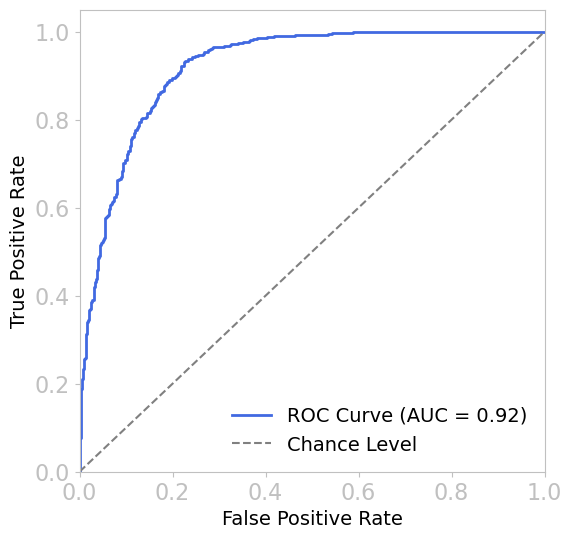

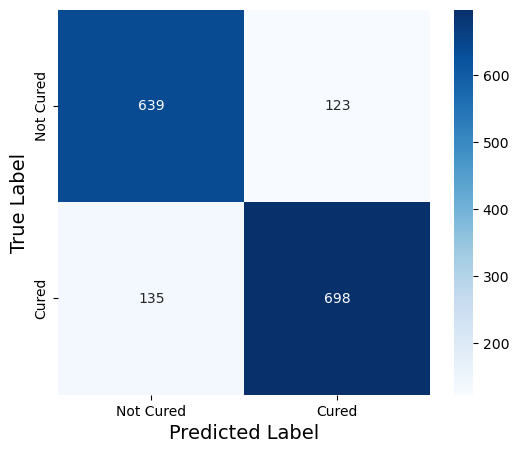

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.83      0.84      0.83       762
       Cured       0.85      0.84      0.84       833

    accuracy                           0.84      1595
   macro avg       0.84      0.84      0.84      1595
weighted avg       0.84      0.84      0.84      1595



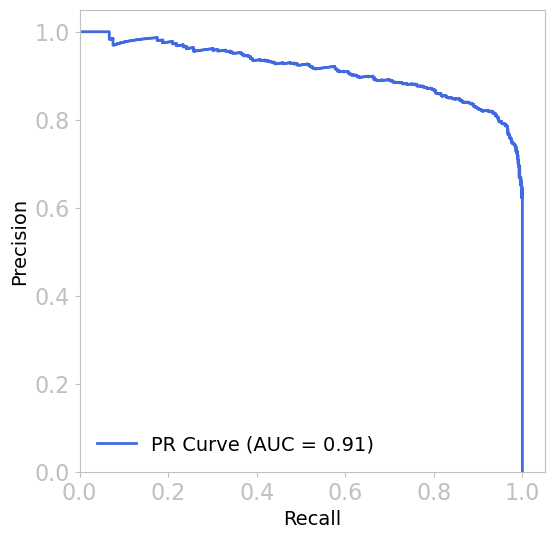

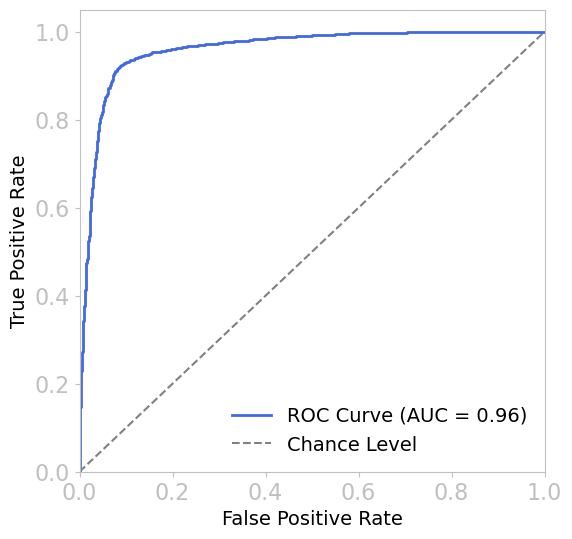

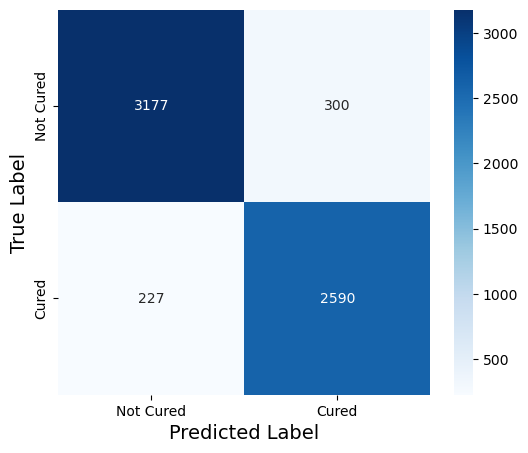

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.93      0.91      0.92      3477
       Cured       0.90      0.92      0.91      2817

    accuracy                           0.92      6294
   macro avg       0.91      0.92      0.92      6294
weighted avg       0.92      0.92      0.92      6294



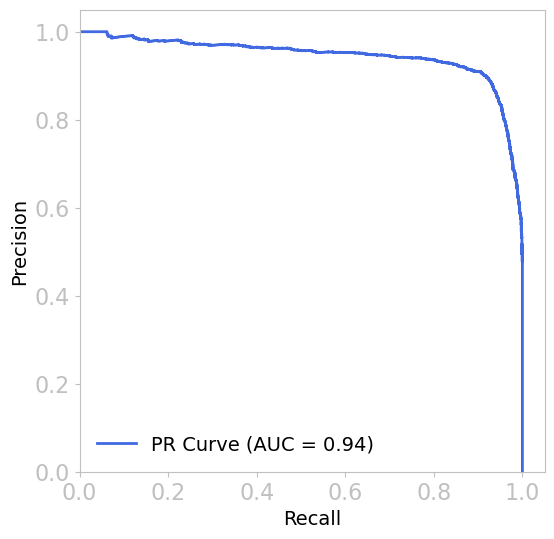

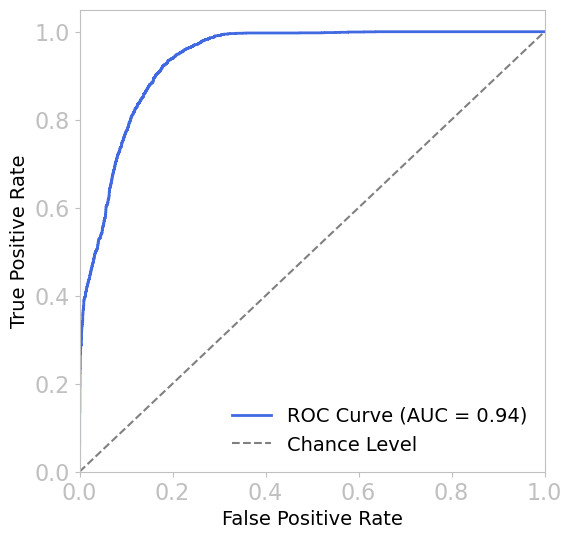

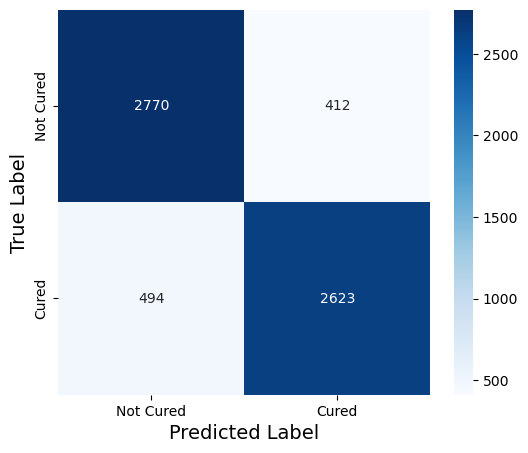

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.85      0.87      0.86      3182
       Cured       0.86      0.84      0.85      3117

    accuracy                           0.86      6299
   macro avg       0.86      0.86      0.86      6299
weighted avg       0.86      0.86      0.86      6299



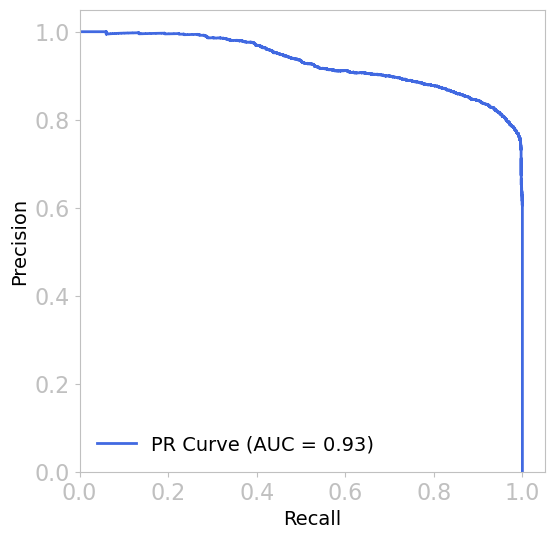

In [ ]:
fpr_reci_don1,tpr_reci_don1,roc_auc_reci_don1,precision_reci_don1, recall_reci_don1, pr_auc_reci_don1=compute_confusion_matrix(model_don_reci_mlp,test_loader_moe_don_reci,'donor_recipient')
fpr_reci1,tpr_reci1,roc_auc_reci1,precision_reci1, recall_reci1, pr_auc_reci1=compute_confusion_matrix(model_don_reci_mlp,test_loader_moe,'recipient')
fpr_don1,tpr_don1,roc_auc_don1,precision_don1, recall_don1, pr_auc_don1=compute_confusion_matrix(model_don_reci_mlp,test_loader_moe_don,'donor')

In [ ]:
model_don_reci_dense=DenseMoE(input_dim=X_test_don_final.shape[1],hidden_dim=[16,8],num_experts=4).to('cuda')
optimizer = torch.optim.Adam(model_don_reci_dense.parameters(), lr=0.0001)
train_losses_don_reci,test_accuracies_don_reci,test_losses_don_reci=train_model(model_don_reci_dense, train_loader_moe_don_reci, test_loader_moe_don_reci, optimizer,epochs=100)

Epoch 1,Train Loss: 0.6703, Test Loss:0.6589, Test Accuracy: 0.6044
Epoch 2,Train Loss: 0.6205, Test Loss:0.5973, Test Accuracy: 0.6922
Epoch 3,Train Loss: 0.5552, Test Loss:0.5326, Test Accuracy: 0.7567
Epoch 4,Train Loss: 0.4871, Test Loss:0.4867, Test Accuracy: 0.7768
Epoch 5,Train Loss: 0.4234, Test Loss:0.4584, Test Accuracy: 0.7944
Epoch 6,Train Loss: 0.3647, Test Loss:0.4394, Test Accuracy: 0.8056
Epoch 7,Train Loss: 0.3181, Test Loss:0.4275, Test Accuracy: 0.8182
Epoch 8,Train Loss: 0.2808, Test Loss:0.4135, Test Accuracy: 0.8295
Epoch 9,Train Loss: 0.2535, Test Loss:0.4080, Test Accuracy: 0.8307
Epoch 10,Train Loss: 0.2313, Test Loss:0.4133, Test Accuracy: 0.8282
Epoch 11,Train Loss: 0.2136, Test Loss:0.4095, Test Accuracy: 0.8301
Epoch 12,Train Loss: 0.1989, Test Loss:0.4143, Test Accuracy: 0.8288
Epoch 13,Train Loss: 0.1860, Test Loss:0.4166, Test Accuracy: 0.8270
Early stopping triggered.


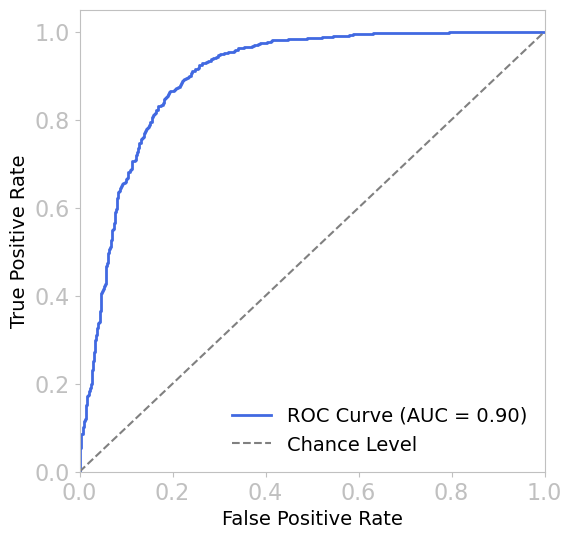

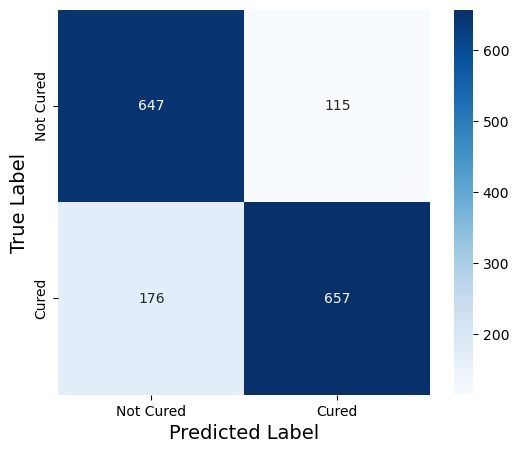

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.79      0.85      0.82       762
       Cured       0.85      0.79      0.82       833

    accuracy                           0.82      1595
   macro avg       0.82      0.82      0.82      1595
weighted avg       0.82      0.82      0.82      1595



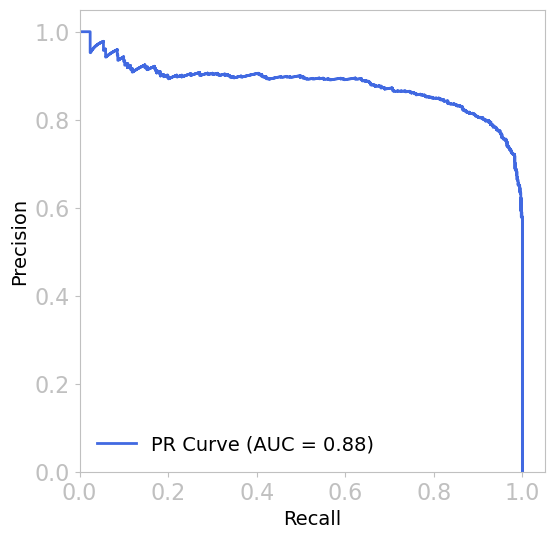

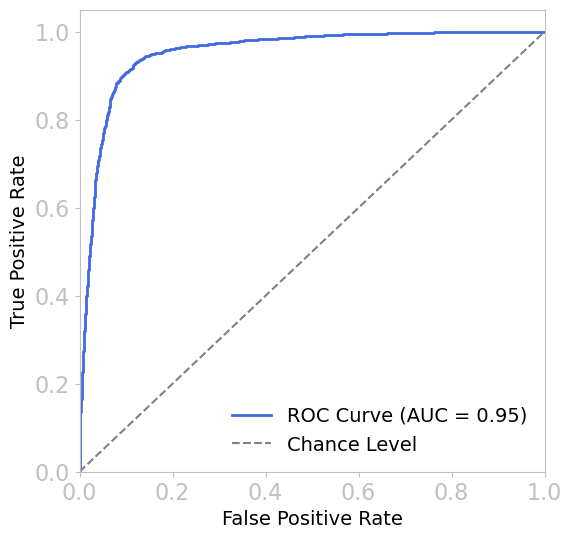

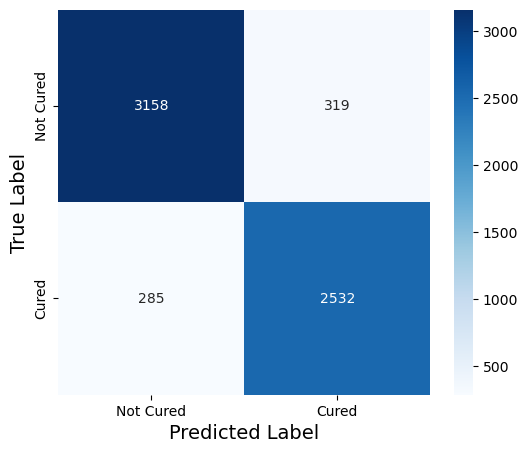

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.92      0.91      0.91      3477
       Cured       0.89      0.90      0.89      2817

    accuracy                           0.90      6294
   macro avg       0.90      0.90      0.90      6294
weighted avg       0.90      0.90      0.90      6294



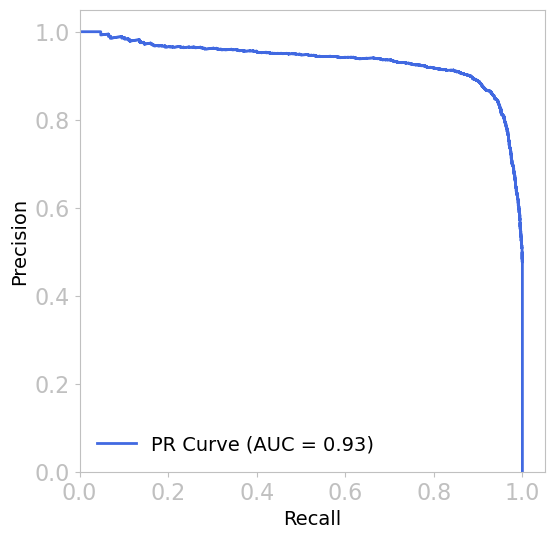

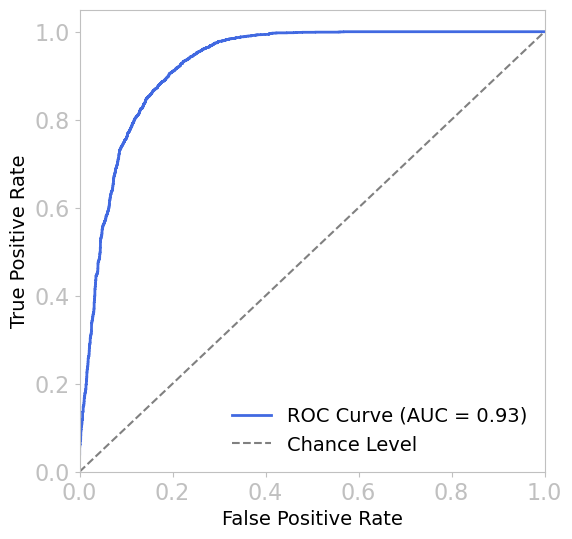

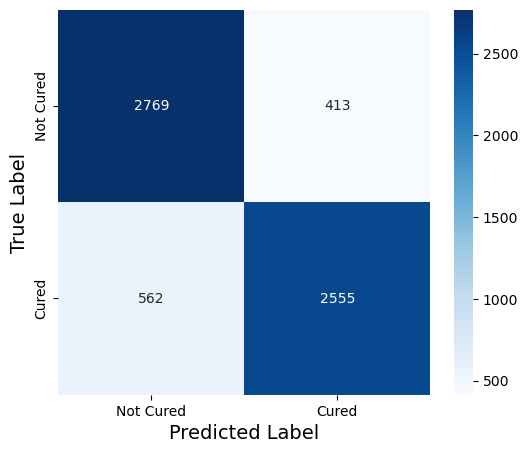

Classification Report:
               precision    recall  f1-score   support

   Not Cured       0.83      0.87      0.85      3182
       Cured       0.86      0.82      0.84      3117

    accuracy                           0.85      6299
   macro avg       0.85      0.84      0.85      6299
weighted avg       0.85      0.85      0.85      6299



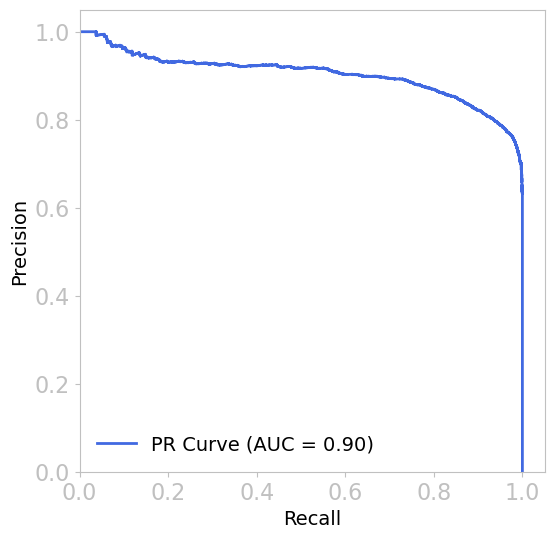

In [ ]:
fpr_reci_don2,tpr_reci_don2,roc_auc_reci_don2,precision_reci_don2, recall_reci_don2, pr_auc_reci_don2=compute_confusion_matrix(model_don_reci_dense,test_loader_moe_don_reci,'donor_recipient')
fpr_reci2,tpr_reci2,roc_auc_reci2,precision_reci2, recall_reci2, pr_auc_reci2=compute_confusion_matrix(model_don_reci_dense,test_loader_moe,'recipient')
fpr_don2,tpr_don2,roc_auc_don2,precision_don2, recall_don2, pr_auc_don2=compute_confusion_matrix(model_don_reci_dense,test_loader_moe_don,'donor')

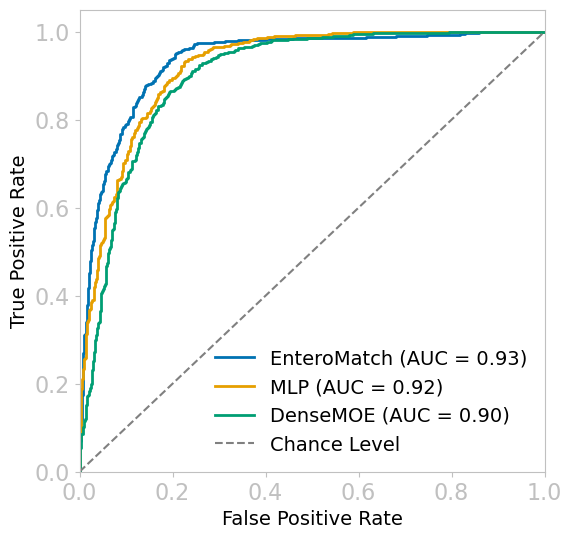

In [ ]:
plot_multiple_roc(
    fpr_list=[fpr_reci_don, fpr_reci_don1, fpr_reci_don2], 
    tpr_list=[tpr_reci_don, tpr_reci_don1, tpr_reci_don2], 
    auc_list=[roc_auc_reci_don,roc_auc_reci_don1, roc_auc_reci_don2], 
    labels=['EnteroMatch', 'MLP', 'DenseMOE'],
    name="comparison_reci_don"
)

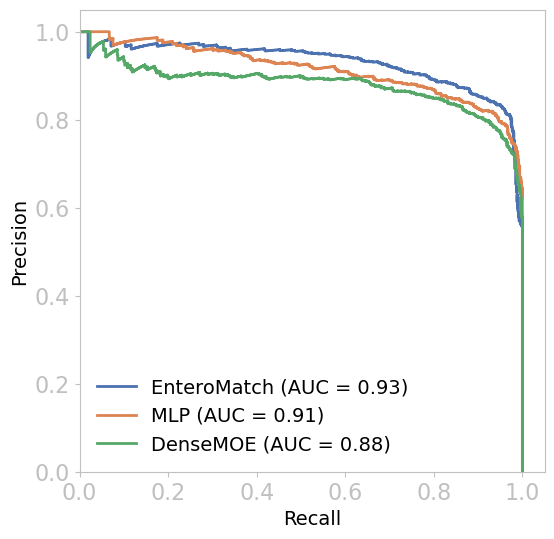

In [ ]:
pr_data = [
    {"recall": recall_reci_don, "precision": precision_reci_don, "auc": pr_auc_reci_don},
    {"recall": recall_reci_don1, "precision": precision_reci_don1, "auc": pr_auc_reci_don1},
    {"recall": recall_reci_don2, "precision": precision_reci_don2, "auc": pr_auc_reci_don2}
]
labels=['EnteroMatch', 'MLP', 'DenseMOE']
# 调用函数
plot_pr_curves(pr_data,labels,save_path="SCI_Style_PR_don_reci.svg")

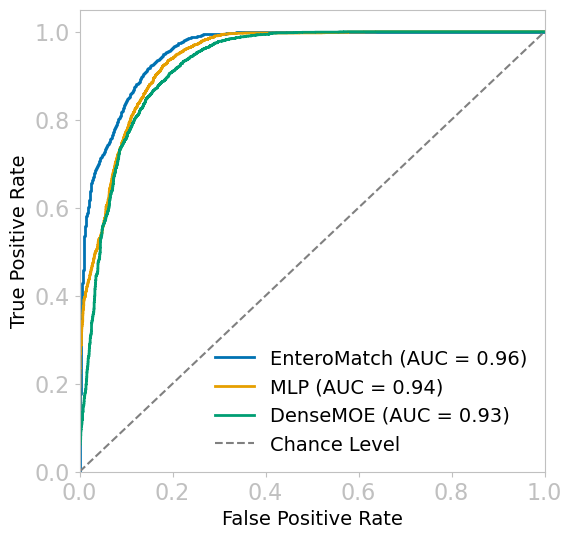

In [ ]:
plot_multiple_roc(
    fpr_list=[fpr_don, fpr_don1, fpr_don2], 
    tpr_list=[tpr_don, tpr_don1, tpr_don2], 
    auc_list=[roc_auc_don,roc_auc_don1, roc_auc_don2], 
    labels=['EnteroMatch', 'MLP', 'DenseMOE'],
    name="comparison_don"
)

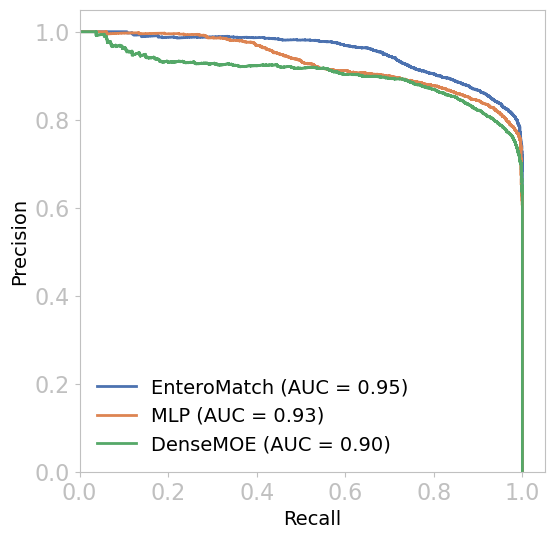

In [ ]:
pr_data = [
    {"recall": recall_don, "precision": precision_don, "auc": pr_auc_don},
    {"recall": recall_don1, "precision": precision_don1, "auc": pr_auc_don1},
    {"recall": recall_don2, "precision": precision_don2, "auc": pr_auc_don2}
]
labels=['EnteroMatch', 'MLP', 'DenseMOE']
# 调用函数
plot_pr_curves(pr_data,labels,save_path="SCI_Style_PR_don.svg")

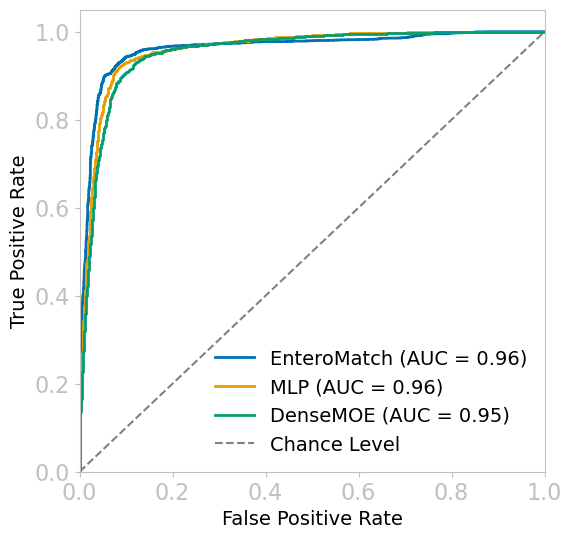

In [ ]:
plot_multiple_roc(
    fpr_list=[fpr_reci, fpr_reci1, fpr_reci2], 
    tpr_list=[tpr_reci, tpr_reci1, tpr_reci2], 
    auc_list=[roc_auc_reci,roc_auc_reci1, roc_auc_reci2], 
    labels=['EnteroMatch', 'MLP', 'DenseMOE'],
    name="comparison_reci"
)

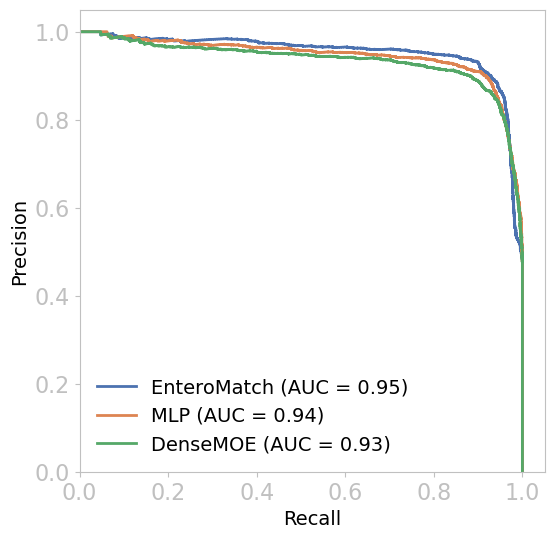

In [ ]:
pr_data = [
    {"recall": recall_reci, "precision": precision_reci, "auc": pr_auc_reci},
    {"recall": recall_reci1, "precision": precision_reci1, "auc": pr_auc_reci1},
    {"recall": recall_reci2, "precision": precision_reci2, "auc": pr_auc_reci2}
]
labels=['EnteroMatch', 'MLP', 'DenseMOE']
# 调用函数
plot_pr_curves(pr_data,labels,save_path="SCI_Style_PR_reci.svg")

In [ ]:
results_model_reci_don=[]
accuracy_list=[]
train_time_dense=[]
infer_time_dense=[]
confidence_interv,total_time,accuracy_list=confidence_interval_final(
    model_class=DenseMoE,
    model_args={"input_dim":X_test_don_final.shape[1], 
                "hidden_dim":[16,8],
                "num_experts":4,
                },  # 你的模型参数
    train_loader=train_loader_moe_don_reci,
    test_loader=test_loader_moe_don_reci,
    optimizer_class=torch.optim.Adam,
    optimizer_args={"lr": 0.0001},  # 你的优化器参数
    train_times=5
    )

results_model_reci_don.append({
        "model":"DenseMoE",
        "confidence_interval":confidence_interv,
        "mean_accuracy":np.mean(confidence_interv),
        "total_time":total_time,
        "accuracy list":accuracy_list
    }
    )



Early stopping triggered.
Total training time: 33.0572 seconds
Total inference time: 1.0227 seconds
Early stopping triggered.
Total training time: 22.2659 seconds
Total inference time: 0.6302 seconds
Early stopping triggered.
Total training time: 27.3591 seconds
Total inference time: 0.7182 seconds
Early stopping triggered.
Total training time: 23.9861 seconds
Total inference time: 0.6475 seconds
Early stopping triggered.
Total training time: 29.1960 seconds
Total inference time: 0.8848 seconds
平均准确率: 0.8148
标准差: 0.0095
95% 置信区间: (0.8030, 0.8266)
平均训练时间: 27.17 ± 4.27 秒
平均推理时间: 0.78 ± 0.17 秒
总运行时间: 135.88 秒


In [ ]:
train_time_mlp=[]
infer_time_mlp=[]
confidence_interv,total_time,accuracy_list=confidence_interval_final(
    model_class=CustomMLP,
    model_args={"input_dim": X_test_don_final.shape[1], 
                "hidden_dims":[128]
                },  # 你的模型参数
    train_loader=train_loader_moe_don_reci,
    test_loader=test_loader_moe_don_reci,
    optimizer_class=torch.optim.Adam,
    optimizer_args={"lr": 0.0001},  # 你的优化器参数
    train_times=5,
    noise_level=0.01
    )

results_model_reci_don.append({
        "model":"mlp",
        "confidence_interval":confidence_interv,
        "mean_accuracy":np.mean(confidence_interv),
        "total_time":total_time,
        "accuracy list":accuracy_list
    }
    )



Early stopping triggered.
Total training time: 12.9265 seconds
Total inference time: 0.4531 seconds
Early stopping triggered.
Total training time: 14.7798 seconds
Total inference time: 0.5262 seconds
Early stopping triggered.
Total training time: 11.5439 seconds
Total inference time: 0.4187 seconds
Early stopping triggered.
Total training time: 11.6935 seconds
Total inference time: 0.4582 seconds
Early stopping triggered.
Total training time: 11.1288 seconds
Total inference time: 0.4082 seconds
平均准确率: 0.8354
标准差: 0.0053
95% 置信区间: (0.8288, 0.8419)
平均训练时间: 12.41 ± 1.48 秒
平均推理时间: 0.45 ± 0.05 秒
总运行时间: 62.08 秒


In [ ]:

confidence_interv,total_time,accuracy_list=confidence_interval_final(
    model_class=SparseMoE,
    model_args={"n_embed": X_test_don_final.shape[1], 
                "num_experts":4,
                "expert_hidden_sizes":[16,8],
                "router_hidden_sizes":[32]
                },  # 你的模型参数
    train_loader=train_loader_moe_don_reci,
    test_loader=test_loader_moe_don_reci,
    optimizer_class=torch.optim.Adam,
    optimizer_args={"lr": 0.0001},  # 你的优化器参数
    train_times=5,
    noise_level=0.001
    )

results_model_reci_don.append({
        "model":"SparseMoE",
        "confidence_interval":confidence_interv,
        "mean_accuracy":np.mean(confidence_interv),
        "total_time":total_time,
        "accuracy list":accuracy_list
    }
    )

Early stopping triggered.
Total training time: 71.1884 seconds
Total inference time: 1.6660 seconds
Early stopping triggered.
Total training time: 70.6829 seconds
Total inference time: 1.6970 seconds
Early stopping triggered.
Total training time: 86.9856 seconds
Total inference time: 2.1547 seconds
Early stopping triggered.
Total training time: 87.8647 seconds
Total inference time: 2.0722 seconds
Early stopping triggered.
Total training time: 75.6325 seconds
Total inference time: 1.8500 seconds
平均准确率: 0.8443
标准差: 0.0086
95% 置信区间: (0.8336, 0.8549)
平均训练时间: 78.47 ± 8.40 秒
平均推理时间: 1.89 ± 0.22 秒
总运行时间: 392.38 秒


In [ ]:
df_model_reci_don=pd.DataFrame(results_model_reci_don)
df_model_reci_don['error']=(df_model_reci_don['confidence_interval'].apply(lambda x:x[1]-x[0]))/2
df_model_reci_don.loc[1,'model']="Mlp"
df_model_reci_don.loc[2,'model']='SparseMoe'
df_model_reci_don=df_model_reci_don
df_model_reci_don.head()

model                       confidence_interval  mean_accuracy  \
0   DenseMoE  (0.8164714008513981, 0.8224000725028336)       0.819436   
1        Mlp  (0.8236781720299609, 0.8335005113556189)       0.828589   
2  SparseMoe   (0.8402749307390656, 0.854772091204508)       0.847524   

   total_time                                      accuracy list     error  
0  116.402431  [0.8200626959247649, 0.8206896551724138, 0.818...  0.002964  
1   57.632197  [0.8332288401253919, 0.8307210031347962, 0.828...  0.004911  
2  419.727554  [0.8407523510971787, 0.8526645768025078, 0.844...  0.007249

In [ ]:
df_exploded_model_reci_don = df_model_reci_don[['model', 'accuracy list']].explode('accuracy list', ignore_index=True)
df_exploded_model_reci_don.head()

model accuracy list
0  DenseMoE      0.820063
1  DenseMoE       0.82069
2  DenseMoE      0.818809
3  DenseMoE      0.821944
4  DenseMoE      0.815674

/tmp/ipykernel_10076/43171771.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


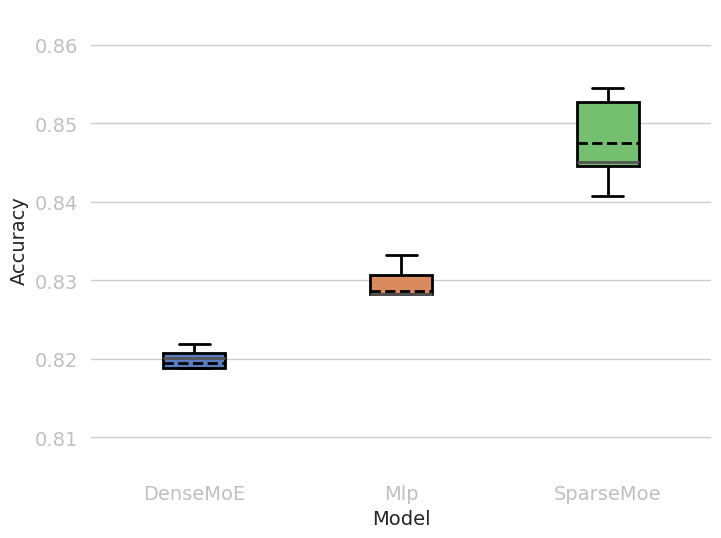

In [ ]:
plot_boxplot(df_exploded_model_reci_don,"model","Sparse_vs_mlp_reci_don")

#### Analyze importance

In [ ]:
def get_feature_importance(model):
    # Initialize a tensor for feature importance
    feature_importance = torch.zeros(model.experts[0].network[0].in_features, device=model.experts[0].network[0].weight.device)
    
    # Loop over each expert and sum the absolute value of weights
    for expert in model.experts:
        weight = expert.network[0].weight.detach().abs().sum(dim=0)  # Access the first Linear layer's weights
        feature_importance += weight
    
    # Average the feature importance across all experts
    feature_importance /= len(model.experts)
    
    return feature_importance


feature_importance=get_feature_importance(model_don_reci_best)
feature_importance=pd.DataFrame(feature_importance.cpu().numpy(),index=X_test_don.columns,columns=["Importance"])
feature_importance=feature_importance/feature_importance.sum()

In [ ]:
donor_feature_indices=X_test_reci_final.columns[:76]
recipient_feature_indices=X_test_reci_final.columns[76:152]
beta_feature_indices=X_test_reci_final.columns[152:]
donor_feature=feature_importance[:76]
recipient_feature=feature_importance[76:152]
beta_feature=feature_importance[152:]
beta_feature.head()

Importance
yule             0.002857
sqeuclidean      0.003747
sokalsneath      0.003994
sokalmichener    0.004081
russellrao       0.003713

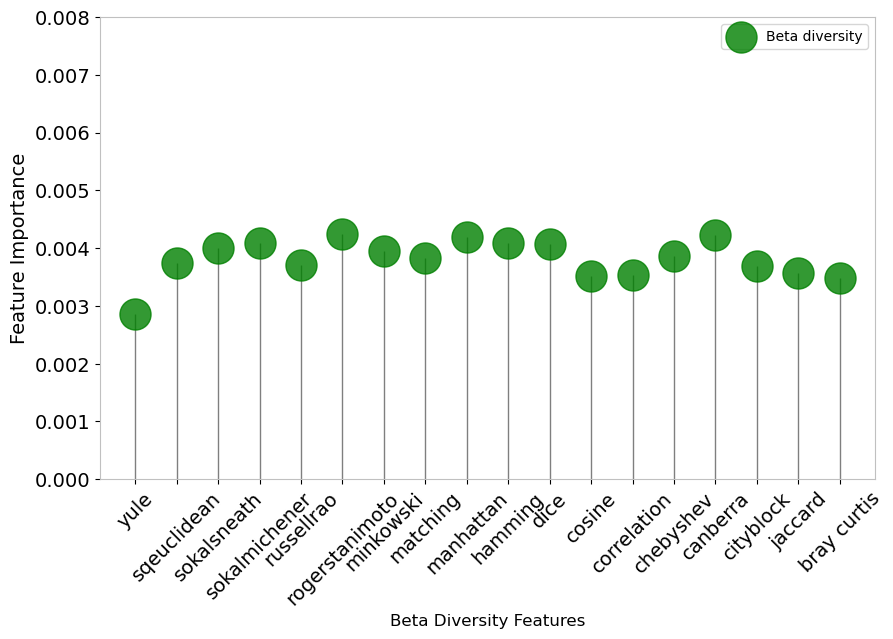

In [ ]:

plt.figure(figsize=(10, 6))
plt.rcParams["svg.fonttype"] = "none"  
# 画柱状图（细线）
plt.bar(beta_feature.index,beta_feature['Importance']
        , width=0.00001, alpha=0.5,color='royalblue', edgecolor='black', bottom=0)
plt.scatter(beta_feature.index, beta_feature['Importance'], color='green', s=500, zorder=3,alpha=0.8,label="Beta diversity")
# 美化图表
ax=plt.gca()
for spine in ax.spines.values():
    spine.set_color("silver")
plt.xlabel('Beta Diversity Features', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Feature Importance', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0,0.008])
plt.legend()
# plt.title('Beta Diversity Feature Importance', fontsize=16, fontweight='bold')
plt.savefig("beta_diversity.svg",format="svg", bbox_inches="tight")

# 显示
plt.show()

In [ ]:
otu_alpha_fea_indices=donor_feature.index.str.replace("donor ","")

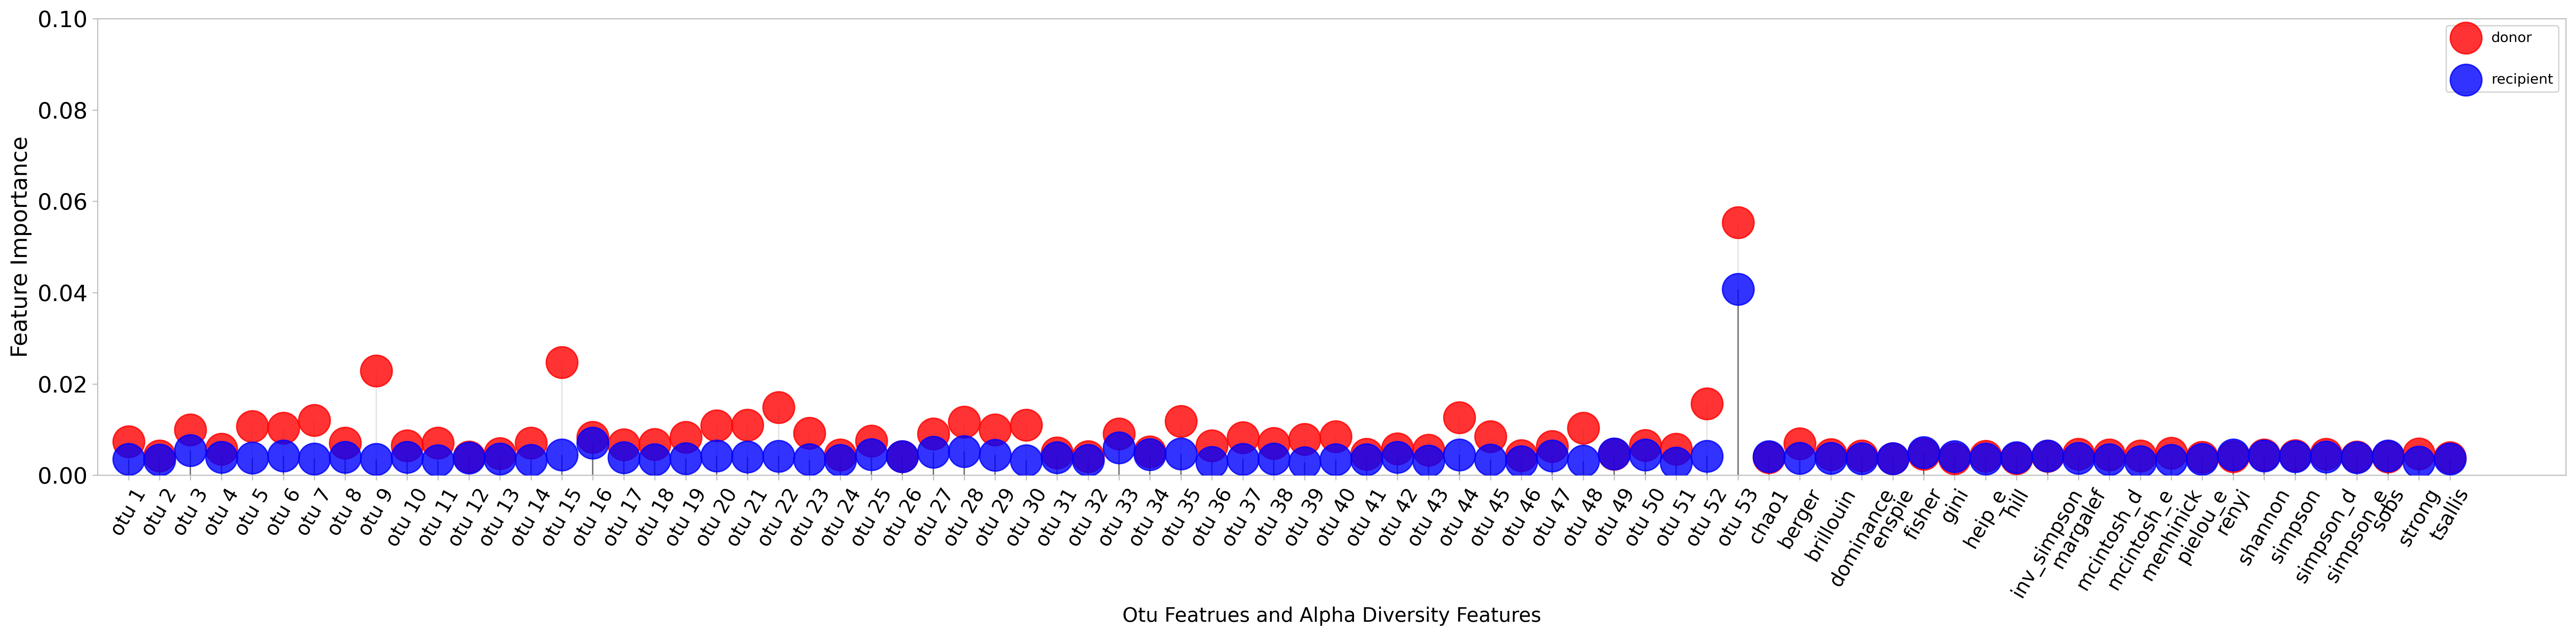

In [ ]:
plt.figure(figsize=(25, 6),dpi=300)
plt.rcParams["svg.fonttype"] = "none"  
# 画柱状图（细线）
plt.bar(otu_alpha_fea_indices,donor_feature['Importance']
        , width=0.00001, alpha=0.1,color='royalblue', edgecolor='black', bottom=0)
plt.scatter(otu_alpha_fea_indices, donor_feature['Importance'], color='red', s=500, zorder=3,label="donor",alpha=0.8)
plt.bar(otu_alpha_fea_indices,recipient_feature['Importance']
        , width=0.0001, alpha=0.5,color='royalblue', edgecolor='black', bottom=0)
plt.scatter(otu_alpha_fea_indices, recipient_feature['Importance'], color='blue', s=500, zorder=3,label='recipient',alpha=0.8)
# 美化图表
ax=plt.gca()
for spine in ax.spines.values():
    spine.set_color("silver")
ax.tick_params(color='silver')
plt.xlabel('Otu Featrues and Alpha Diversity Features', fontsize=14)
plt.xticks(rotation=60)
plt.xlim(left=-1.0)
plt.ylim([0,0.1])
plt.tight_layout()
plt.ylabel('Feature Importance', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(labelspacing=2)
# plt.title('Beta Diversity Feature Importance', fontsize=16, fontweight='bold')
plt.savefig("alpha_diversity.svg",format="svg", bbox_inches="tight")

# 显示
plt.show()

#### data without alpha diversity and beta diversity

In [ ]:
X_train_reci_don_only_otu=X_train_reci_don.loc[:,X_train_reci_don.columns.str.contains("otu",case=False,regex=True)]
X_test_reci_don_only_otu=X_test_reci_don.loc[:,X_test_reci_don.columns.str.contains("otu",case=False,regex=True)]
X_train_reci_don_alpha=X_train_reci_don.iloc[:,:152]
X_test_reci_don_alpha=X_test_reci_don.iloc[:,:152]

X_train_reci_don_otu_f=torch.tensor(X_train_reci_don_only_otu.values,dtype=torch.float32)
X_test_reci_don_otu_f=torch.tensor(X_test_reci_don_only_otu.values,dtype=torch.float32)
X_train_reci_don_alpha_f=torch.tensor(X_train_reci_don_alpha.values,dtype=torch.float32)
X_test_reci_don_alpha_f=torch.tensor(X_test_reci_don_alpha.values,dtype=torch.float32)


In [ ]:
batch_size=64
train_dataset_moe_otu = TensorDataset(X_train_reci_don_otu_f, y_train_reci_don_torch)
test_dataset_moe_otu = TensorDataset(X_test_reci_don_otu_f, y_test_reci_don_torch)
train_loader_moe_otu = DataLoader(train_dataset_moe_otu, batch_size=batch_size, shuffle=True)
test_loader_moe_otu = DataLoader(test_dataset_moe_otu, batch_size=batch_size)

train_dataset_moe_alpha = TensorDataset(X_train_reci_don_alpha_f, y_train_reci_don_torch)
test_dataset_moe_alpha = TensorDataset(X_test_reci_don_alpha_f, y_test_reci_don_torch)
train_loader_moe_alpha = DataLoader(train_dataset_moe_alpha, batch_size=batch_size, shuffle=True)
test_loader_moe_alpha = DataLoader(test_dataset_moe_alpha, batch_size=batch_size)

In [ ]:
result_data=[]
confidence_interv,total_time,_=confidence_interval(
    model_class=SparseMoE,
    model_args={"n_embed": X_train_reci_don_only_otu.shape[1], 
                "num_experts":4,
               'expert_hidden_sizes':[16,8],
                'router_hidden_sizes':[32] },  # 你的模型参数
    train_loader=train_loader_moe_otu,
    test_loader=test_loader_moe_otu,
    optimizer_class=torch.optim.Adam,
    optimizer_args={"lr": 0.0001},  # 你的优化器参数
    train_times=5
    )
result_data.append({
    "data":"without beta and alpha diversity",
    "confidence_interval":confidence_interv,
    "mean_accuracy":np.mean(confidence_interv),
    "total_time":total_time
})


confidence_interv,total_time,_=confidence_interval(
    model_class=SparseMoE,
    model_args={"n_embed": X_train_reci_don_alpha.shape[1], 
                "num_experts":4,
               'expert_hidden_sizes':[16,8],
                'router_hidden_sizes':[32] },  # 你的模型参数
    train_loader=train_loader_moe_alpha,
    test_loader=test_loader_moe_alpha,
    optimizer_class=torch.optim.Adam,
    optimizer_args={"lr": 0.0001},  # 你的优化器参数
    train_times=5
    )
result_data.append({
    "data":"without beta diversity",
    "confidence_interval":confidence_interv,
    "mean_accuracy":np.mean(confidence_interv),
    "total_time":total_time
})
result_data.append({
    "data":"whole",
    "confidence_interval":(0.9443833522623449, 0.9498942547369457),
    "mean_accuracy":0.947139,
    "total_time":617.016245

})


Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8423
标准差: 0.0134
95% 置信区间: (0.8256, 0.8589)
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
Early stopping triggered.
平均准确率: 0.8451
标准差: 0.0116
95% 置信区间: (0.8308, 0.8595)


In [ ]:
pd_data=pd.DataFrame(result_data)
pd_data['error']=(pd_data['confidence_interval'].apply(lambda x:x[1]-x[0]))/2
pd_data.head()

data                       confidence_interval  \
0  without beta and alpha diversity  (0.8256097457662209, 0.8589043608168511)   
1            without beta diversity  (0.8307761872404559, 0.8595059444209862)   
2                             whole  (0.9443833522623449, 0.9498942547369457)   

   mean_accuracy  total_time     error  
0       0.842257  477.802845  0.016647  
1       0.845141  428.871142  0.014365  
2       0.947139  617.016245  0.002755

#### Random Search

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
import itertools
# 自定义网格搜索函数
def custom_grid_search(estimator, param_grid, train, groups, scoring, cv_splits=5):
    """
    自定义网格搜索函数，支持基于 groups 的交叉验证。
    
    Parameters:
    - estimator: 模型 (如 GradientBoostingClassifier())
    - param_grid: 参数字典，格式为 {param_name: [values]} (如 {'n_estimators': [50, 100, 200]})
    - X: 特征矩阵
    - y: 标签向量
    - scoring: 评估指标函数，格式为 `scoring(y_true, y_pred)` (如 accuracy_score)
    - cv_splits: 交叉验证折数，默认 5
    
    Returns:
    - best_params: 最优参数
    - best_score: 最优得分
    """

    donor_name=train['donor'].drop_duplicates().reset_index()  # delete repeating data
    donor_name=donor_name.drop(columns="index")

    recipient_name=train['recipient'].drop_duplicates().reset_index()
    recipient_name=recipient_name.drop(columns="index")
    if(groups=="donor"):
        index=donor_name
        size=len(recipient_name)
    elif groups=="recipient":
        index=recipient_name
    
    
    param_names = list(param_grid.keys())
    param_combinations = [dict(zip(param_names, values)) for values in 
                          itertools.product(*param_grid.values())]
    
    best_score = -np.inf
    best_params = None

    # 遍历每组参数组合
    for params in param_combinations:
        print(f"Testing parameters: {params}")
        fold_scores = []
        
        # 设置模型参数
        model = estimator.set_params(**params)
        
        # 分组交叉验证
        for fold in range(cv_splits):
            train_idx, valid_idx = train_test_split(index, test_size=0.2) 
            X_init_tr=train[train[groups].isin(train_idx['recipient'])]
            
            X_init_te=train[train[groups].isin(valid_idx['recipient'])]
            X_train=X_init_tr.loc[:,"donor otu 1":"bray curtis"]
            X_test=X_init_te.loc[:,"donor otu 1":"bray curtis"]
            y_train=X_init_tr['label']
            y_test=X_init_te['label']
            
            # 训练模型
            model.fit(X_train, y_train)
            
            # 验证模型
            y_pred = model.predict(X_test)
            fold_score = scoring(y_test, y_pred)
            fold_scores.append(fold_score)
        
        # 计算当前参数组合的平均得分
        avg_score = np.mean(fold_scores)
        print(f"Average score for {params}: {avg_score}")
        
        # 更新最优参数
        if avg_score > best_score:
            best_score = avg_score
            best_params = params

    return best_params, best_score


#### Ml part

In [ ]:
# from scipy.stats import uniform
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate':  np.linspace(0.01, 0.1, 10),
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'subsample': np.linspace(0.5, 1.0, 6)
# }

# gb = GradientBoostingClassifier()
# best_paremeters,best_score=custom_grid_search(gb,param_dist,train_reci,groups="recipient",scoring=accuracy_score,cv_splits=5)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


def crossVal_score(train, scoring=accuracy_score, cv_splits=5, fold=42):
    """
    Parameters:
    - train: 数据集 (pandas DataFrame)
    - groups: 分组方式 (此函数未使用，假设用于其他目的)
    - scoring: 评估指标函数，格式为 `scoring(y_true, y_pred)`
    - cv_splits: 交叉验证折数，默认为 5
    - fold: 随机种子
    - num_epochs: 深度学习模型的训练轮数，默认为 10
    - batch_size: 深度学习模型的批量大小，默认为 32
    
    Returns:
    - cvResDf: 包含所有模型交叉验证结果的 DataFrame
    """
    unique_donors = train['donor'].unique()
    unique_recipients = train['recipient'].unique()
    
    cv_means = []
    cv_std = []
    
    # 传统机器学习模型
    classifiers = [
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier(),
        KNeighborsClassifier(),
        LinearDiscriminantAnalysis()
    ]
    
    # 深度学习模型的输入和输出维度
    input_dim = train.loc[:, "donor otu 1":"bray curtis"].shape[1]
    output_dim = len(train['label'].unique())  # 假设是分类问题
    
    # 遍历传统机器学习模型
    for classifier in classifiers:
        cv_results = []
        for fold_idx in range(cv_splits):
            train_donors, test_donors = train_test_split(unique_donors, test_size=0.2, random_state=fold + fold_idx)
            train_recipients, test_recipients = train_test_split(unique_recipients, test_size=0.2, random_state=fold + fold_idx)
            
            train_set = train[(train['donor'].isin(train_donors)) & (train['recipient'].isin(train_recipients))]
            test_set = train[(train['donor'].isin(test_donors)) & (train['recipient'].isin(test_recipients))]
            
            X_train = train_set.loc[:, "donor otu 1":"bray curtis"]
            y_train = train_set['label']
            X_test = test_set.loc[:, "donor otu 1":"bray curtis"]
            y_test = test_set['label']
            
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            cv_result = scoring(y_test, y_pred)
            cv_results.append(cv_result)
        
        cv_means.append(np.mean(cv_results))
        cv_std.append(np.std(cv_results))
    
    # 深度学习模型的交叉验证
    dl_cv_results = []
    for fold_idx in range(cv_splits):
        train_donors, test_donors = train_test_split(unique_donors, test_size=0.2, random_state=fold + fold_idx)
        train_recipients, test_recipients = train_test_split(unique_recipients, test_size=0.2, random_state=fold + fold_idx)
        
        train_set = train[(train['donor'].isin(train_donors)) & (train['recipient'].isin(train_recipients))]
        test_set = train[(train['donor'].isin(test_donors)) & (train['recipient'].isin(test_recipients))]
        
        X_train = train_set.loc[:, "donor otu 1":"bray curtis"].values
        y_train = train_set['label'].values
        X_test = test_set.loc[:, "donor otu 1":"bray curtis"].values
        y_test = test_set['label'].values
        
        # 转换为 PyTorch 张量
        X_train_tensor = torch.from_numpy(X_train).float()
        y_train_tensor = torch.from_numpy(y_train).long()
        X_test_tensor = torch.from_numpy(X_test).float()
        y_test_tensor = torch.from_numpy(y_test).long()
        
        # 创建 DataLoader
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,generator=g)
        test_dataset=TensorDataset(X_test_tensor, y_test_tensor)
        test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
        
        confidence_interv,total_time,accuracy=confidence_interval(
        model_class=SparseMoE,
        model_args={"n_embed": X_train.shape[1], 
                    "num_experts":4,
                'expert_hidden_sizes':[16,8],
                    'router_hidden_sizes':[32]},  # 你的模型参数
        train_loader=train_loader,
        test_loader=test_loader,
        optimizer_class=torch.optim.Adam,
        optimizer_args={"lr": 0.0001},  # 你的优化器参数
        train_times=1
        )
        dl_cv_results.append(accuracy)

    
    # 添加深度学习模型的结果
    cv_means.append(np.mean(dl_cv_results))
    cv_std.append(np.std(dl_cv_results))
    
    # 创建结果 DataFrame
    algorithms = ['SVC', 'DecisionTreeCla', 'RandomForestCla', 'ExtraTreesCla',
                  'GradientBoostingCla', 'KNN', 'LinearDiscrimiAna', 'EnteroMatch']
    cvResDf = pd.DataFrame({
        'cv_mean': cv_means,
        'cv_std': cv_std,
        'algorithm': algorithms
    })
    
    return cvResDf

In [ ]:
data=pd.concat([train_reci,test_reci])
data.drop(columns=['key'],inplace=True)
data.head()

donor otu 1  donor otu 2  donor otu 3  donor otu 4  donor otu 5  \
0     0.000005          0.0     0.014019          0.0     0.391628   
1     0.000005          0.0     0.014019          0.0     0.391628   
2     0.000005          0.0     0.014019          0.0     0.391628   
3     0.000005          0.0     0.014019          0.0     0.391628   
4     0.000005          0.0     0.014019          0.0     0.391628   

   donor otu 6  donor otu 7  donor otu 8  donor otu 9  donor otu 10  ...  \
0          0.0          0.0          0.0          0.0      0.000023  ...   
1          0.0          0.0          0.0          0.0      0.000023  ...   
2          0.0          0.0          0.0          0.0      0.000023  ...   
3          0.0          0.0          0.0          0.0      0.000023  ...   
4          0.0          0.0          0.0          0.0      0.000023  ...   

   correlation  chebyshev  canberra  cityblock   jaccard  bray curtis  \
0    -0.411095  -0.636726 -0.204666  -0.820720 -0.808620    -0.820720   
1     0.118234   1.043110 -0.899182   0.305766  1.397302     0.305766   
2     0.959458  -0.746957 -0.534840   0.795580 -0.764699     0.795580   
3    -1.352345  -0.365595 -1.341074  -0.296714  0.622748    -0.296714   
4     1.235987   0.071719 -0.309473   1.323611  0.926252     1.323611   

   euclidean   donor  recipient  label  
0  -0.847325  793040     189301    1.0  
1   0.928761  793040      36408    1.0  
2  -0.520274  793040     819786    1.0  
3   0.065027  793040     952508    1.0  
4   0.492634  793040     436336    1.0  

[5 rows x 174 columns]

In [ ]:
cvResDf=crossVal_score(data,scoring=accuracy_score,cv_splits=5)

Early stopping triggered.
平均准确率: 0.7995
标准差: nan
95% 置信区间: (nan, nan)


/miniconda/envs/pytorch/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/miniconda/envs/pytorch/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Early stopping triggered.
平均准确率: 0.7660
标准差: nan
95% 置信区间: (nan, nan)
Early stopping triggered.
平均准确率: 0.7439
标准差: nan
95% 置信区间: (nan, nan)
Early stopping triggered.
平均准确率: 0.7734
标准差: nan
95% 置信区间: (nan, nan)
Early stopping triggered.
平均准确率: 0.8528
标准差: nan
95% 置信区间: (nan, nan)


In [ ]:
cvResDf.head()

cv_mean    cv_std            algorithm
0  0.740607  0.048819                  SVC
1  0.868084  0.019072      DecisionTreeCla
2  0.864568  0.026214      RandomForestCla
3  0.789532  0.025472        ExtraTreesCla
4  0.899444  0.043578  GradientBoostingCla

In [ ]:
cvResDf=crossVal_score(train_reci,groups='recipient',scoring=accuracy_score,cv_splits=5)
new_row = {"cv_mean":0.947139, "cv_std":0.001861, "algorithm": "SparseMoE"}  # 你的新数据
cvResDf.loc[len(cvResDf)]=new_row

NameError: name 'train_reci' is not defined

In [ ]:
sns.barplot(data=cvResDf,x='cv_mean',y='algorithm',**{'xerr':'cv_std'})

cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='cv_mean',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':'cv_std'},
               palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

In [ ]:
cvResDf_don=crossVal_score(train_donor,groups='donor',scoring=accuracy_score,cv_splits=5)
new_row = {"cv_mean":0.947139, "cv_std":0.001861, "algorithm": "SparseMoE"}  # 你的新数据
cvResDf_don.loc[len(cvResDf_don)]=new_row

In [ ]:
y_train_reci_don.value_counts()

In [ ]:
gb_fin_reci_don=GradientBoostingClassifier(learning_rate=0.020000000000000004,n_estimators=100,max_depth=7,min_samples_split=5,
                                           min_samples_leaf=1,subsample=0.8)

In [ ]:
gb_fin_reci_don.fit(X_train_reci_don,y_train_reci_don)
y_pred_reci_don=gb_fin_reci_don.predict(X_test_reci_don)

In [ ]:
print("Confusion matrix: \n",confusion_matrix(y_pred_reci_don,y_test_reci_don))
print("Classification report:\n",classification_report(y_pred_reci_don,y_test_reci_don))

In [ ]:
cm_reci_don= confusion_matrix(y_test_reci_don, y_pred_reci_don)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reci_don, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Cured', 'Cured'], yticklabels=['Not Cured', 'Cured'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
gb_fin_feature_importances = pd.DataFrame({"features":X_train_reci.columns,"importances":gb_fin_reci_don.feature_importances_})
gb_fin_feature_importances=gb_fin_feature_importances.sort_values(by="importances",ascending=False)
gb_fin_feature_importances.head(10)

In [ ]:
from sklearn.metrics import auc, precision_recall_curve


y_probs_reci_don = gb_fin_reci_don.predict_proba(X_test_reci_don)[:, 1]
fpr, tpr, thresholds_roc = roc_curve(y_test_reci_don, y_probs_reci_don)
roc_auc = roc_auc_score(y_test_reci_don, y_probs_reci_don)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve (AUPRC)
precision, recall, thresholds_pr = precision_recall_curve(y_test_reci_don, y_probs_reci_don)
auprc = auc(recall, precision)

# Plot AUPRC
plt.figure()
plt.plot(recall, precision, label=f'PR curve (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': uniform(0.01, 0.1),
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'subsample': uniform(0.5, 0.5)
# }

# gb = GradientBoostingClassifier()
# random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=50, cv=5)
# random_search.fit(X_train_reci, y_train_reci)

# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

In [ ]:
gb_fin_reci=GradientBoostingClassifier(learning_rate=0.020000000000000004,n_estimators=100,max_depth=7,min_samples_split=5,
                                        min_samples_leaf=1,subsample=0.8)


In [ ]:
gb_fin_reci.fit(X_train_reci,y_train_reci)
y_pred_reci=gb_fin_reci.predict(X_test_reci)
print("Confusion matrix: \n",confusion_matrix(y_pred_reci,y_test_reci))
print("Classification report:\n",classification_report(y_pred_reci,y_test_reci))

In [ ]:
cm_reci= confusion_matrix(y_test_reci, y_pred_reci)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_reci, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Cured', 'Cured'], yticklabels=['Not Cured', 'Cured'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
gb_fin_feature_importances = pd.DataFrame({"features":X_train_reci.columns,"importances":gb_fin_reci.feature_importances_})
gb_fin_feature_importances=gb_fin_feature_importances.sort_values(by="importances",ascending=False)
gb_fin_feature_importances.head()

In [ ]:
from sklearn.metrics import auc, precision_recall_curve


y_probs_reci = gb_fin_reci.predict_proba(X_test_reci)[:, 1]
fpr, tpr, thresholds_roc = roc_curve(y_test_reci, y_probs_reci)
roc_auc = roc_auc_score(y_test_reci, y_probs_reci)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve (AUPRC)
precision, recall, thresholds_pr = precision_recall_curve(y_test_reci, y_probs_reci)
auprc = auc(recall, precision)

# Plot AUPRC
plt.figure()
plt.plot(recall, precision, label=f'PR curve (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:

# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': uniform(0.01, 0.1),
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'subsample': uniform(0.5, 0.5)
# }

# gb = GradientBoostingClassifier()
# random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=50, cv=5)
# random_search.fit(X_train, y_train)

# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

In [ ]:
gb_fin=GradientBoostingClassifier(learning_rate=0.020000000000000004,n_estimators=100,max_depth=7,min_samples_split=5,
                                    min_samples_leaf=1,subsample=0.8)
gb_fin.fit(X_train_don,y_train_don)
y_pred_don=gb_fin.predict(X_test_don)
print(" confusion matrix: \n",confusion_matrix(y_pred_don,y_test_don))
print(" classification report:\n",classification_report(y_pred_don,y_test_don))

In [ ]:
cm = confusion_matrix(y_test_don, y_pred_don)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Cured', 'Cured'], yticklabels=['Not Cured', 'Cured'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
gb_fin_feature_importances = pd.DataFrame({"features":X_train_don.columns,"importances":gb_fin.feature_importances_})
gb_fin_feature_importances=gb_fin_feature_importances.sort_values(by="importances",ascending=False)
gb_fin_feature_importances.head()

In [ ]:
from sklearn.metrics import auc, precision_recall_curve


y_probs = gb_fin.predict_proba(X_test_don)[:, 1]
fpr, tpr, thresholds_roc = roc_curve(y_test_don, y_probs)
roc_auc = roc_auc_score(y_test_don, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve (AUPRC)
precision, recall, thresholds_pr = precision_recall_curve(y_test_don, y_probs)
auprc = auc(recall, precision)

# Plot AUPRC
plt.figure()
plt.plot(recall, precision, label=f'PR curve (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()